In [85]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

%matplotlib inline
sns.set(color_codes=True)

# Data Description

In [86]:
Products_data=pd.read_csv('ProductsData.csv')
Products_data.index=range(1,len(Products_data)+1)
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,"""chambre a coucher ""","""40008817""","""Meubles et décoration """,1 800,"""private""","""Grand Casablanca""","""Casablanca"""
2,"""Comte free fire""","""40008816""","""Jeux vidéo et consoles """,,"""private""","""Grand Casablanca""","""Casablanca"""
3,"""Iphone 6 plus""","""40008815""","""Téléphones """,,"""private""","""Grand Casablanca""","""Casablanca"""
4,"""Renault ""","""40008814""","""Voitures """,,"""private""","""Chaouia-Ouardigha""","""Settat"""
5,"""PS3 SLIM 360 GB ""","""40008812""","""Jeux vidéo et consoles """,1 400,"""private""","""Rabat-Salé-Zemmour-Zaër""","""Sala Al-Jadida"""


In [87]:
Products_data.shape

(4350, 7)

In [88]:
Products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 1 to 4350
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_name              4350 non-null   object
 1   Product_id                4350 non-null   object
 2   Product_Category          4350 non-null   object
 3   price                     3580 non-null   object
 4   Professional_Publication  4350 non-null   object
 5   Region_address            4350 non-null   object
 6   Local_address             4350 non-null   object
dtypes: object(7)
memory usage: 238.0+ KB


In [89]:
Products_data.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,4350,4350,4350,3580,4350,4350,4350
unique,3407,3739,45,529,2,16,124
top,"""Renault""","""39242063""","""Voitures """,,"""private""","""Grand Casablanca""","""Casablanca"""
freq,18,3,654,451,2688,1355,1272


# Data Cleaning

**Removing all the double quotes from each element in the features**

In [90]:
for i,col in enumerate(Products_data.columns):
    Products_data.iloc[:,i]=Products_data.iloc[:,i].str.replace('"','')
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Replacing all empty string values with NaN**

In [91]:
Products_data=Products_data.replace(r'^\s*$',np.NaN,regex=True)
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Replacing all the unwanted strings with NaN**

In [92]:
Products_data['Product_name'] = Products_data['Product_name'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Removing all the unwanted space in price column**

In [93]:
Products_data['price'] = Products_data['price'].str.replace(' ', '')
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


In [94]:
print(Products_data.isnull().sum())

Product_name                 380
Product_id                     0
Product_Category               0
price                       1221
Professional_Publication       0
Region_address                 0
Local_address                  0
dtype: int64


**The Price column having missing values can be used as test set, which will we evaluated by the model.**
**The rows with product name as missing values need to be removed, as they will not be useful in evaluation, as they are meaningless.**

In [95]:
i=Products_data['Product_name'].isnull()
data=Products_data[i]
data.shape

(380, 7)

In [96]:
Products_data=Products_data.drop(data.index,axis=0)
Products_data.shape

(3970, 7)

### Separating Test Data from the original Product Dataset

In [97]:
test_data=Products_data[Products_data.isnull().any(axis=1)]
test_data.shape

(1076, 7)

In [98]:
test_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
7,becane,40008811,Motos,NaN,private,Fès-Boulemane,Fès
10,Appartement,40008807,Appartements,NaN,private,Grand Casablanca,Casablanca


In [99]:
test_data.index=range(1,len(test_data)+1)
test_data=test_data.drop('price',axis=1)
test_data.head()

,Product_name,Product_id,Product_Category,Professional_Publication,Region_address,Local_address
1,Comte free fire,40008816,Jeux vidéo et consoles,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,private,Chaouia-Ouardigha,Settat
4,becane,40008811,Motos,private,Fès-Boulemane,Fès
5,Appartement,40008807,Appartements,private,Grand Casablanca,Casablanca


In [100]:
data=test_data.drop_duplicates(subset=None,keep='first',inplace=False)
print('Shape of Original dataset:',test_data.shape)
print('Shape of dataset after dropping duplicates:',data.shape)

Shape of Original dataset: (1076, 6)
Shape of dataset after dropping duplicates: (923, 6)


#### Since, Rows in the test dataset after dropping duplicates is less than the original test dataset, so there exists some duplicates in the given dataset, so, we will drop those for further evaluation.

In [101]:
test_data=data
test_data.shape

(923, 6)

### Dropping the rows with missing values in target variable

In [102]:
Products_data.dropna(axis=0, subset=['price'], inplace=True)

In [103]:
Products_data.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,2894,2894,2894,2894,2894,2894,2894
unique,2331,2501,42,507,2,16,98
top,Renault,39242049,Voitures,300,private,Grand Casablanca,Casablanca
freq,16,3,448,98,1827,915,849


In [104]:
print(Products_data.isnull().sum())

Product_name                0
Product_id                  0
Product_Category            0
price                       0
Professional_Publication    0
Region_address              0
Local_address               0
dtype: int64


In [105]:
Products_data.shape

(2894, 7)

In [106]:
Products_data.index=range(1,len(Products_data)+1)

In [107]:
without_duplicate_data=Products_data.drop_duplicates(subset=None,keep='first',inplace=False)

print('Shape of Original dataset:',Products_data.shape)
print('Shape of dataset after dropping duplicates:',without_duplicate_data.shape)

Shape of Original dataset: (2894, 7)
Shape of dataset after dropping duplicates: (2501, 7)


#### Since, Rows in the Product dataset after dropping duplicates is less than the original Product dataset, so there exists some duplicates in the given dataset, so, we will drop those for further evaluation.

In [108]:
Products_data=without_duplicate_data
Products_data.shape

(2501, 7)

In [109]:
Products_data.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,2501,2501,2501,2501,2501,2501,2501
unique,2331,2501,42,507,2,16,98
top,Renault,39236561,Voitures,300,private,Grand Casablanca,Casablanca
freq,13,1,378,91,1558,793,739


# Model

In [130]:
X=Products_data.drop(['price'],axis=1)
Y=Products_data['price']
X_train,X_valid,Y_train,Y_valid=train_test_split(X_copy,Y,test_size=0.2,random_state=0)

**Label Encoding**

In [131]:
cat_col=['Product_name','Product_Category','Professional_Publication','Region_address','Local_address']
num_col=['Product_id']

X_train_copy=X_train.copy()
X_copy=X_train.copy()
ordinal_encoder=OrdinalEncoder()
X_copy[cat_col]=ordinal_encoder.fit_transform(X_train[cat_col])
X_copy[num_col]=X_train[num_col]

**Scaling the features**

In [132]:
X_scale_train=pd.DataFrame(scale(X_train))
X_scale_train.columns=X_train.columns
X_scale_valid=pd.DataFrame(scale(X_valid))
X_scale_valid.columns=X_valid.columns
X_scale_valid.index=range(1,len(X_scale_valid)+1)

### Linear Regression

In [133]:
model_LR=LinearRegression()
model_LR.fit(X_scale_train,Y_train)
Y_pred_LR=model_LR.predict(X_scale_valid)

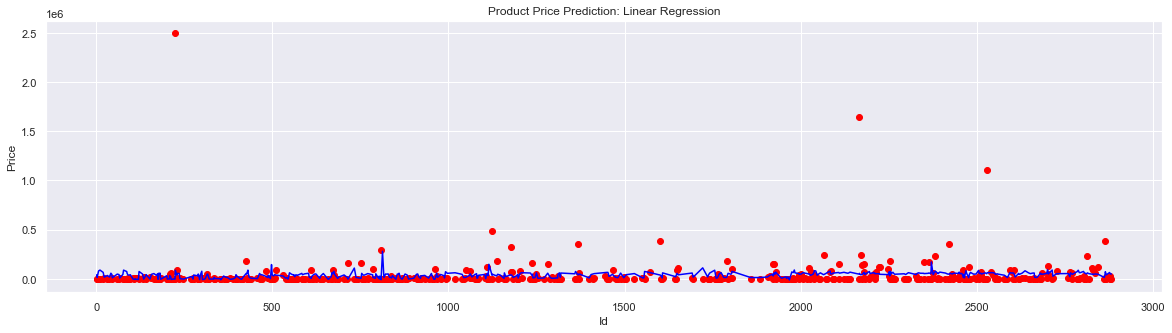

In [134]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index, Y_valid, color = 'red')
sns.lineplot(X_valid.index,Y_pred_LR, color = 'blue')
plt.title('Product Price Prediction: Linear Regression')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [135]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_LR))
print('Linear Regression Coefficients:',model_LR.coef_)
print('R2 Score:',r2_score(Y_valid,Y_pred_LR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_LR))
print('Final Score:',(r2_score(Y_valid,Y_pred_LR)*100)/(mean_squared_error(Y_valid,Y_pred_LR)+mean_absolute_error(Y_valid,Y_pred_LR)))

Mean Absolute Error: 54734.79893339306
Linear Regression Coefficients: [  4067.83581199 -18537.08148358  -4170.92015394 -18529.96350117
   7882.23575552 -12192.58379042]
R2 Score: -0.0026346917168460493
Mean Squared Error: 23234632070.370255
Final Score: -1.1339475926397641e-11


### Logistic Regression

In [136]:
model_LGR=LogisticRegression()
model_LGR.fit(X_scale_train,Y_train)
Y_pred_LGR=model_LGR.predict(X_scale_valid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


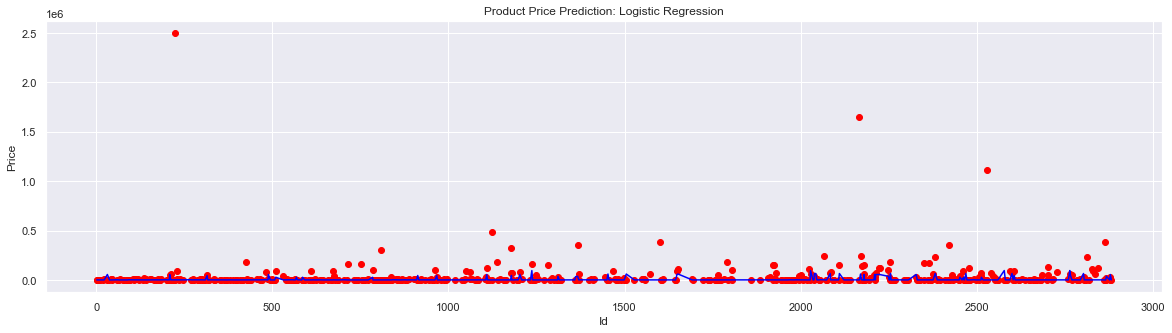

In [137]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index, Y_valid, color = 'red')
sns.lineplot(X_valid.index,Y_pred_LGR, color = 'blue')
plt.title('Product Price Prediction: Logistic Regression')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [138]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_LGR))
print('Linear Regression Coefficients:\n',model_LGR.coef_)
print('R2 Score:',r2_score(Y_valid,Y_pred_LGR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_LGR))
print('Final Score:',(r2_score(Y_valid,Y_pred_LGR)*100)/(mean_squared_error(Y_valid,Y_pred_LGR)+mean_absolute_error(Y_valid,Y_pred_LGR)))

Mean Absolute Error: 32590.526946107784
Linear Regression Coefficients:
 [[ 0.57343944 -0.26873076 -0.26297598 -0.93005312 -0.39769021  0.42460198]
 [ 0.68845136 -0.13709712 -1.08952284 -0.40640643  0.05783285  0.2097677 ]
 [ 0.84311737 -0.47140541  0.56621348  0.77300558 -0.32787778 -0.42618356]
 ...
 [ 0.36411916 -0.12384408 -0.3104536  -0.4349209  -0.32071951 -0.44239678]
 [ 0.68161707 -0.14391273 -0.31431031 -0.36055912  0.71162719 -0.81754565]
 [ 0.95090157  0.18423478 -0.3064027  -0.40516364  0.69908706  0.64680695]]
R2 Score: -0.03122870736746952
Mean Squared Error: 23897257689.197605
Final Score: -1.3067886359469486e-10


### Kernel Ridge Regression

In [139]:
model_KRR=KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
model_KRR.fit(X_scale_train,Y_train)
Y_pred_KRR=model_KRR.predict(X_scale_valid)

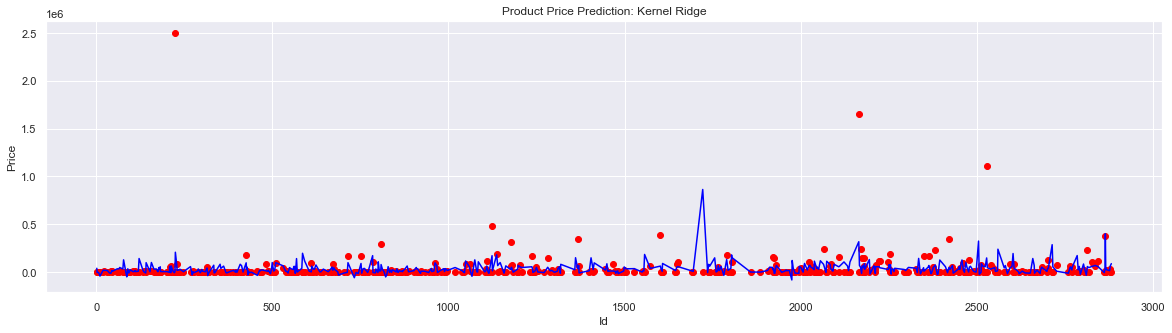

In [140]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index, Y_valid, color='red')
sns.lineplot(X_valid.index,Y_pred_KRR, color='blue')
plt.title('Product Price Prediction: Kernel Ridge')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [141]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_KRR))
print('R2 Score:',r2_score(Y_valid,Y_pred_KRR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_KRR))
print('Final Score:',(r2_score(Y_valid,Y_pred_KRR)*100)/(mean_squared_error(Y_valid,Y_pred_KRR)+mean_absolute_error(Y_valid,Y_pred_KRR)))

Mean Absolute Error: 49940.906857801936
R2 Score: 0.07499918734424516
Mean Squared Error: 21435577408.605682
Final Score: 3.4988100008162664e-10


### XGBoost Regressor

In [142]:
model_XGB = XGBRegressor(n_estimators=500, learning_rate=0.05)
model_XGB.fit(X_scale_train, Y_train, early_stopping_rounds=5, eval_set=[(X_scale_valid, Y_valid)], verbose=False)
Y_pred_XGB=model_XGB.predict(X_scale_valid)

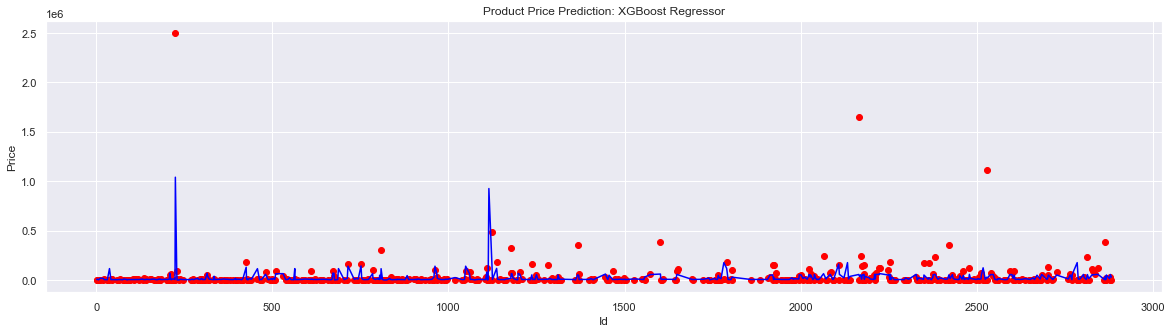

In [143]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_XGB,color='blue')
plt.title('Product Price Prediction: XGBoost Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [144]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_XGB))
print('R2 Score:',r2_score(Y_valid,Y_pred_XGB))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_XGB))
print('Final Score:',(r2_score(Y_valid,Y_pred_XGB)*100)/(mean_squared_error(Y_valid,Y_pred_XGB)+mean_absolute_error(Y_valid,Y_pred_XGB)))

Mean Absolute Error: 31042.433791535583
R2 Score: 0.3137444676862252
Mean Squared Error: 15902995309.551525
Final Score: 1.972860138328688e-09


### Random Forest Regressor

In [145]:
model_RFR = RandomForestRegressor(n_estimators=100, random_state=0)
model_RFR.fit(X_scale_train,Y_train)
Y_pred_RFR=model_RFR.predict(X_scale_valid)

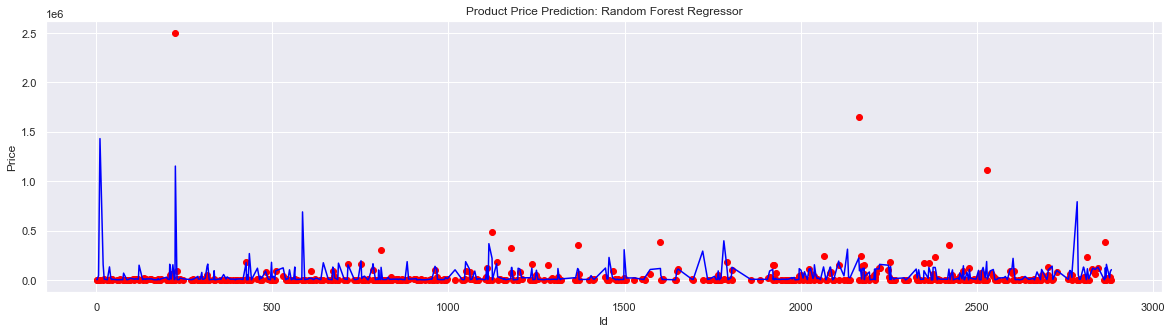

In [146]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_RFR,color='blue')
plt.title('Product Price Prediction: Random Forest Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [147]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_RFR))
print('R2 Score:',r2_score(Y_valid,Y_pred_RFR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_RFR))
print('Final Score:',(r2_score(Y_valid,Y_pred_RFR)*100)/(mean_squared_error(Y_valid,Y_pred_RFR)+mean_absolute_error(Y_valid,Y_pred_RFR)))

Mean Absolute Error: 45087.353552894216
R2 Score: 0.14197453549962025
Mean Squared Error: 19883519031.780075
Final Score: 7.14029610833203e-10


### Support Vector Regressor

In [148]:
model_SVR=SVR(kernel='rbf')
model_SVR.fit(X_scale_train,Y_train)
Y_pred_SVR=model_SVR.predict(X_scale_valid)

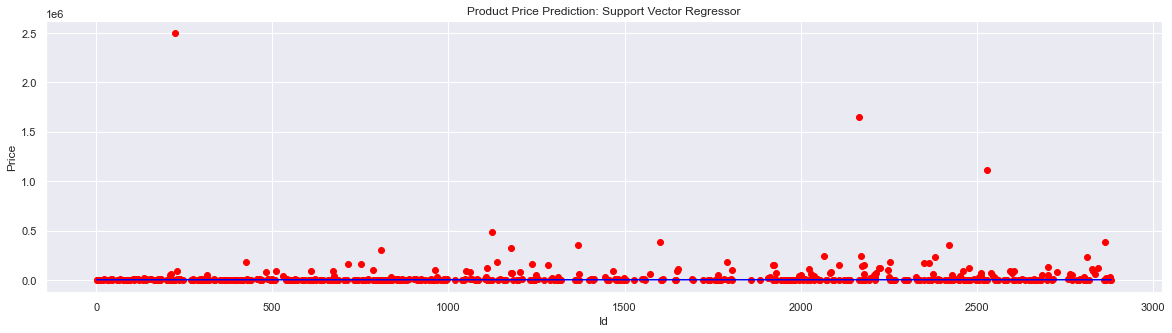

In [149]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_SVR,color='blue')
plt.title('Product Price Prediction: Support Vector Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [150]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_SVR))
print('R2 Score:',r2_score(Y_valid,Y_pred_SVR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_SVR))
print('Final Score:',(r2_score(Y_valid,Y_pred_SVR)*100)/(mean_squared_error(Y_valid,Y_pred_SVR)+mean_absolute_error(Y_valid,Y_pred_SVR)))

Mean Absolute Error: 34037.63516031823
R2 Score: -0.04639285849695862
Mean Squared Error: 24248665310.601425
Final Score: -1.9132101821507556e-10


### Isolation Forest Regressor 

In [151]:
model_IFR = IsolationForest()
model_IFR.fit(X_scale_train)
Y_pred_IFR=-model_IFR.decision_function(X_scale_valid)

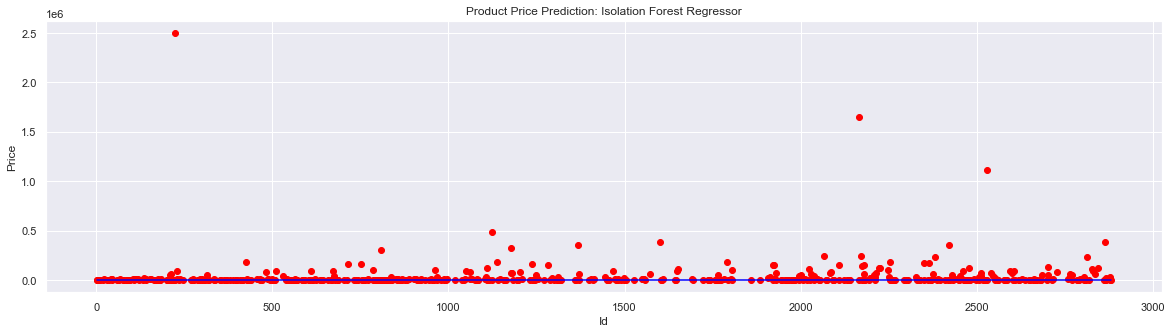

In [152]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_IFR,color='blue')
plt.title('Product Price Prediction: Isolation Forest Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [153]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_IFR))
print('R2 Score:',r2_score(Y_valid,Y_pred_IFR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_IFR))
print('Final Score:',(r2_score(Y_valid,Y_pred_IFR)*100)/(mean_squared_error(Y_valid,Y_pred_IFR)+mean_absolute_error(Y_valid,Y_pred_IFR)))

Mean Absolute Error: 34873.577619854346
R2 Score: -0.0524807016999953
Mean Squared Error: 24389742412.853348
Final Score: -2.15174993537938e-10


### Light GBM 

In [154]:
train_X = lgb.Dataset(X_scale_train,label=Y_train)
params = {'learning_rate': 0.05,'application': 'regression','max_depth': 3,'num_leaves': 50,'verbosity': -1,'metric': 'RMSE'}
gbm = lgb.train(params, train_set=train_X, num_boost_round=3200, verbose_eval=100)
Y_pred_LGBM = gbm.predict(X_scale_valid, num_iteration=gbm.best_iteration)

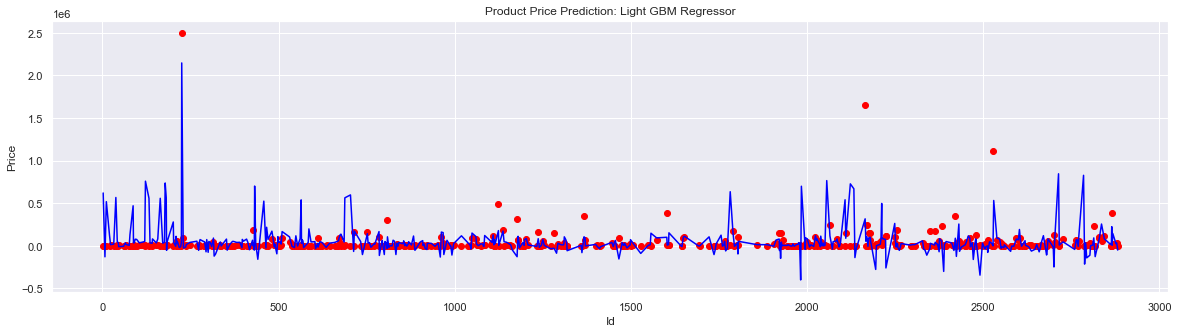

In [155]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_LGBM,color='blue')
plt.title('Product Price Prediction: Light GBM Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [156]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_LGBM))
print('R2 Score:',r2_score(Y_valid,Y_pred_LGBM))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_LGBM))
print('Final Score:',(r2_score(Y_valid,Y_pred_LGBM)*100)/(mean_squared_error(Y_valid,Y_pred_LGBM)+mean_absolute_error(Y_valid,Y_pred_LGBM)))

Mean Absolute Error: 84983.95482918626
R2 Score: -0.38778501400658194
Mean Squared Error: 32159942658.679493
Final Score: -1.20579813648076e-09


### CAT Boost Regressor

In [157]:
train_dataset = cb.Pool(X_scale_train,Y_train) 
test_dataset = cb.Pool(X_scale_valid,Y_valid)
model_CAT = cb.CatBoostRegressor(loss_function='RMSE')
grid = {'iterations': [100, 150, 200],'learning_rate': [0.03,0.05,0.1],'depth': [2, 4, 6, 8],'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model_CAT.grid_search(grid,train_dataset)
Y_pred_CAT=model_CAT.predict(X_scale_valid)

0:	learn: 249198.9339714	test: 115631.3162710	best: 115631.3162710 (0)	total: 694us	remaining: 68.8ms
1:	learn: 248318.1438655	test: 114945.0169503	best: 114945.0169503 (1)	total: 1.25ms	remaining: 61.2ms
2:	learn: 248056.8517960	test: 114586.6581340	best: 114586.6581340 (2)	total: 1.73ms	remaining: 56ms
3:	learn: 247580.3058041	test: 114257.6045610	best: 114257.6045610 (3)	total: 2.22ms	remaining: 53.3ms
4:	learn: 247334.8920490	test: 113982.9335774	best: 113982.9335774 (4)	total: 2.73ms	remaining: 51.8ms
5:	learn: 246891.3298255	test: 113695.0320284	best: 113695.0320284 (5)	total: 3.4ms	remaining: 53.3ms
6:	learn: 246714.2308562	test: 113377.1372372	best: 113377.1372372 (6)	total: 4.42ms	remaining: 58.7ms
7:	learn: 246193.1577236	test: 113130.3262770	best: 113130.3262770 (7)	total: 4.95ms	remaining: 56.9ms
8:	learn: 246012.6577393	test: 112922.7731354	best: 112922.7731354 (8)	total: 5.47ms	remaining: 55.3ms
9:	learn: 245864.3211091	test: 112705.7516117	best: 112705.7516117 (9)	total:

67:	learn: 186475.1568430	test: 126890.3284004	best: 109204.7989690 (19)	total: 48.4ms	remaining: 22.8ms
68:	learn: 186428.4924611	test: 126778.0500395	best: 109204.7989690 (19)	total: 49.1ms	remaining: 22.1ms
69:	learn: 186145.9168674	test: 127004.4955246	best: 109204.7989690 (19)	total: 49.7ms	remaining: 21.3ms
70:	learn: 186088.9416978	test: 126887.1912717	best: 109204.7989690 (19)	total: 50.3ms	remaining: 20.5ms
71:	learn: 186065.3715748	test: 126870.6163439	best: 109204.7989690 (19)	total: 50.9ms	remaining: 19.8ms
72:	learn: 185867.1741838	test: 126880.7817601	best: 109204.7989690 (19)	total: 51.5ms	remaining: 19ms
73:	learn: 185841.2407925	test: 126869.9140625	best: 109204.7989690 (19)	total: 52.1ms	remaining: 18.3ms
74:	learn: 185791.1083069	test: 126772.6894694	best: 109204.7989690 (19)	total: 52.7ms	remaining: 17.6ms
75:	learn: 185724.1790173	test: 126752.5220840	best: 109204.7989690 (19)	total: 53.5ms	remaining: 16.9ms
76:	learn: 182913.1685135	test: 129382.5266027	best: 1092

54:	learn: 220792.4594482	test: 112350.1250067	best: 109816.1988483 (35)	total: 34.6ms	remaining: 28.3ms
55:	learn: 220532.6985322	test: 112519.8560709	best: 109816.1988483 (35)	total: 35.4ms	remaining: 27.8ms
56:	learn: 220290.3095041	test: 112543.0573083	best: 109816.1988483 (35)	total: 36.2ms	remaining: 27.3ms
57:	learn: 217341.1678567	test: 113503.6160291	best: 109816.1988483 (35)	total: 37ms	remaining: 26.8ms
58:	learn: 217313.9644963	test: 113508.5426594	best: 109816.1988483 (35)	total: 37.6ms	remaining: 26.1ms
59:	learn: 217257.6321658	test: 113369.4636794	best: 109816.1988483 (35)	total: 39.1ms	remaining: 26.1ms
60:	learn: 217083.9258051	test: 113376.5648793	best: 109816.1988483 (35)	total: 40.1ms	remaining: 25.7ms
61:	learn: 214269.8515477	test: 114440.4630557	best: 109816.1988483 (35)	total: 40.8ms	remaining: 25ms
62:	learn: 211579.1322145	test: 115593.7082729	best: 109816.1988483 (35)	total: 41.4ms	remaining: 24.3ms
63:	learn: 209007.4133021	test: 116823.7207511	best: 109816

71:	learn: 164063.0425287	test: 137057.8098170	best: 108354.9653477 (18)	total: 45.4ms	remaining: 17.6ms
72:	learn: 163973.8854259	test: 136959.8567761	best: 108354.9653477 (18)	total: 46ms	remaining: 17ms
73:	learn: 163877.2634090	test: 136873.9115597	best: 108354.9653477 (18)	total: 46.6ms	remaining: 16.4ms
74:	learn: 163721.9580742	test: 136886.0552580	best: 108354.9653477 (18)	total: 47.3ms	remaining: 15.8ms
75:	learn: 163521.8834350	test: 136794.7990428	best: 108354.9653477 (18)	total: 48.6ms	remaining: 15.3ms
76:	learn: 163411.7623601	test: 136626.2846741	best: 108354.9653477 (18)	total: 49.5ms	remaining: 14.8ms
77:	learn: 163282.8519693	test: 136628.6372268	best: 108354.9653477 (18)	total: 50.1ms	remaining: 14.1ms
78:	learn: 163170.7897529	test: 136627.8400553	best: 108354.9653477 (18)	total: 50.6ms	remaining: 13.5ms
79:	learn: 161769.9225441	test: 136600.9928888	best: 108354.9653477 (18)	total: 51.2ms	remaining: 12.8ms
80:	learn: 161148.1072740	test: 137439.0880789	best: 108354

45:	learn: 215163.5621178	test: 113498.9758857	best: 109316.3093013 (19)	total: 32.6ms	remaining: 38.3ms
46:	learn: 210796.7290824	test: 115296.1707999	best: 109316.3093013 (19)	total: 33.2ms	remaining: 37.5ms
47:	learn: 210659.0569688	test: 115258.4516276	best: 109316.3093013 (19)	total: 33.8ms	remaining: 36.6ms
48:	learn: 210535.9726685	test: 114962.0679274	best: 109316.3093013 (19)	total: 34.4ms	remaining: 35.8ms
49:	learn: 210392.7194186	test: 115064.1486940	best: 109316.3093013 (19)	total: 35.1ms	remaining: 35.1ms
50:	learn: 210226.8917890	test: 115053.2617894	best: 109316.3093013 (19)	total: 35.9ms	remaining: 34.5ms
51:	learn: 210138.6510820	test: 115051.9350520	best: 109316.3093013 (19)	total: 37.4ms	remaining: 34.5ms
52:	learn: 209981.6149810	test: 114899.3613891	best: 109316.3093013 (19)	total: 38.2ms	remaining: 33.9ms
53:	learn: 205908.8866423	test: 116897.6097780	best: 109316.3093013 (19)	total: 38.9ms	remaining: 33.1ms
54:	learn: 205633.8654101	test: 117222.2564775	best: 10

56:	learn: 223570.0924565	test: 112070.2076156	best: 109698.7498051 (41)	total: 34.9ms	remaining: 26.4ms
57:	learn: 221174.1967159	test: 112800.4437256	best: 109698.7498051 (41)	total: 35.5ms	remaining: 25.7ms
58:	learn: 221144.0052369	test: 112803.2281414	best: 109698.7498051 (41)	total: 36.2ms	remaining: 25.1ms
59:	learn: 221082.4082698	test: 112707.5650689	best: 109698.7498051 (41)	total: 36.8ms	remaining: 24.5ms
60:	learn: 220953.6141103	test: 112713.0977735	best: 109698.7498051 (41)	total: 37.4ms	remaining: 23.9ms
61:	learn: 218643.4598941	test: 113514.6273096	best: 109698.7498051 (41)	total: 38ms	remaining: 23.3ms
62:	learn: 216413.0897677	test: 114379.5647453	best: 109698.7498051 (41)	total: 38.7ms	remaining: 22.7ms
63:	learn: 214260.3001137	test: 115301.1073049	best: 109698.7498051 (41)	total: 39.3ms	remaining: 22.1ms
64:	learn: 212182.9222260	test: 116272.8675255	best: 109698.7498051 (41)	total: 39.9ms	remaining: 21.5ms
65:	learn: 212045.0722002	test: 116354.3383397	best: 1096

42:	learn: 208217.9432199	test: 113978.3472333	best: 108609.4103739 (16)	total: 35.5ms	remaining: 47.1ms
43:	learn: 208129.5423114	test: 113969.5372414	best: 108609.4103739 (16)	total: 36.1ms	remaining: 46ms
44:	learn: 201415.0922898	test: 117402.7273364	best: 108609.4103739 (16)	total: 36.7ms	remaining: 44.9ms
45:	learn: 195488.9209249	test: 121195.6273935	best: 108609.4103739 (16)	total: 37.3ms	remaining: 43.8ms
46:	learn: 190273.4330677	test: 125183.9796701	best: 108609.4103739 (16)	total: 38.1ms	remaining: 43ms
47:	learn: 190034.5823996	test: 125151.6776480	best: 108609.4103739 (16)	total: 39.1ms	remaining: 42.4ms
48:	learn: 189856.0604383	test: 124719.2112944	best: 108609.4103739 (16)	total: 39.9ms	remaining: 41.5ms
49:	learn: 189685.2717564	test: 124739.6437649	best: 108609.4103739 (16)	total: 40.6ms	remaining: 40.6ms
50:	learn: 189511.7808910	test: 124701.7743666	best: 108609.4103739 (16)	total: 41.2ms	remaining: 39.6ms
51:	learn: 189359.3233495	test: 124697.1666771	best: 108609

6:	learn: 245542.6905877	test: 111876.4643400	best: 111876.4643400 (6)	total: 4.83ms	remaining: 98.7ms
7:	learn: 244734.5773651	test: 111581.9090965	best: 111581.9090965 (7)	total: 5.53ms	remaining: 98.1ms
8:	learn: 244498.5994806	test: 111357.2961100	best: 111357.2961100 (8)	total: 6.26ms	remaining: 98ms
9:	learn: 244318.0331421	test: 111119.5084925	best: 111119.5084925 (9)	total: 6.92ms	remaining: 96.8ms
10:	learn: 243768.4919070	test: 110903.7214488	best: 110903.7214488 (10)	total: 7.59ms	remaining: 95.9ms
11:	learn: 243530.6905186	test: 110522.8919834	best: 110522.8919834 (11)	total: 8.36ms	remaining: 96.1ms
12:	learn: 243206.3258513	test: 110420.1899109	best: 110420.1899109 (12)	total: 8.97ms	remaining: 94.5ms
13:	learn: 243057.3686697	test: 110111.1710197	best: 110111.1710197 (13)	total: 9.64ms	remaining: 93.6ms
14:	learn: 242914.2429517	test: 109825.3138501	best: 109825.3138501 (14)	total: 10.3ms	remaining: 92.8ms
15:	learn: 242297.1721107	test: 109714.4795950	best: 109714.47959

79:	learn: 161616.7837053	test: 135602.5822988	best: 108210.4389470 (18)	total: 51.1ms	remaining: 44.7ms
80:	learn: 160950.3122918	test: 136502.2837002	best: 108210.4389470 (18)	total: 52.3ms	remaining: 44.6ms
81:	learn: 160423.2879477	test: 136423.7232831	best: 108210.4389470 (18)	total: 53.2ms	remaining: 44.1ms
82:	learn: 160317.6087880	test: 136409.2636466	best: 108210.4389470 (18)	total: 53.8ms	remaining: 43.4ms
83:	learn: 160209.3301717	test: 136441.6203405	best: 108210.4389470 (18)	total: 54.3ms	remaining: 42.7ms
84:	learn: 160123.5590104	test: 136380.8024439	best: 108210.4389470 (18)	total: 54.9ms	remaining: 42ms
85:	learn: 159233.1284832	test: 136326.0541489	best: 108210.4389470 (18)	total: 55.6ms	remaining: 41.4ms
86:	learn: 158610.7690341	test: 135155.9665203	best: 108210.4389470 (18)	total: 56.3ms	remaining: 40.8ms
87:	learn: 155069.4480710	test: 139930.2279598	best: 108210.4389470 (18)	total: 57ms	remaining: 40.2ms
88:	learn: 154992.1435825	test: 139824.5759447	best: 108210

125:	learn: 184321.5245617	test: 129309.1220434	best: 109816.1988483 (35)	total: 85.9ms	remaining: 16.4ms
126:	learn: 184213.0573498	test: 129299.3128479	best: 109816.1988483 (35)	total: 86.5ms	remaining: 15.7ms
127:	learn: 184195.2078342	test: 129300.3513488	best: 109816.1988483 (35)	total: 87.1ms	remaining: 15ms
128:	learn: 183886.6734237	test: 128717.6597685	best: 109816.1988483 (35)	total: 87.7ms	remaining: 14.3ms
129:	learn: 183785.2859723	test: 128712.5559356	best: 109816.1988483 (35)	total: 88.4ms	remaining: 13.6ms
130:	learn: 183759.0076777	test: 128680.9386561	best: 109816.1988483 (35)	total: 89ms	remaining: 12.9ms
131:	learn: 183717.1206231	test: 128759.8240959	best: 109816.1988483 (35)	total: 89.8ms	remaining: 12.3ms
132:	learn: 183671.6478766	test: 128745.4054369	best: 109816.1988483 (35)	total: 90.7ms	remaining: 11.6ms
133:	learn: 183620.0377143	test: 128734.6076002	best: 109816.1988483 (35)	total: 91.3ms	remaining: 10.9ms
134:	learn: 183538.8294777	test: 128695.8122134	be

37:	learn: 199606.0291386	test: 120205.2381550	best: 108354.9653477 (18)	total: 24.3ms	remaining: 71.8ms
38:	learn: 199310.1360063	test: 119854.8942471	best: 108354.9653477 (18)	total: 25.1ms	remaining: 71.3ms
39:	learn: 198974.3270716	test: 119896.5416593	best: 108354.9653477 (18)	total: 25.7ms	remaining: 70.6ms
40:	learn: 198030.3853604	test: 117824.0194967	best: 108354.9653477 (18)	total: 26.3ms	remaining: 69.9ms
41:	learn: 197819.1739572	test: 117659.5272472	best: 108354.9653477 (18)	total: 27.1ms	remaining: 69.7ms
42:	learn: 197067.2403042	test: 115947.5933980	best: 108354.9653477 (18)	total: 27.7ms	remaining: 69ms
43:	learn: 196992.8708357	test: 115941.0442915	best: 108354.9653477 (18)	total: 28.9ms	remaining: 69.6ms
44:	learn: 196781.9998837	test: 115939.4243430	best: 108354.9653477 (18)	total: 29.6ms	remaining: 69.1ms
45:	learn: 189394.7780562	test: 120786.0086443	best: 108354.9653477 (18)	total: 30.3ms	remaining: 68.4ms
46:	learn: 183119.3106804	test: 125879.2902020	best: 1083

91:	learn: 195653.1770300	test: 124267.8294429	best: 109795.8983655 (41)	total: 65.7ms	remaining: 41.4ms
92:	learn: 195475.4744911	test: 124450.6294894	best: 109795.8983655 (41)	total: 66.3ms	remaining: 40.6ms
93:	learn: 195439.3793375	test: 124442.7091911	best: 109795.8983655 (41)	total: 66.9ms	remaining: 39.8ms
94:	learn: 195368.1657370	test: 124286.3450889	best: 109795.8983655 (41)	total: 67.5ms	remaining: 39.1ms
95:	learn: 195302.9748677	test: 124204.0669789	best: 109795.8983655 (41)	total: 68.2ms	remaining: 38.4ms
96:	learn: 195252.3427259	test: 124110.3194013	best: 109795.8983655 (41)	total: 68.8ms	remaining: 37.6ms
97:	learn: 195169.9583021	test: 124021.1309122	best: 109795.8983655 (41)	total: 69.4ms	remaining: 36.8ms
98:	learn: 195057.7060617	test: 124014.6624861	best: 109795.8983655 (41)	total: 70.1ms	remaining: 36.1ms
99:	learn: 194972.5005366	test: 124081.0295946	best: 109795.8983655 (41)	total: 70.8ms	remaining: 35.4ms
100:	learn: 194864.8939269	test: 124070.2163410	best: 1

131:	learn: 168933.5658724	test: 133936.4945505	best: 109316.3093013 (19)	total: 91ms	remaining: 12.4ms
132:	learn: 168840.4806057	test: 133937.3677626	best: 109316.3093013 (19)	total: 91.8ms	remaining: 11.7ms
133:	learn: 168788.5271995	test: 133949.5799019	best: 109316.3093013 (19)	total: 92.6ms	remaining: 11.1ms
134:	learn: 168695.2827208	test: 133921.8572239	best: 109316.3093013 (19)	total: 93.3ms	remaining: 10.4ms
135:	learn: 168545.2553247	test: 134264.1642510	best: 109316.3093013 (19)	total: 94.1ms	remaining: 9.68ms
136:	learn: 168146.5644558	test: 133547.0878929	best: 109316.3093013 (19)	total: 95ms	remaining: 9.02ms
137:	learn: 168059.1766123	test: 133541.7455495	best: 109316.3093013 (19)	total: 95.7ms	remaining: 8.32ms
138:	learn: 167966.7908299	test: 133557.2549489	best: 109316.3093013 (19)	total: 96.3ms	remaining: 7.62ms
139:	learn: 167806.6069718	test: 133615.1279234	best: 109316.3093013 (19)	total: 96.9ms	remaining: 6.92ms
140:	learn: 167754.1022414	test: 133530.1470777	be

31:	learn: 239970.8956583	test: 109924.4166038	best: 109835.3329748 (30)	total: 25.5ms	remaining: 94ms
32:	learn: 239812.3045293	test: 109927.6630474	best: 109835.3329748 (30)	total: 26.1ms	remaining: 92.5ms
33:	learn: 239624.4718957	test: 109913.4535388	best: 109835.3329748 (30)	total: 26.8ms	remaining: 91.4ms
34:	learn: 239522.2551473	test: 109896.0686873	best: 109835.3329748 (30)	total: 27.4ms	remaining: 90ms
35:	learn: 239396.3604347	test: 109886.5168939	best: 109835.3329748 (30)	total: 28ms	remaining: 88.6ms
36:	learn: 239080.9137842	test: 109937.0523742	best: 109835.3329748 (30)	total: 28.7ms	remaining: 87.5ms
37:	learn: 239008.6990403	test: 109885.5762452	best: 109835.3329748 (30)	total: 29.3ms	remaining: 86.3ms
38:	learn: 238833.2925874	test: 109863.1004671	best: 109835.3329748 (30)	total: 29.9ms	remaining: 85.1ms
39:	learn: 238663.1564682	test: 109843.4720613	best: 109835.3329748 (30)	total: 30.6ms	remaining: 84.3ms
40:	learn: 238572.7209624	test: 109800.0006943	best: 109800.0

64:	learn: 195849.9375023	test: 124120.7849605	best: 109458.5873249 (19)	total: 44.3ms	remaining: 57.9ms
65:	learn: 195656.7619326	test: 124124.5618156	best: 109458.5873249 (19)	total: 45ms	remaining: 57.2ms
66:	learn: 195574.8899691	test: 124127.3856941	best: 109458.5873249 (19)	total: 46.2ms	remaining: 57.3ms
67:	learn: 195440.6950476	test: 124168.3189278	best: 109458.5873249 (19)	total: 47.1ms	remaining: 56.8ms
68:	learn: 195393.5787160	test: 124047.6974451	best: 109458.5873249 (19)	total: 48ms	remaining: 56.3ms
69:	learn: 195186.2056199	test: 124185.7113769	best: 109458.5873249 (19)	total: 48.6ms	remaining: 55.5ms
70:	learn: 195126.9216525	test: 124058.6195498	best: 109458.5873249 (19)	total: 49.3ms	remaining: 54.9ms
71:	learn: 195104.1653108	test: 124044.3485617	best: 109458.5873249 (19)	total: 49.9ms	remaining: 54.1ms
72:	learn: 194991.7381859	test: 124056.3786286	best: 109458.5873249 (19)	total: 50.5ms	remaining: 53.3ms
73:	learn: 194958.6127308	test: 124044.1209898	best: 109458

134:	learn: 152739.0804894	test: 145580.3225195	best: 108609.4103739 (16)	total: 85.6ms	remaining: 9.51ms
135:	learn: 152477.6617910	test: 145575.2393674	best: 108609.4103739 (16)	total: 86.3ms	remaining: 8.88ms
136:	learn: 152228.9567214	test: 145567.7995304	best: 108609.4103739 (16)	total: 86.9ms	remaining: 8.24ms
137:	learn: 152192.1747415	test: 145568.0857252	best: 108609.4103739 (16)	total: 87.4ms	remaining: 7.6ms
138:	learn: 151955.7055285	test: 145565.3214601	best: 108609.4103739 (16)	total: 88.1ms	remaining: 6.97ms
139:	learn: 151730.7878248	test: 145561.5817963	best: 108609.4103739 (16)	total: 88.7ms	remaining: 6.34ms
140:	learn: 151516.9016047	test: 145560.1877737	best: 108609.4103739 (16)	total: 89.3ms	remaining: 5.7ms
141:	learn: 151385.8975681	test: 145559.8865767	best: 108609.4103739 (16)	total: 89.9ms	remaining: 5.07ms
142:	learn: 151350.5976947	test: 145562.3797069	best: 108609.4103739 (16)	total: 90.5ms	remaining: 4.43ms
143:	learn: 149455.4030020	test: 148828.8699001	

156:	learn: 177660.9669362	test: 128742.2741127	best: 109796.8698069 (35)	total: 122ms	remaining: 33.3ms
157:	learn: 177568.3401914	test: 128747.6693161	best: 109796.8698069 (35)	total: 122ms	remaining: 32.5ms
158:	learn: 177551.0463998	test: 128733.9788803	best: 109796.8698069 (35)	total: 123ms	remaining: 31.7ms
159:	learn: 177484.4283576	test: 128730.5716613	best: 109796.8698069 (35)	total: 124ms	remaining: 30.9ms
160:	learn: 177392.4983260	test: 128718.5315756	best: 109796.8698069 (35)	total: 124ms	remaining: 30.1ms
161:	learn: 177309.0350587	test: 128713.4754163	best: 109796.8698069 (35)	total: 125ms	remaining: 29.2ms
162:	learn: 176756.9191108	test: 128707.4729248	best: 109796.8698069 (35)	total: 125ms	remaining: 28.4ms
163:	learn: 176677.6564615	test: 128710.9432633	best: 109796.8698069 (35)	total: 126ms	remaining: 27.6ms
164:	learn: 176584.5993761	test: 128715.2096975	best: 109796.8698069 (35)	total: 126ms	remaining: 26.8ms
165:	learn: 176563.3389211	test: 128709.6354689	best: 1

168:	learn: 159789.0160020	test: 137037.1787031	best: 109204.7989690 (19)	total: 111ms	remaining: 20.4ms
169:	learn: 159741.4148626	test: 136962.4388309	best: 109204.7989690 (19)	total: 112ms	remaining: 19.7ms
170:	learn: 159659.0455077	test: 137206.9190997	best: 109204.7989690 (19)	total: 112ms	remaining: 19ms
171:	learn: 159226.6433820	test: 136887.2962636	best: 109204.7989690 (19)	total: 113ms	remaining: 18.4ms
172:	learn: 159190.2055580	test: 136912.5265353	best: 109204.7989690 (19)	total: 113ms	remaining: 17.7ms
173:	learn: 159160.6674612	test: 136904.7527720	best: 109204.7989690 (19)	total: 114ms	remaining: 17.1ms
174:	learn: 159119.6738594	test: 137033.4665378	best: 109204.7989690 (19)	total: 115ms	remaining: 16.4ms
175:	learn: 159075.9821209	test: 136964.6675492	best: 109204.7989690 (19)	total: 115ms	remaining: 15.7ms
176:	learn: 157710.6003638	test: 138856.5941188	best: 109204.7989690 (19)	total: 116ms	remaining: 15.1ms
177:	learn: 157676.3701990	test: 138880.5914891	best: 109

173:	learn: 126228.9989663	test: 161249.4404438	best: 108210.4389470 (18)	total: 117ms	remaining: 17.5ms
174:	learn: 126152.2552948	test: 161379.1316412	best: 108210.4389470 (18)	total: 118ms	remaining: 16.8ms
175:	learn: 126089.5845251	test: 161373.5910208	best: 108210.4389470 (18)	total: 119ms	remaining: 16.2ms
176:	learn: 126031.1237294	test: 161373.0532627	best: 108210.4389470 (18)	total: 119ms	remaining: 15.5ms
177:	learn: 126008.3669501	test: 161381.0482667	best: 108210.4389470 (18)	total: 120ms	remaining: 14.9ms
178:	learn: 125093.0696605	test: 163902.4185228	best: 108210.4389470 (18)	total: 121ms	remaining: 14.2ms
179:	learn: 125047.0866086	test: 163887.0992265	best: 108210.4389470 (18)	total: 122ms	remaining: 13.5ms
180:	learn: 124928.2658580	test: 164095.4614981	best: 108210.4389470 (18)	total: 122ms	remaining: 12.8ms
181:	learn: 124755.8345461	test: 163754.7381266	best: 108210.4389470 (18)	total: 123ms	remaining: 12.1ms
182:	learn: 124683.6809899	test: 163762.1727869	best: 1

165:	learn: 177970.7007848	test: 127684.0427415	best: 109816.1988483 (35)	total: 116ms	remaining: 23.8ms
166:	learn: 177762.3167609	test: 127269.3462145	best: 109816.1988483 (35)	total: 117ms	remaining: 23.1ms
167:	learn: 177716.7022048	test: 127270.2885492	best: 109816.1988483 (35)	total: 117ms	remaining: 22.3ms
168:	learn: 177608.3943335	test: 127448.8804381	best: 109816.1988483 (35)	total: 118ms	remaining: 21.6ms
169:	learn: 177586.5662173	test: 127398.8855231	best: 109816.1988483 (35)	total: 119ms	remaining: 20.9ms
170:	learn: 177530.4086227	test: 127398.0608260	best: 109816.1988483 (35)	total: 119ms	remaining: 20.2ms
171:	learn: 177302.2638028	test: 127193.8623749	best: 109816.1988483 (35)	total: 120ms	remaining: 19.5ms
172:	learn: 177229.4606811	test: 127185.9353606	best: 109816.1988483 (35)	total: 120ms	remaining: 18.8ms
173:	learn: 177201.0673109	test: 127186.5910274	best: 109816.1988483 (35)	total: 121ms	remaining: 18.1ms
174:	learn: 177188.5151651	test: 127175.3092654	best: 1

176:	learn: 162398.1304924	test: 134634.7351803	best: 109227.8216753 (19)	total: 117ms	remaining: 15.2ms
177:	learn: 162347.9081061	test: 134650.3336073	best: 109227.8216753 (19)	total: 119ms	remaining: 14.7ms
178:	learn: 162273.2066538	test: 134701.7505406	best: 109227.8216753 (19)	total: 120ms	remaining: 14.1ms
179:	learn: 160409.8237887	test: 137048.6225798	best: 109227.8216753 (19)	total: 121ms	remaining: 13.4ms
180:	learn: 159903.9032255	test: 137022.3601968	best: 109227.8216753 (19)	total: 121ms	remaining: 12.7ms
181:	learn: 158188.1978580	test: 139308.7321521	best: 109227.8216753 (19)	total: 122ms	remaining: 12ms
182:	learn: 158145.5496579	test: 139332.0217415	best: 109227.8216753 (19)	total: 122ms	remaining: 11.4ms
183:	learn: 156571.1843554	test: 141554.1672383	best: 109227.8216753 (19)	total: 123ms	remaining: 10.7ms
184:	learn: 156526.1513934	test: 141488.4351982	best: 109227.8216753 (19)	total: 124ms	remaining: 10ms
185:	learn: 156485.4758511	test: 141428.4054992	best: 10922

167:	learn: 128820.1863672	test: 159104.6093979	best: 108354.9653477 (18)	total: 115ms	remaining: 21.8ms
168:	learn: 128534.6986276	test: 159079.0647876	best: 108354.9653477 (18)	total: 115ms	remaining: 21.1ms
169:	learn: 128495.2033339	test: 159064.9740652	best: 108354.9653477 (18)	total: 116ms	remaining: 20.4ms
170:	learn: 128431.7088804	test: 159064.4426091	best: 108354.9653477 (18)	total: 116ms	remaining: 19.7ms
171:	learn: 128143.7795280	test: 159061.1976524	best: 108354.9653477 (18)	total: 117ms	remaining: 19.1ms
172:	learn: 127894.0535260	test: 159039.4269680	best: 108354.9653477 (18)	total: 118ms	remaining: 18.4ms
173:	learn: 126874.9067711	test: 161671.4682758	best: 108354.9653477 (18)	total: 118ms	remaining: 17.7ms
174:	learn: 126845.1097376	test: 161636.5961160	best: 108354.9653477 (18)	total: 119ms	remaining: 17ms
175:	learn: 126633.9630513	test: 161511.9030768	best: 108354.9653477 (18)	total: 119ms	remaining: 16.3ms
176:	learn: 126569.7608994	test: 161513.9378375	best: 108

189:	learn: 178395.1110794	test: 124830.6360416	best: 109795.8983655 (41)	total: 120ms	remaining: 6.29ms
190:	learn: 178362.9887946	test: 124828.9652060	best: 109795.8983655 (41)	total: 120ms	remaining: 5.67ms
191:	learn: 178227.7332631	test: 125133.9530039	best: 109795.8983655 (41)	total: 121ms	remaining: 5.04ms
192:	learn: 178218.5695383	test: 125131.8401278	best: 109795.8983655 (41)	total: 121ms	remaining: 4.41ms
193:	learn: 177803.2747358	test: 125125.8084176	best: 109795.8983655 (41)	total: 122ms	remaining: 3.78ms
194:	learn: 177746.7318955	test: 125128.3815635	best: 109795.8983655 (41)	total: 123ms	remaining: 3.15ms
195:	learn: 177716.9241902	test: 125064.1940014	best: 109795.8983655 (41)	total: 123ms	remaining: 2.52ms
196:	learn: 177494.4407343	test: 124611.8146059	best: 109795.8983655 (41)	total: 124ms	remaining: 1.89ms
197:	learn: 177440.6174140	test: 124613.1195810	best: 109795.8983655 (41)	total: 125ms	remaining: 1.26ms
198:	learn: 177431.9349845	test: 124611.0762317	best: 1

170:	learn: 161543.5654683	test: 136789.8142280	best: 109316.3093013 (19)	total: 129ms	remaining: 21.9ms
171:	learn: 161508.8008955	test: 136770.3147925	best: 109316.3093013 (19)	total: 130ms	remaining: 21.1ms
172:	learn: 161476.8387655	test: 136752.2950439	best: 109316.3093013 (19)	total: 130ms	remaining: 20.3ms
173:	learn: 161427.6171795	test: 136745.0465327	best: 109316.3093013 (19)	total: 131ms	remaining: 19.6ms
174:	learn: 161382.6839557	test: 136833.3315726	best: 109316.3093013 (19)	total: 132ms	remaining: 18.9ms
175:	learn: 161340.2332930	test: 136764.8576537	best: 109316.3093013 (19)	total: 133ms	remaining: 18.1ms
176:	learn: 161294.5194845	test: 136771.4907473	best: 109316.3093013 (19)	total: 133ms	remaining: 17.3ms
177:	learn: 161252.8200363	test: 136768.1361752	best: 109316.3093013 (19)	total: 134ms	remaining: 16.5ms
178:	learn: 161186.6288954	test: 136810.3209943	best: 109316.3093013 (19)	total: 135ms	remaining: 15.8ms
179:	learn: 161107.8948902	test: 136891.8098712	best: 1

187:	learn: 128039.0903698	test: 160554.9997627	best: 108389.9938396 (18)	total: 121ms	remaining: 7.71ms
188:	learn: 128003.7351402	test: 160580.9148767	best: 108389.9938396 (18)	total: 121ms	remaining: 7.07ms
189:	learn: 127774.1820538	test: 160410.2491210	best: 108389.9938396 (18)	total: 122ms	remaining: 6.42ms
190:	learn: 127672.6638258	test: 160398.5101848	best: 108389.9938396 (18)	total: 123ms	remaining: 5.78ms
191:	learn: 127621.0925639	test: 160394.7472193	best: 108389.9938396 (18)	total: 123ms	remaining: 5.13ms
192:	learn: 127587.2796267	test: 160425.2385727	best: 108389.9938396 (18)	total: 124ms	remaining: 4.49ms
193:	learn: 127555.6348289	test: 160449.7064562	best: 108389.9938396 (18)	total: 124ms	remaining: 3.85ms
194:	learn: 127353.8821793	test: 160425.4265566	best: 108389.9938396 (18)	total: 125ms	remaining: 3.21ms
195:	learn: 127172.0843329	test: 160404.2549250	best: 108389.9938396 (18)	total: 126ms	remaining: 2.56ms
196:	learn: 126988.5647256	test: 160044.9815057	best: 1

10:	learn: 244960.8720576	test: 111104.8495891	best: 111104.8495891 (10)	total: 7.19ms	remaining: 124ms
11:	learn: 244721.6456939	test: 110730.7875716	best: 110730.7875716 (11)	total: 7.8ms	remaining: 122ms
12:	learn: 244423.2809046	test: 110625.0958846	best: 110625.0958846 (12)	total: 8.43ms	remaining: 121ms
13:	learn: 244284.0139714	test: 110367.6537081	best: 110367.6537081 (13)	total: 9.02ms	remaining: 120ms
14:	learn: 244137.0866197	test: 110075.3971176	best: 110075.3971176 (14)	total: 9.67ms	remaining: 119ms
15:	learn: 243777.5294352	test: 109959.3385645	best: 109959.3385645 (15)	total: 10.3ms	remaining: 118ms
16:	learn: 243628.5938819	test: 109826.7980717	best: 109826.7980717 (16)	total: 10.9ms	remaining: 117ms
17:	learn: 243394.4660460	test: 109772.4353017	best: 109772.4353017 (17)	total: 11.5ms	remaining: 116ms
18:	learn: 243238.5989638	test: 109609.0257264	best: 109609.0257264 (18)	total: 12.1ms	remaining: 115ms
19:	learn: 242814.7137337	test: 109458.5873249	best: 109458.58732

35:	learn: 210682.5532251	test: 115806.0084339	best: 108609.4103739 (16)	total: 22.6ms	remaining: 103ms
36:	learn: 210537.7777631	test: 115519.0822421	best: 108609.4103739 (16)	total: 23.2ms	remaining: 102ms
37:	learn: 210329.4077434	test: 115434.3830162	best: 108609.4103739 (16)	total: 23.7ms	remaining: 101ms
38:	learn: 209823.1828970	test: 116239.5666708	best: 108609.4103739 (16)	total: 24.4ms	remaining: 101ms
39:	learn: 209543.4721501	test: 116278.9978532	best: 108609.4103739 (16)	total: 25ms	remaining: 99.9ms
40:	learn: 209367.5338430	test: 116276.7181580	best: 108609.4103739 (16)	total: 25.7ms	remaining: 99.5ms
41:	learn: 209123.2800610	test: 116074.6083739	best: 108609.4103739 (16)	total: 26.3ms	remaining: 98.9ms
42:	learn: 208217.9432199	test: 113978.3472333	best: 108609.4103739 (16)	total: 27ms	remaining: 98.4ms
43:	learn: 208129.5423114	test: 113969.5372414	best: 108609.4103739 (16)	total: 27.5ms	remaining: 97.6ms
44:	learn: 201415.0922898	test: 117402.7273364	best: 108609.410

39:	learn: 201096.3358679	test: 110106.7309778	best: 107616.4872750 (32)	total: 38.7ms	remaining: 58ms
40:	learn: 200858.7678543	test: 110126.9913481	best: 107616.4872750 (32)	total: 39.6ms	remaining: 57ms
41:	learn: 200646.1453265	test: 110139.9938935	best: 107616.4872750 (32)	total: 40.5ms	remaining: 56ms
42:	learn: 197533.5315835	test: 111025.0763258	best: 107616.4872750 (32)	total: 41.5ms	remaining: 55ms
43:	learn: 194885.4189865	test: 112140.2607143	best: 107616.4872750 (32)	total: 42.7ms	remaining: 54.3ms
44:	learn: 192778.4119343	test: 113175.1365081	best: 107616.4872750 (32)	total: 43.7ms	remaining: 53.4ms
45:	learn: 189434.3621734	test: 114798.3151220	best: 107616.4872750 (32)	total: 44.6ms	remaining: 52.4ms
46:	learn: 189144.0106353	test: 114584.0234624	best: 107616.4872750 (32)	total: 45.6ms	remaining: 51.4ms
47:	learn: 186487.8640689	test: 115714.6674251	best: 107616.4872750 (32)	total: 46.6ms	remaining: 50.5ms
48:	learn: 186160.9490971	test: 115368.5216800	best: 107616.487

94:	learn: 121076.0493306	test: 126427.1204392	best: 106089.6901348 (17)	total: 91.7ms	remaining: 4.83ms
95:	learn: 120837.4573331	test: 126383.4776062	best: 106089.6901348 (17)	total: 92.7ms	remaining: 3.86ms
96:	learn: 120700.7847712	test: 126323.8760088	best: 106089.6901348 (17)	total: 93.6ms	remaining: 2.89ms
97:	learn: 120579.2937973	test: 126434.3938203	best: 106089.6901348 (17)	total: 94.5ms	remaining: 1.93ms
98:	learn: 119746.1212439	test: 126432.3768914	best: 106089.6901348 (17)	total: 95.4ms	remaining: 963us
99:	learn: 119596.5626685	test: 126308.2727180	best: 106089.6901348 (17)	total: 96.3ms	remaining: 0us

bestTest = 106089.6901
bestIteration = 17

37:	loss: 106089.6901348	best: 106089.6901348 (37)	total: 5.22s	remaining: 14.6s
0:	learn: 246898.1423455	test: 114327.7927563	best: 114327.7927563 (0)	total: 1.06ms	remaining: 105ms
1:	learn: 245139.1041679	test: 112576.7354764	best: 112576.7354764 (1)	total: 2.09ms	remaining: 103ms
2:	learn: 242868.6962966	test: 111019.2501353

45:	learn: 194406.7283088	test: 113624.9278522	best: 106657.3444451 (32)	total: 44.4ms	remaining: 52.1ms
46:	learn: 194132.1043168	test: 113399.7909003	best: 106657.3444451 (32)	total: 45.4ms	remaining: 51.2ms
47:	learn: 191614.7281098	test: 114871.5667315	best: 106657.3444451 (32)	total: 46.4ms	remaining: 50.2ms
48:	learn: 191310.0014356	test: 114530.7664250	best: 106657.3444451 (32)	total: 47.5ms	remaining: 49.4ms
49:	learn: 191139.2222428	test: 114456.3064371	best: 106657.3444451 (32)	total: 48.4ms	remaining: 48.4ms
50:	learn: 190802.4595177	test: 114345.2931481	best: 106657.3444451 (32)	total: 49.4ms	remaining: 47.4ms
51:	learn: 190641.5564594	test: 114340.3209728	best: 106657.3444451 (32)	total: 50.3ms	remaining: 46.5ms
52:	learn: 190420.0695909	test: 114253.6626043	best: 106657.3444451 (32)	total: 51.5ms	remaining: 45.7ms
53:	learn: 187612.7437153	test: 116109.9055348	best: 106657.3444451 (32)	total: 52.6ms	remaining: 44.8ms
54:	learn: 185279.3301239	test: 117252.9097237	best: 10

86:	learn: 132360.5184020	test: 127661.3880839	best: 105148.9076931 (21)	total: 92.3ms	remaining: 13.8ms
87:	learn: 130544.2394948	test: 128621.2349924	best: 105148.9076931 (21)	total: 93.3ms	remaining: 12.7ms
88:	learn: 130317.9497580	test: 128649.6225881	best: 105148.9076931 (21)	total: 94.8ms	remaining: 11.7ms
89:	learn: 130237.5485190	test: 128651.6358839	best: 105148.9076931 (21)	total: 95.6ms	remaining: 10.6ms
90:	learn: 130131.2315684	test: 128651.5144297	best: 105148.9076931 (21)	total: 96.4ms	remaining: 9.54ms
91:	learn: 128445.8253029	test: 129573.8426018	best: 105148.9076931 (21)	total: 97.4ms	remaining: 8.47ms
92:	learn: 127949.5455634	test: 129756.7544964	best: 105148.9076931 (21)	total: 98.6ms	remaining: 7.42ms
93:	learn: 127538.4892952	test: 129731.5215853	best: 105148.9076931 (21)	total: 99.6ms	remaining: 6.36ms
94:	learn: 126573.0753653	test: 128798.9448391	best: 105148.9076931 (21)	total: 101ms	remaining: 5.29ms
95:	learn: 126438.4680384	test: 128813.2365872	best: 105

22:	learn: 228347.2705308	test: 107031.6322063	best: 106879.2632487 (21)	total: 23.2ms	remaining: 77.7ms
23:	learn: 227697.7897880	test: 106935.4287645	best: 106879.2632487 (21)	total: 24.2ms	remaining: 76.8ms
24:	learn: 227410.8082423	test: 106806.1810936	best: 106806.1810936 (24)	total: 25.2ms	remaining: 75.6ms
25:	learn: 227177.1774158	test: 106783.3215682	best: 106783.3215682 (25)	total: 26.2ms	remaining: 74.7ms
26:	learn: 226971.1825042	test: 106667.3261363	best: 106667.3261363 (26)	total: 27.2ms	remaining: 73.5ms
27:	learn: 226475.4016364	test: 106600.4018466	best: 106600.4018466 (27)	total: 28.1ms	remaining: 72.2ms
28:	learn: 223454.4723074	test: 106870.2222770	best: 106600.4018466 (27)	total: 29ms	remaining: 70.9ms
29:	learn: 223190.0623639	test: 106847.1885405	best: 106600.4018466 (27)	total: 29.9ms	remaining: 69.7ms
30:	learn: 223021.9204434	test: 106798.8799006	best: 106600.4018466 (27)	total: 30.8ms	remaining: 68.7ms
31:	learn: 219701.5933827	test: 107029.7471096	best: 1066

68:	learn: 150501.5445059	test: 123161.6511085	best: 105104.0531671 (21)	total: 70.6ms	remaining: 31.7ms
69:	learn: 148054.7133976	test: 124740.0741186	best: 105104.0531671 (21)	total: 71.6ms	remaining: 30.7ms
70:	learn: 147447.3956955	test: 124655.9287892	best: 105104.0531671 (21)	total: 72.7ms	remaining: 29.7ms
71:	learn: 145284.7950828	test: 125720.0640551	best: 105104.0531671 (21)	total: 73.8ms	remaining: 28.7ms
72:	learn: 143378.8728635	test: 126983.4336102	best: 105104.0531671 (21)	total: 74.8ms	remaining: 27.7ms
73:	learn: 143186.3875765	test: 126867.6511831	best: 105104.0531671 (21)	total: 76.2ms	remaining: 26.8ms
74:	learn: 142747.2539382	test: 126834.6658528	best: 105104.0531671 (21)	total: 77.3ms	remaining: 25.8ms
75:	learn: 142630.9886827	test: 126835.0426990	best: 105104.0531671 (21)	total: 78.2ms	remaining: 24.7ms
76:	learn: 142457.3480261	test: 126770.6777938	best: 105104.0531671 (21)	total: 79.5ms	remaining: 23.8ms
77:	learn: 142344.4166745	test: 126761.5683380	best: 10

7:	learn: 245777.9802923	test: 111750.2718690	best: 111750.2718690 (7)	total: 9.76ms	remaining: 112ms
8:	learn: 245174.0962268	test: 111519.9388426	best: 111519.9388426 (8)	total: 10.7ms	remaining: 108ms
9:	learn: 244739.4097475	test: 111336.2405767	best: 111336.2405767 (9)	total: 11.6ms	remaining: 104ms
10:	learn: 242300.5114304	test: 111157.9854647	best: 111157.9854647 (10)	total: 12.6ms	remaining: 102ms
11:	learn: 240326.7667390	test: 111066.8884493	best: 111066.8884493 (11)	total: 13.6ms	remaining: 100ms
12:	learn: 240094.6068156	test: 110791.0247255	best: 110791.0247255 (12)	total: 14.9ms	remaining: 99.7ms
13:	learn: 239771.5625537	test: 110668.4575102	best: 110668.4575102 (13)	total: 15.8ms	remaining: 97.2ms
14:	learn: 239158.3553834	test: 110503.1224403	best: 110503.1224403 (14)	total: 16.7ms	remaining: 94.6ms
15:	learn: 238978.1837444	test: 110242.5443155	best: 110242.5443155 (15)	total: 17.6ms	remaining: 92.6ms
16:	learn: 238632.0407416	test: 110127.9805038	best: 110127.980503

35:	learn: 199005.7698105	test: 111623.6197392	best: 105723.8759567 (24)	total: 38.7ms	remaining: 68.8ms
36:	learn: 198573.9520124	test: 111286.1859071	best: 105723.8759567 (24)	total: 39.7ms	remaining: 67.6ms
37:	learn: 198372.8716364	test: 111303.2425836	best: 105723.8759567 (24)	total: 40.7ms	remaining: 66.4ms
38:	learn: 198122.5732219	test: 111174.6692489	best: 105723.8759567 (24)	total: 41.8ms	remaining: 65.4ms
39:	learn: 195172.1000226	test: 112420.5876881	best: 105723.8759567 (24)	total: 42.9ms	remaining: 64.3ms
40:	learn: 194740.9759429	test: 111918.6215730	best: 105723.8759567 (24)	total: 43.9ms	remaining: 63.1ms
41:	learn: 192004.4501256	test: 112885.9113485	best: 105723.8759567 (24)	total: 44.8ms	remaining: 61.9ms
42:	learn: 188822.7077502	test: 114757.9441703	best: 105723.8759567 (24)	total: 45.8ms	remaining: 60.7ms
43:	learn: 186485.3351360	test: 116368.2834549	best: 105723.8759567 (24)	total: 46.7ms	remaining: 59.5ms
44:	learn: 184112.2115784	test: 117374.8747369	best: 10

84:	learn: 117125.8568063	test: 136496.3017816	best: 103559.0314598 (17)	total: 83.3ms	remaining: 14.7ms
85:	learn: 116708.5806065	test: 136698.4764077	best: 103559.0314598 (17)	total: 84.2ms	remaining: 13.7ms
86:	learn: 116486.9377533	test: 136475.0751075	best: 103559.0314598 (17)	total: 85.1ms	remaining: 12.7ms
87:	learn: 116327.4844176	test: 136521.5087351	best: 103559.0314598 (17)	total: 86.1ms	remaining: 11.7ms
88:	learn: 115980.8642821	test: 136646.7421060	best: 103559.0314598 (17)	total: 87ms	remaining: 10.7ms
89:	learn: 115518.1551773	test: 136918.2478132	best: 103559.0314598 (17)	total: 87.9ms	remaining: 9.77ms
90:	learn: 115369.9950918	test: 136955.1710698	best: 103559.0314598 (17)	total: 89ms	remaining: 8.8ms
91:	learn: 115164.1746380	test: 137160.5456848	best: 103559.0314598 (17)	total: 89.9ms	remaining: 7.82ms
92:	learn: 115031.3433358	test: 137213.0161600	best: 103559.0314598 (17)	total: 90.9ms	remaining: 6.84ms
93:	learn: 114748.8578081	test: 137221.6335081	best: 103559.

129:	learn: 132119.2832704	test: 126922.2908154	best: 107616.4872750 (32)	total: 135ms	remaining: 20.8ms
130:	learn: 131744.3298517	test: 126886.5996249	best: 107616.4872750 (32)	total: 136ms	remaining: 19.7ms
131:	learn: 131686.6091715	test: 126821.8378113	best: 107616.4872750 (32)	total: 137ms	remaining: 18.7ms
132:	learn: 131481.0812099	test: 126720.9971884	best: 107616.4872750 (32)	total: 138ms	remaining: 17.6ms
133:	learn: 131329.5615488	test: 126704.5008200	best: 107616.4872750 (32)	total: 139ms	remaining: 16.6ms
134:	learn: 130979.1100424	test: 126482.2304570	best: 107616.4872750 (32)	total: 140ms	remaining: 15.5ms
135:	learn: 130433.6670976	test: 126145.0835384	best: 107616.4872750 (32)	total: 141ms	remaining: 14.5ms
136:	learn: 130282.6312018	test: 126154.9000409	best: 107616.4872750 (32)	total: 143ms	remaining: 13.5ms
137:	learn: 130033.4963947	test: 126133.5399441	best: 107616.4872750 (32)	total: 144ms	remaining: 12.5ms
138:	learn: 129959.8946403	test: 126015.7728112	best: 1

111:	learn: 112915.8386353	test: 128224.6018086	best: 106089.6901348 (17)	total: 121ms	remaining: 41ms
112:	learn: 112252.9823914	test: 128183.0519817	best: 106089.6901348 (17)	total: 122ms	remaining: 39.8ms
113:	learn: 111725.6435560	test: 127930.8060392	best: 106089.6901348 (17)	total: 123ms	remaining: 38.7ms
114:	learn: 111607.3169936	test: 127918.0295572	best: 106089.6901348 (17)	total: 124ms	remaining: 37.6ms
115:	learn: 111321.7412117	test: 128008.0614605	best: 106089.6901348 (17)	total: 125ms	remaining: 36.5ms
116:	learn: 110535.1275887	test: 127652.5927962	best: 106089.6901348 (17)	total: 126ms	remaining: 35.4ms
117:	learn: 108426.5880254	test: 129857.7908927	best: 106089.6901348 (17)	total: 127ms	remaining: 34.3ms
118:	learn: 108304.0228844	test: 129973.3860134	best: 106089.6901348 (17)	total: 128ms	remaining: 33.3ms
119:	learn: 108206.4631749	test: 129959.0396858	best: 106089.6901348 (17)	total: 129ms	remaining: 32.2ms
120:	learn: 107880.3875458	test: 129956.1215555	best: 106

113:	learn: 67518.4328247	test: 174214.6280856	best: 110765.5933140 (7)	total: 112ms	remaining: 35.4ms
114:	learn: 66952.4898778	test: 175829.5856908	best: 110765.5933140 (7)	total: 113ms	remaining: 34.4ms
115:	learn: 66717.6898647	test: 175773.7231957	best: 110765.5933140 (7)	total: 115ms	remaining: 33.6ms
116:	learn: 66636.9063160	test: 175803.0235858	best: 110765.5933140 (7)	total: 116ms	remaining: 32.6ms
117:	learn: 66508.4622108	test: 175766.2297527	best: 110765.5933140 (7)	total: 117ms	remaining: 31.6ms
118:	learn: 66167.9027605	test: 175478.4457785	best: 110765.5933140 (7)	total: 118ms	remaining: 30.6ms
119:	learn: 65895.3258914	test: 175488.2112598	best: 110765.5933140 (7)	total: 119ms	remaining: 29.7ms
120:	learn: 65164.8772042	test: 176048.3561134	best: 110765.5933140 (7)	total: 120ms	remaining: 28.7ms
121:	learn: 65060.9080793	test: 176026.1703771	best: 110765.5933140 (7)	total: 121ms	remaining: 27.7ms
122:	learn: 64911.4705163	test: 176078.6381048	best: 110765.5933140 (7)	t

118:	learn: 142292.1337084	test: 127419.9485242	best: 106657.3444451 (32)	total: 114ms	remaining: 29.8ms
119:	learn: 141978.1205791	test: 127297.0794692	best: 106657.3444451 (32)	total: 115ms	remaining: 28.8ms
120:	learn: 141774.5706747	test: 127243.0616381	best: 106657.3444451 (32)	total: 116ms	remaining: 27.9ms
121:	learn: 141441.9691513	test: 127246.7921310	best: 106657.3444451 (32)	total: 117ms	remaining: 26.9ms
122:	learn: 140912.9982324	test: 127460.5778094	best: 106657.3444451 (32)	total: 118ms	remaining: 25.9ms
123:	learn: 139548.3364565	test: 128728.8255440	best: 106657.3444451 (32)	total: 119ms	remaining: 25ms
124:	learn: 139049.7041019	test: 129005.9798792	best: 106657.3444451 (32)	total: 120ms	remaining: 24ms
125:	learn: 138490.5427872	test: 128402.5312764	best: 106657.3444451 (32)	total: 121ms	remaining: 23ms
126:	learn: 138248.1015370	test: 128223.1720264	best: 106657.3444451 (32)	total: 122ms	remaining: 22.1ms
127:	learn: 136737.8987790	test: 130023.3730919	best: 106657.

120:	learn: 114762.9467925	test: 130569.1140310	best: 105148.9076931 (21)	total: 122ms	remaining: 29.2ms
121:	learn: 114719.5784964	test: 130569.0755414	best: 105148.9076931 (21)	total: 123ms	remaining: 28.2ms
122:	learn: 114087.6642178	test: 130589.3530151	best: 105148.9076931 (21)	total: 124ms	remaining: 27.2ms
123:	learn: 113823.2455034	test: 130598.8643420	best: 105148.9076931 (21)	total: 125ms	remaining: 26.1ms
124:	learn: 113223.6438097	test: 131000.6593565	best: 105148.9076931 (21)	total: 126ms	remaining: 25.1ms
125:	learn: 112645.9698521	test: 130553.5911568	best: 105148.9076931 (21)	total: 127ms	remaining: 24.1ms
126:	learn: 112284.5098499	test: 130320.8279689	best: 105148.9076931 (21)	total: 128ms	remaining: 23.1ms
127:	learn: 112173.7346845	test: 130232.4412516	best: 105148.9076931 (21)	total: 128ms	remaining: 22.1ms
128:	learn: 111960.8980447	test: 130237.2559536	best: 105148.9076931 (21)	total: 129ms	remaining: 21.1ms
129:	learn: 111886.7998408	test: 130191.8935145	best: 1

126:	learn: 65765.5790833	test: 167635.2705773	best: 110816.6545078 (7)	total: 122ms	remaining: 22.1ms
127:	learn: 65156.3433400	test: 168291.7835192	best: 110816.6545078 (7)	total: 123ms	remaining: 21.2ms
128:	learn: 64468.3899112	test: 168279.1735969	best: 110816.6545078 (7)	total: 124ms	remaining: 20.2ms
129:	learn: 63861.2068407	test: 168260.8761514	best: 110816.6545078 (7)	total: 125ms	remaining: 19.2ms
130:	learn: 63604.2646835	test: 168137.2109544	best: 110816.6545078 (7)	total: 126ms	remaining: 18.3ms
131:	learn: 63290.9323170	test: 168138.2730995	best: 110816.6545078 (7)	total: 127ms	remaining: 17.3ms
132:	learn: 62711.8615737	test: 167987.4090054	best: 110816.6545078 (7)	total: 128ms	remaining: 16.3ms
133:	learn: 62222.9555854	test: 167973.6066575	best: 110816.6545078 (7)	total: 129ms	remaining: 15.4ms
134:	learn: 62028.6362003	test: 167962.9991236	best: 110816.6545078 (7)	total: 130ms	remaining: 14.4ms
135:	learn: 61945.7930193	test: 167975.4141490	best: 110816.6545078 (7)	t

127:	learn: 144496.9752875	test: 128151.3154120	best: 106600.4018466 (27)	total: 129ms	remaining: 22.1ms
128:	learn: 144277.4648988	test: 128153.6014976	best: 106600.4018466 (27)	total: 130ms	remaining: 21.1ms
129:	learn: 144170.1384496	test: 128080.5049726	best: 106600.4018466 (27)	total: 131ms	remaining: 20.1ms
130:	learn: 143818.8156951	test: 128041.5722461	best: 106600.4018466 (27)	total: 132ms	remaining: 19.1ms
131:	learn: 143587.0257043	test: 128028.3244551	best: 106600.4018466 (27)	total: 133ms	remaining: 18.1ms
132:	learn: 143327.8657730	test: 127897.9169390	best: 106600.4018466 (27)	total: 134ms	remaining: 17.1ms
133:	learn: 143245.3398575	test: 127898.9546256	best: 106600.4018466 (27)	total: 135ms	remaining: 16.1ms
134:	learn: 142986.8649151	test: 127883.4803867	best: 106600.4018466 (27)	total: 136ms	remaining: 15.1ms
135:	learn: 142379.7073947	test: 127453.7415983	best: 106600.4018466 (27)	total: 136ms	remaining: 14ms
136:	learn: 142226.5994530	test: 127546.0267069	best: 106

129:	learn: 120345.5180460	test: 130669.0297618	best: 105104.0531671 (21)	total: 127ms	remaining: 19.5ms
130:	learn: 119846.6495387	test: 130630.3009561	best: 105104.0531671 (21)	total: 128ms	remaining: 18.6ms
131:	learn: 118465.5095822	test: 132242.4312627	best: 105104.0531671 (21)	total: 129ms	remaining: 17.6ms
132:	learn: 118247.0816967	test: 132178.3157237	best: 105104.0531671 (21)	total: 130ms	remaining: 16.6ms
133:	learn: 118180.4689298	test: 132189.4052122	best: 105104.0531671 (21)	total: 131ms	remaining: 15.6ms
134:	learn: 117009.8145803	test: 133661.3014547	best: 105104.0531671 (21)	total: 132ms	remaining: 14.6ms
135:	learn: 116865.5839940	test: 133700.7611221	best: 105104.0531671 (21)	total: 133ms	remaining: 13.7ms
136:	learn: 116653.2738815	test: 133656.6117670	best: 105104.0531671 (21)	total: 134ms	remaining: 12.7ms
137:	learn: 116409.4663261	test: 133557.6700980	best: 105104.0531671 (21)	total: 135ms	remaining: 11.7ms
138:	learn: 116317.6490408	test: 133481.3204114	best: 1

128:	learn: 75296.4380864	test: 165042.9114426	best: 105847.9176221 (7)	total: 129ms	remaining: 21ms
129:	learn: 74234.2796325	test: 165982.1758493	best: 105847.9176221 (7)	total: 130ms	remaining: 20ms
130:	learn: 74121.0514292	test: 165960.1643622	best: 105847.9176221 (7)	total: 131ms	remaining: 19ms
131:	learn: 73626.8394704	test: 166021.4900779	best: 105847.9176221 (7)	total: 132ms	remaining: 17.9ms
132:	learn: 73524.6504605	test: 166005.2192792	best: 105847.9176221 (7)	total: 132ms	remaining: 16.9ms
133:	learn: 72443.7855479	test: 167253.4165899	best: 105847.9176221 (7)	total: 133ms	remaining: 15.9ms
134:	learn: 72027.6353409	test: 167377.4555200	best: 105847.9176221 (7)	total: 134ms	remaining: 14.9ms
135:	learn: 71951.7501883	test: 167390.2839158	best: 105847.9176221 (7)	total: 135ms	remaining: 13.9ms
136:	learn: 71856.6257319	test: 167372.4494054	best: 105847.9176221 (7)	total: 136ms	remaining: 12.9ms
137:	learn: 71238.6010407	test: 167363.3646724	best: 105847.9176221 (7)	total: 

129:	learn: 162903.9073200	test: 121720.8102208	best: 108165.8867288 (27)	total: 133ms	remaining: 20.4ms
130:	learn: 162761.6674585	test: 121762.4906755	best: 108165.8867288 (27)	total: 133ms	remaining: 19.3ms
131:	learn: 162661.8963959	test: 121700.2497836	best: 108165.8867288 (27)	total: 134ms	remaining: 18.3ms
132:	learn: 161293.4888006	test: 122615.3385077	best: 108165.8867288 (27)	total: 135ms	remaining: 17.3ms
133:	learn: 161225.4233183	test: 122614.0165538	best: 108165.8867288 (27)	total: 136ms	remaining: 16.2ms
134:	learn: 161170.3932886	test: 122614.7392731	best: 108165.8867288 (27)	total: 137ms	remaining: 15.2ms
135:	learn: 160631.2990031	test: 122187.9253803	best: 108165.8867288 (27)	total: 138ms	remaining: 14.2ms
136:	learn: 159719.8550133	test: 122700.4766966	best: 108165.8867288 (27)	total: 139ms	remaining: 13.2ms
137:	learn: 158428.4665012	test: 123582.9343122	best: 108165.8867288 (27)	total: 140ms	remaining: 12.2ms
138:	learn: 158085.8698611	test: 123620.3631417	best: 1

135:	learn: 135198.0806674	test: 130060.7468948	best: 105723.8759567 (24)	total: 131ms	remaining: 13.4ms
136:	learn: 134012.9743139	test: 130771.4892582	best: 105723.8759567 (24)	total: 132ms	remaining: 12.5ms
137:	learn: 133687.4600343	test: 130853.2224372	best: 105723.8759567 (24)	total: 132ms	remaining: 11.5ms
138:	learn: 132853.8745452	test: 131708.9302936	best: 105723.8759567 (24)	total: 134ms	remaining: 10.6ms
139:	learn: 132654.7834117	test: 131775.6782032	best: 105723.8759567 (24)	total: 134ms	remaining: 9.6ms
140:	learn: 132274.7937284	test: 132146.0214372	best: 105723.8759567 (24)	total: 135ms	remaining: 8.64ms
141:	learn: 132142.3701155	test: 132010.5032542	best: 105723.8759567 (24)	total: 136ms	remaining: 7.68ms
142:	learn: 130959.9726342	test: 133184.8401692	best: 105723.8759567 (24)	total: 137ms	remaining: 6.73ms
143:	learn: 130779.4103057	test: 133269.0508153	best: 105723.8759567 (24)	total: 138ms	remaining: 5.77ms
144:	learn: 130535.7451991	test: 133387.3724470	best: 10

137:	learn: 94054.5574572	test: 147608.6830079	best: 103559.0314598 (17)	total: 138ms	remaining: 12ms
138:	learn: 93940.6709472	test: 147603.5928378	best: 103559.0314598 (17)	total: 140ms	remaining: 11.1ms
139:	learn: 93608.4975066	test: 147716.6410546	best: 103559.0314598 (17)	total: 141ms	remaining: 10.1ms
140:	learn: 93457.1126258	test: 147744.9937490	best: 103559.0314598 (17)	total: 143ms	remaining: 9.1ms
141:	learn: 92241.9672967	test: 149269.1150412	best: 103559.0314598 (17)	total: 144ms	remaining: 8.08ms
142:	learn: 92132.7224586	test: 149257.8132620	best: 103559.0314598 (17)	total: 144ms	remaining: 7.07ms
143:	learn: 92032.9918662	test: 149256.0911924	best: 103559.0314598 (17)	total: 145ms	remaining: 6.05ms
144:	learn: 90676.7904986	test: 150986.3154222	best: 103559.0314598 (17)	total: 146ms	remaining: 5.04ms
145:	learn: 90578.4836694	test: 150917.7063405	best: 103559.0314598 (17)	total: 147ms	remaining: 4.03ms
146:	learn: 90279.9881523	test: 151044.5105832	best: 103559.0314598

139:	learn: 128396.2872870	test: 127842.8659811	best: 107616.4872750 (32)	total: 140ms	remaining: 59.8ms
140:	learn: 128133.5438420	test: 127754.4364408	best: 107616.4872750 (32)	total: 140ms	remaining: 58.8ms
141:	learn: 127526.8345227	test: 127751.6051097	best: 107616.4872750 (32)	total: 141ms	remaining: 57.7ms
142:	learn: 127001.4545572	test: 127743.5090869	best: 107616.4872750 (32)	total: 142ms	remaining: 56.7ms
143:	learn: 126723.6496319	test: 127755.4626416	best: 107616.4872750 (32)	total: 143ms	remaining: 55.7ms
144:	learn: 126464.5574525	test: 127609.3797542	best: 107616.4872750 (32)	total: 144ms	remaining: 54.7ms
145:	learn: 126131.5421079	test: 127602.8710673	best: 107616.4872750 (32)	total: 145ms	remaining: 53.7ms
146:	learn: 126058.0311324	test: 127596.7547257	best: 107616.4872750 (32)	total: 146ms	remaining: 52.6ms
147:	learn: 125999.8551577	test: 127613.0004003	best: 107616.4872750 (32)	total: 147ms	remaining: 51.6ms
148:	learn: 125669.0057672	test: 127607.3180713	best: 1

94:	learn: 121076.0493306	test: 126427.1204392	best: 106089.6901348 (17)	total: 93.6ms	remaining: 103ms
95:	learn: 120837.4573331	test: 126383.4776062	best: 106089.6901348 (17)	total: 94.6ms	remaining: 102ms
96:	learn: 120700.7847712	test: 126323.8760088	best: 106089.6901348 (17)	total: 95.8ms	remaining: 102ms
97:	learn: 120579.2937973	test: 126434.3938203	best: 106089.6901348 (17)	total: 97ms	remaining: 101ms
98:	learn: 119746.1212439	test: 126432.3768914	best: 106089.6901348 (17)	total: 97.9ms	remaining: 99.9ms
99:	learn: 119596.5626685	test: 126308.2727180	best: 106089.6901348 (17)	total: 98.9ms	remaining: 98.9ms
100:	learn: 119517.2989631	test: 126201.6205933	best: 106089.6901348 (17)	total: 99.8ms	remaining: 97.8ms
101:	learn: 119408.3824461	test: 126188.2983193	best: 106089.6901348 (17)	total: 101ms	remaining: 96.8ms
102:	learn: 118432.8107949	test: 125519.7576337	best: 106089.6901348 (17)	total: 102ms	remaining: 95.7ms
103:	learn: 118285.5313740	test: 125503.5096238	best: 106089

46:	learn: 116616.4039698	test: 147223.3383868	best: 110765.5933140 (7)	total: 46.5ms	remaining: 151ms
47:	learn: 115760.9631495	test: 147178.7098515	best: 110765.5933140 (7)	total: 47.4ms	remaining: 150ms
48:	learn: 114681.2403993	test: 146533.6237116	best: 110765.5933140 (7)	total: 48.4ms	remaining: 149ms
49:	learn: 114524.7052369	test: 146552.1122015	best: 110765.5933140 (7)	total: 49.6ms	remaining: 149ms
50:	learn: 112231.3629524	test: 148474.5457489	best: 110765.5933140 (7)	total: 50.5ms	remaining: 148ms
51:	learn: 112060.3439241	test: 148471.9912875	best: 110765.5933140 (7)	total: 51.5ms	remaining: 147ms
52:	learn: 111562.1799495	test: 148620.5579422	best: 110765.5933140 (7)	total: 52.5ms	remaining: 146ms
53:	learn: 110658.1811725	test: 148204.2327922	best: 110765.5933140 (7)	total: 53.6ms	remaining: 145ms
54:	learn: 109333.4340504	test: 147302.6031732	best: 110765.5933140 (7)	total: 54.6ms	remaining: 144ms
55:	learn: 108699.6222295	test: 146543.5538135	best: 110765.5933140 (7)	t

195:	learn: 48588.6067897	test: 190325.9052835	best: 110765.5933140 (7)	total: 201ms	remaining: 4.09ms
196:	learn: 48247.9710181	test: 190246.4252148	best: 110765.5933140 (7)	total: 202ms	remaining: 3.07ms
197:	learn: 47876.8529182	test: 190280.2059293	best: 110765.5933140 (7)	total: 202ms	remaining: 2.04ms
198:	learn: 47703.0426547	test: 190416.4435553	best: 110765.5933140 (7)	total: 203ms	remaining: 1.02ms
199:	learn: 47636.3887087	test: 190393.3067145	best: 110765.5933140 (7)	total: 205ms	remaining: 0us

bestTest = 110765.5933
bestIteration = 7

62:	loss: 110765.5933140	best: 103559.0314598 (47)	total: 9.53s	remaining: 12.3s
0:	learn: 248676.6180099	test: 115495.4451351	best: 115495.4451351 (0)	total: 1.71ms	remaining: 341ms
1:	learn: 247649.9382431	test: 113289.8612782	best: 113289.8612782 (1)	total: 2.75ms	remaining: 272ms
2:	learn: 247009.9700090	test: 112825.4215198	best: 112825.4215198 (2)	total: 3.63ms	remaining: 238ms
3:	learn: 242918.6389383	test: 112628.5774215	best: 112628

147:	learn: 130889.1917860	test: 129754.9391709	best: 106657.3444451 (32)	total: 146ms	remaining: 51.3ms
148:	learn: 130564.9461515	test: 129750.8879946	best: 106657.3444451 (32)	total: 147ms	remaining: 50.4ms
149:	learn: 130511.2113496	test: 129721.3343526	best: 106657.3444451 (32)	total: 148ms	remaining: 49.4ms
150:	learn: 130046.8749329	test: 129667.4195919	best: 106657.3444451 (32)	total: 149ms	remaining: 48.5ms
151:	learn: 129122.2742417	test: 131073.9416721	best: 106657.3444451 (32)	total: 151ms	remaining: 47.6ms
152:	learn: 129085.2705203	test: 131049.5351555	best: 106657.3444451 (32)	total: 152ms	remaining: 46.7ms
153:	learn: 128791.1780443	test: 130903.7240674	best: 106657.3444451 (32)	total: 153ms	remaining: 45.7ms
154:	learn: 128704.4719982	test: 130825.1417215	best: 106657.3444451 (32)	total: 154ms	remaining: 44.7ms
155:	learn: 128612.9447444	test: 130776.8344550	best: 106657.3444451 (32)	total: 155ms	remaining: 43.7ms
156:	learn: 128155.7468714	test: 130755.6375249	best: 1

98:	learn: 125117.4720359	test: 128857.7475013	best: 105148.9076931 (21)	total: 97.9ms	remaining: 99.9ms
99:	learn: 124852.2728568	test: 128860.7067589	best: 105148.9076931 (21)	total: 98.9ms	remaining: 98.9ms
100:	learn: 124156.9178104	test: 128868.0244357	best: 105148.9076931 (21)	total: 99.8ms	remaining: 97.8ms
101:	learn: 123859.7345946	test: 128862.6218146	best: 105148.9076931 (21)	total: 101ms	remaining: 96.9ms
102:	learn: 123800.3078468	test: 128825.0642025	best: 105148.9076931 (21)	total: 102ms	remaining: 95.9ms
103:	learn: 123677.9288009	test: 128859.3143196	best: 105148.9076931 (21)	total: 103ms	remaining: 95ms
104:	learn: 123328.1994664	test: 128829.1532658	best: 105148.9076931 (21)	total: 104ms	remaining: 94.1ms
105:	learn: 121730.7205076	test: 130339.4132754	best: 105148.9076931 (21)	total: 105ms	remaining: 93.1ms
106:	learn: 120838.0372799	test: 129764.0068666	best: 105148.9076931 (21)	total: 106ms	remaining: 92.2ms
107:	learn: 120724.1064305	test: 129685.1574352	best: 10

46:	learn: 117350.8636246	test: 136258.6121912	best: 110816.6545078 (7)	total: 46.1ms	remaining: 150ms
47:	learn: 116447.6472163	test: 136218.3637316	best: 110816.6545078 (7)	total: 47ms	remaining: 149ms
48:	learn: 115536.7902326	test: 135633.8634928	best: 110816.6545078 (7)	total: 48ms	remaining: 148ms
49:	learn: 115235.2558256	test: 135782.9380869	best: 110816.6545078 (7)	total: 48.9ms	remaining: 147ms
50:	learn: 114913.6015223	test: 135968.1755813	best: 110816.6545078 (7)	total: 49.8ms	remaining: 146ms
51:	learn: 114804.5761644	test: 136046.9951276	best: 110816.6545078 (7)	total: 50.8ms	remaining: 145ms
52:	learn: 114249.4415520	test: 136200.8997568	best: 110816.6545078 (7)	total: 51.7ms	remaining: 143ms
53:	learn: 111238.9247810	test: 138918.2620182	best: 110816.6545078 (7)	total: 52.7ms	remaining: 142ms
54:	learn: 109970.6889985	test: 138149.1978408	best: 110816.6545078 (7)	total: 53.6ms	remaining: 141ms
55:	learn: 109299.0756444	test: 137955.2895292	best: 110816.6545078 (7)	total

198:	learn: 48858.0667518	test: 174786.6282042	best: 110816.6545078 (7)	total: 199ms	remaining: 1ms
199:	learn: 48532.4316775	test: 174709.0846747	best: 110816.6545078 (7)	total: 201ms	remaining: 0us

bestTest = 110816.6545
bestIteration = 7

65:	loss: 110816.6545078	best: 103559.0314598 (47)	total: 10.3s	remaining: 12.1s
0:	learn: 249001.2698998	test: 115542.4344261	best: 115542.4344261 (0)	total: 1.93ms	remaining: 385ms
1:	learn: 248022.0025343	test: 113458.2539128	best: 113458.2539128 (1)	total: 2.83ms	remaining: 280ms
2:	learn: 247412.0803642	test: 112898.5835127	best: 112898.5835127 (2)	total: 3.72ms	remaining: 244ms
3:	learn: 243798.3533373	test: 112697.4612729	best: 112697.4612729 (3)	total: 4.59ms	remaining: 225ms
4:	learn: 243308.6860113	test: 112397.1147347	best: 112397.1147347 (4)	total: 5.49ms	remaining: 214ms
5:	learn: 243069.3768516	test: 112054.4253948	best: 112054.4253948 (5)	total: 6.38ms	remaining: 206ms
6:	learn: 242538.4030395	test: 111611.9049493	best: 111611.90494

148:	learn: 137347.7628266	test: 129366.4114993	best: 106600.4018466 (27)	total: 151ms	remaining: 51.6ms
149:	learn: 137088.9617435	test: 129341.5795304	best: 106600.4018466 (27)	total: 152ms	remaining: 50.6ms
150:	learn: 136856.5058225	test: 129610.9176589	best: 106600.4018466 (27)	total: 153ms	remaining: 49.6ms
151:	learn: 135929.8723162	test: 130684.9083989	best: 106600.4018466 (27)	total: 154ms	remaining: 48.6ms
152:	learn: 135841.7289371	test: 130643.3306705	best: 106600.4018466 (27)	total: 155ms	remaining: 47.5ms
153:	learn: 135595.5885370	test: 130515.4803092	best: 106600.4018466 (27)	total: 156ms	remaining: 46.5ms
154:	learn: 135499.2761481	test: 130461.6221906	best: 106600.4018466 (27)	total: 157ms	remaining: 45.5ms
155:	learn: 135388.6167230	test: 130430.5649206	best: 106600.4018466 (27)	total: 158ms	remaining: 44.5ms
156:	learn: 135074.4073972	test: 130728.9475128	best: 106600.4018466 (27)	total: 159ms	remaining: 43.6ms
157:	learn: 135014.8003059	test: 130746.8838993	best: 1

101:	learn: 132018.5108080	test: 128329.5560171	best: 105104.0531671 (21)	total: 97.9ms	remaining: 94ms
102:	learn: 131953.0938525	test: 128293.8448804	best: 105104.0531671 (21)	total: 98.7ms	remaining: 93ms
103:	learn: 131728.6631833	test: 128529.1412363	best: 105104.0531671 (21)	total: 99.7ms	remaining: 92ms
104:	learn: 131621.9549879	test: 128487.6687849	best: 105104.0531671 (21)	total: 101ms	remaining: 91.2ms
105:	learn: 130023.3594426	test: 130052.7880374	best: 105104.0531671 (21)	total: 102ms	remaining: 90.2ms
106:	learn: 129068.5475031	test: 129363.1176789	best: 105104.0531671 (21)	total: 103ms	remaining: 89.3ms
107:	learn: 126873.0781253	test: 131534.9236630	best: 105104.0531671 (21)	total: 104ms	remaining: 88.4ms
108:	learn: 126571.1967178	test: 131505.9514663	best: 105104.0531671 (21)	total: 105ms	remaining: 87.5ms
109:	learn: 126216.4223209	test: 131596.3014566	best: 105104.0531671 (21)	total: 106ms	remaining: 86.5ms
110:	learn: 125887.5244102	test: 131614.6283938	best: 1051

49:	learn: 127040.1740033	test: 136671.1495630	best: 105847.9176221 (7)	total: 49.8ms	remaining: 149ms
50:	learn: 125860.2176061	test: 137545.9517931	best: 105847.9176221 (7)	total: 50.8ms	remaining: 148ms
51:	learn: 125714.1326869	test: 137608.2600823	best: 105847.9176221 (7)	total: 52.1ms	remaining: 148ms
52:	learn: 123105.4760171	test: 140575.9908953	best: 105847.9176221 (7)	total: 53.3ms	remaining: 148ms
53:	learn: 122819.0782930	test: 140510.3525277	best: 105847.9176221 (7)	total: 54.4ms	remaining: 147ms
54:	learn: 121518.1961930	test: 139484.8633473	best: 105847.9176221 (7)	total: 55.3ms	remaining: 146ms
55:	learn: 119876.3564856	test: 138372.8752181	best: 105847.9176221 (7)	total: 56.2ms	remaining: 144ms
56:	learn: 119627.8751789	test: 138355.8736778	best: 105847.9176221 (7)	total: 57.1ms	remaining: 143ms
57:	learn: 119455.4909550	test: 138246.8630944	best: 105847.9176221 (7)	total: 57.9ms	remaining: 142ms
58:	learn: 118431.3783810	test: 138812.0654374	best: 105847.9176221 (7)	t

3:	learn: 247272.0058052	test: 113182.0865573	best: 113182.0865573 (3)	total: 4.4ms	remaining: 215ms
4:	learn: 246886.5962584	test: 112875.1902721	best: 112875.1902721 (4)	total: 5.33ms	remaining: 208ms
5:	learn: 246653.7788542	test: 112537.8691481	best: 112537.8691481 (5)	total: 6.58ms	remaining: 213ms
6:	learn: 246102.3308610	test: 112073.3594376	best: 112073.3594376 (6)	total: 7.56ms	remaining: 209ms
7:	learn: 245777.9802923	test: 111750.2718690	best: 111750.2718690 (7)	total: 8.59ms	remaining: 206ms
8:	learn: 245174.0962268	test: 111519.9388426	best: 111519.9388426 (8)	total: 9.52ms	remaining: 202ms
9:	learn: 244739.4097475	test: 111336.2405767	best: 111336.2405767 (9)	total: 10.5ms	remaining: 200ms
10:	learn: 242300.5114304	test: 111157.9854647	best: 111157.9854647 (10)	total: 11.5ms	remaining: 197ms
11:	learn: 240326.7667390	test: 111066.8884493	best: 111066.8884493 (11)	total: 12.4ms	remaining: 195ms
12:	learn: 240094.6068156	test: 110791.0247255	best: 110791.0247255 (12)	total:

156:	learn: 153021.6415193	test: 125689.2191285	best: 108165.8867288 (27)	total: 157ms	remaining: 43ms
157:	learn: 151996.0393813	test: 126748.3931373	best: 108165.8867288 (27)	total: 158ms	remaining: 42ms
158:	learn: 151949.3221063	test: 126744.6055595	best: 108165.8867288 (27)	total: 159ms	remaining: 41ms
159:	learn: 151905.4064970	test: 126747.3617177	best: 108165.8867288 (27)	total: 160ms	remaining: 39.9ms
160:	learn: 151808.5127688	test: 126625.7211237	best: 108165.8867288 (27)	total: 161ms	remaining: 38.9ms
161:	learn: 151524.7171442	test: 126629.4985415	best: 108165.8867288 (27)	total: 162ms	remaining: 37.9ms
162:	learn: 150686.1401254	test: 127134.8889626	best: 108165.8867288 (27)	total: 163ms	remaining: 36.9ms
163:	learn: 150372.4874787	test: 127001.3923401	best: 108165.8867288 (27)	total: 164ms	remaining: 35.9ms
164:	learn: 150322.4946595	test: 126991.0519805	best: 108165.8867288 (27)	total: 165ms	remaining: 34.9ms
165:	learn: 150275.6917136	test: 126992.1196951	best: 108165.

109:	learn: 145118.3427315	test: 129015.8733722	best: 105723.8759567 (24)	total: 109ms	remaining: 89.6ms
110:	learn: 144722.5408144	test: 129081.3057561	best: 105723.8759567 (24)	total: 110ms	remaining: 88.6ms
111:	learn: 143752.8014596	test: 128316.0060840	best: 105723.8759567 (24)	total: 111ms	remaining: 87.6ms
112:	learn: 142835.5374758	test: 129373.8247462	best: 105723.8759567 (24)	total: 113ms	remaining: 87ms
113:	learn: 142598.8039513	test: 129325.5408766	best: 105723.8759567 (24)	total: 114ms	remaining: 86ms
114:	learn: 141738.7945094	test: 128468.0675116	best: 105723.8759567 (24)	total: 115ms	remaining: 85ms
115:	learn: 141580.5431347	test: 128584.7479019	best: 105723.8759567 (24)	total: 116ms	remaining: 84ms
116:	learn: 141426.9499084	test: 128482.8470695	best: 105723.8759567 (24)	total: 117ms	remaining: 83.1ms
117:	learn: 141311.6734741	test: 128529.1747546	best: 105723.8759567 (24)	total: 118ms	remaining: 82.1ms
118:	learn: 141064.9524431	test: 128546.1034149	best: 105723.87

59:	learn: 133899.5667198	test: 131841.9933630	best: 103559.0314598 (17)	total: 59ms	remaining: 138ms
60:	learn: 133320.4099086	test: 131659.6561840	best: 103559.0314598 (17)	total: 59.9ms	remaining: 137ms
61:	learn: 132613.6932278	test: 131138.3304423	best: 103559.0314598 (17)	total: 60.9ms	remaining: 136ms
62:	learn: 132505.1403187	test: 131141.3521591	best: 103559.0314598 (17)	total: 61.6ms	remaining: 134ms
63:	learn: 131689.6797432	test: 131467.9084659	best: 103559.0314598 (17)	total: 62.6ms	remaining: 133ms
64:	learn: 131281.4216555	test: 131409.6430496	best: 103559.0314598 (17)	total: 63.5ms	remaining: 132ms
65:	learn: 130450.1465744	test: 131847.5640550	best: 103559.0314598 (17)	total: 64.5ms	remaining: 131ms
66:	learn: 129745.7910383	test: 131972.0945925	best: 103559.0314598 (17)	total: 65.4ms	remaining: 130ms
67:	learn: 127787.2117455	test: 133448.8439903	best: 103559.0314598 (17)	total: 66.4ms	remaining: 129ms
68:	learn: 126103.6143749	test: 132461.5459155	best: 103559.031459

5:	learn: 236763.9824969	test: 114118.8284830	best: 114118.8284830 (5)	total: 11.9ms	remaining: 187ms
6:	learn: 236130.2240606	test: 113886.8805319	best: 113886.8805319 (6)	total: 13.7ms	remaining: 182ms
7:	learn: 234967.3376927	test: 111788.4876519	best: 111788.4876519 (7)	total: 15.6ms	remaining: 180ms
8:	learn: 234631.7608412	test: 111443.0291092	best: 111443.0291092 (8)	total: 17.4ms	remaining: 176ms
9:	learn: 230386.6142465	test: 111652.1898419	best: 111443.0291092 (8)	total: 19.2ms	remaining: 172ms
10:	learn: 227636.7627102	test: 111548.1330418	best: 111443.0291092 (8)	total: 21ms	remaining: 170ms
11:	learn: 227250.4355028	test: 111326.7634394	best: 111326.7634394 (11)	total: 22.5ms	remaining: 165ms
12:	learn: 225688.1820940	test: 111042.3165975	best: 111042.3165975 (12)	total: 24.2ms	remaining: 162ms
13:	learn: 225271.8750328	test: 110886.8814314	best: 110886.8814314 (13)	total: 25.5ms	remaining: 157ms
14:	learn: 221247.6249431	test: 111179.0984030	best: 110886.8814314 (13)	tota

1:	learn: 239923.7168597	test: 114973.7094895	best: 114973.7094895 (1)	total: 3.37ms	remaining: 165ms
2:	learn: 233076.1098806	test: 114687.3637597	best: 114687.3637597 (2)	total: 5.08ms	remaining: 164ms
3:	learn: 231325.4902913	test: 114253.9525906	best: 114253.9525906 (3)	total: 6.6ms	remaining: 158ms
4:	learn: 230188.5714829	test: 113812.0397782	best: 113812.0397782 (4)	total: 8.11ms	remaining: 154ms
5:	learn: 228856.3933357	test: 113538.4909247	best: 113538.4909247 (5)	total: 9.55ms	remaining: 150ms
6:	learn: 227919.6454807	test: 113354.7259806	best: 113354.7259806 (6)	total: 11ms	remaining: 146ms
7:	learn: 226050.1960610	test: 110076.0650785	best: 110076.0650785 (7)	total: 12.5ms	remaining: 144ms
8:	learn: 225451.0416729	test: 109666.0957401	best: 109666.0957401 (8)	total: 14.3ms	remaining: 145ms
9:	learn: 218812.3820150	test: 110713.4700291	best: 109666.0957401 (8)	total: 15.8ms	remaining: 142ms
10:	learn: 214584.3370093	test: 110655.3755818	best: 109666.0957401 (8)	total: 17.3ms

1:	learn: 230498.2960767	test: 114186.5614639	best: 114186.5614639 (1)	total: 4.34ms	remaining: 213ms
2:	learn: 218133.7500691	test: 114963.6488908	best: 114186.5614639 (1)	total: 5.89ms	remaining: 191ms
3:	learn: 215202.7577214	test: 114462.6904378	best: 114186.5614639 (1)	total: 7.61ms	remaining: 183ms
4:	learn: 201702.8653661	test: 116637.3016550	best: 114186.5614639 (1)	total: 9.18ms	remaining: 174ms
5:	learn: 200237.9238480	test: 115567.1694775	best: 114186.5614639 (1)	total: 10.6ms	remaining: 167ms
6:	learn: 197732.1151659	test: 115217.1532167	best: 114186.5614639 (1)	total: 12.2ms	remaining: 162ms
7:	learn: 194274.8750952	test: 109874.5673814	best: 109874.5673814 (7)	total: 13.8ms	remaining: 158ms
8:	learn: 193368.0895509	test: 109484.4030410	best: 109484.4030410 (8)	total: 15.3ms	remaining: 154ms
9:	learn: 182880.9592553	test: 116098.8584178	best: 109484.4030410 (8)	total: 16.8ms	remaining: 151ms
10:	learn: 176676.1370349	test: 116237.5737954	best: 109484.4030410 (8)	total: 18.

1:	learn: 244436.8434687	test: 115347.5162104	best: 115347.5162104 (1)	total: 3.75ms	remaining: 184ms
2:	learn: 240569.9025574	test: 115060.8672271	best: 115060.8672271 (2)	total: 5.54ms	remaining: 179ms
3:	learn: 239580.3068933	test: 114746.3340025	best: 114746.3340025 (3)	total: 7.72ms	remaining: 185ms
4:	learn: 238890.6703607	test: 114430.7381933	best: 114430.7381933 (4)	total: 9.48ms	remaining: 180ms
5:	learn: 238128.7309451	test: 114086.5505361	best: 114086.5505361 (5)	total: 11.1ms	remaining: 174ms
6:	learn: 237561.3896865	test: 113838.3183712	best: 113838.3183712 (6)	total: 12.8ms	remaining: 170ms
7:	learn: 237067.6066523	test: 113542.7375264	best: 113542.7375264 (7)	total: 14.7ms	remaining: 169ms
8:	learn: 236751.8280191	test: 113197.9838539	best: 113197.9838539 (8)	total: 16.4ms	remaining: 166ms
9:	learn: 233017.9836153	test: 113298.3101048	best: 113197.9838539 (8)	total: 18.1ms	remaining: 163ms
10:	learn: 230668.6429064	test: 113188.7246013	best: 113188.7246013 (10)	total: 20

95:	learn: 135616.5608908	test: 118380.3398657	best: 109645.5643091 (53)	total: 162ms	remaining: 6.75ms
96:	learn: 135097.2352511	test: 118042.0874675	best: 109645.5643091 (53)	total: 164ms	remaining: 5.06ms
97:	learn: 134813.4861003	test: 118070.4467981	best: 109645.5643091 (53)	total: 165ms	remaining: 3.37ms
98:	learn: 134680.5239929	test: 118099.2502978	best: 109645.5643091 (53)	total: 167ms	remaining: 1.68ms
99:	learn: 134390.2955811	test: 118042.1660639	best: 109645.5643091 (53)	total: 168ms	remaining: 0us

bestTest = 109645.5643
bestIteration = 53

75:	loss: 109645.5643091	best: 103559.0314598 (47)	total: 12.5s	remaining: 11.2s
0:	learn: 242375.8463222	test: 115553.8097225	best: 115553.8097225 (0)	total: 2.02ms	remaining: 200ms
1:	learn: 241147.1084468	test: 114957.9506394	best: 114957.9506394 (1)	total: 3.85ms	remaining: 189ms
2:	learn: 234872.4153479	test: 114635.1249729	best: 114635.1249729 (2)	total: 5.79ms	remaining: 187ms
3:	learn: 233298.7350920	test: 114191.7074584	best: 

90:	learn: 100643.5941403	test: 139027.4385455	best: 109723.2914246 (8)	total: 151ms	remaining: 15ms
91:	learn: 100282.7465678	test: 139045.3109556	best: 109723.2914246 (8)	total: 153ms	remaining: 13.3ms
92:	learn: 100082.1984995	test: 138920.9927901	best: 109723.2914246 (8)	total: 155ms	remaining: 11.6ms
93:	learn: 99686.3366877	test: 138654.4431445	best: 109723.2914246 (8)	total: 156ms	remaining: 9.96ms
94:	learn: 99255.8507184	test: 139076.6729002	best: 109723.2914246 (8)	total: 158ms	remaining: 8.3ms
95:	learn: 98791.1657657	test: 139041.8068289	best: 109723.2914246 (8)	total: 159ms	remaining: 6.64ms
96:	learn: 97319.9375338	test: 140228.6453087	best: 109723.2914246 (8)	total: 161ms	remaining: 4.98ms
97:	learn: 95928.9307533	test: 141654.8042353	best: 109723.2914246 (8)	total: 163ms	remaining: 3.32ms
98:	learn: 95639.3018803	test: 141641.8179637	best: 109723.2914246 (8)	total: 164ms	remaining: 1.66ms
99:	learn: 95459.5814800	test: 141708.0916817	best: 109723.2914246 (8)	total: 166m

85:	learn: 61171.7330612	test: 158344.2080233	best: 113058.3433524 (8)	total: 143ms	remaining: 23.2ms
86:	learn: 60981.8265869	test: 158337.3471797	best: 113058.3433524 (8)	total: 144ms	remaining: 21.6ms
87:	learn: 60820.3565633	test: 158355.4798532	best: 113058.3433524 (8)	total: 146ms	remaining: 19.9ms
88:	learn: 59323.0558975	test: 160943.8880605	best: 113058.3433524 (8)	total: 148ms	remaining: 18.3ms
89:	learn: 58627.5680050	test: 160935.1510851	best: 113058.3433524 (8)	total: 150ms	remaining: 16.7ms
90:	learn: 58309.8922796	test: 160940.4144062	best: 113058.3433524 (8)	total: 151ms	remaining: 15ms
91:	learn: 57715.0464862	test: 160947.9801648	best: 113058.3433524 (8)	total: 153ms	remaining: 13.3ms
92:	learn: 56515.3423155	test: 162685.6054140	best: 113058.3433524 (8)	total: 154ms	remaining: 11.6ms
93:	learn: 56142.4778092	test: 162768.2144341	best: 113058.3433524 (8)	total: 156ms	remaining: 9.95ms
94:	learn: 55594.8832794	test: 163352.8882621	best: 113058.3433524 (8)	total: 158ms	

81:	learn: 159718.1979573	test: 110868.0285127	best: 106539.1800400 (49)	total: 138ms	remaining: 30.2ms
82:	learn: 159587.6463841	test: 110800.5484265	best: 106539.1800400 (49)	total: 139ms	remaining: 28.5ms
83:	learn: 157871.3055615	test: 111251.6809849	best: 106539.1800400 (49)	total: 141ms	remaining: 26.9ms
84:	learn: 156187.6014077	test: 111862.4499299	best: 106539.1800400 (49)	total: 143ms	remaining: 25.1ms
85:	learn: 156007.0203277	test: 111971.6778221	best: 106539.1800400 (49)	total: 144ms	remaining: 23.4ms
86:	learn: 154357.5433030	test: 112637.0035342	best: 106539.1800400 (49)	total: 146ms	remaining: 21.7ms
87:	learn: 153914.8379862	test: 112634.3020786	best: 106539.1800400 (49)	total: 147ms	remaining: 20.1ms
88:	learn: 153310.8398701	test: 112621.2267713	best: 106539.1800400 (49)	total: 149ms	remaining: 18.4ms
89:	learn: 151850.6751295	test: 113260.8538648	best: 106539.1800400 (49)	total: 150ms	remaining: 16.7ms
90:	learn: 151423.9429740	test: 113265.3147472	best: 106539.1800

79:	learn: 126929.4411346	test: 122783.0734804	best: 107302.6102764 (21)	total: 131ms	remaining: 32.8ms
80:	learn: 126610.5935612	test: 122696.3610459	best: 107302.6102764 (21)	total: 133ms	remaining: 31.2ms
81:	learn: 126129.0684956	test: 123163.6872042	best: 107302.6102764 (21)	total: 135ms	remaining: 29.6ms
82:	learn: 124251.2864634	test: 124555.1463869	best: 107302.6102764 (21)	total: 136ms	remaining: 27.9ms
83:	learn: 124039.4203599	test: 124444.4364261	best: 107302.6102764 (21)	total: 138ms	remaining: 26.2ms
84:	learn: 123426.2613522	test: 124443.7422440	best: 107302.6102764 (21)	total: 139ms	remaining: 24.6ms
85:	learn: 123324.2935524	test: 124440.8505479	best: 107302.6102764 (21)	total: 141ms	remaining: 22.9ms
86:	learn: 122659.7135330	test: 124293.7454037	best: 107302.6102764 (21)	total: 142ms	remaining: 21.3ms
87:	learn: 122064.1971557	test: 124309.7137985	best: 107302.6102764 (21)	total: 144ms	remaining: 19.6ms
88:	learn: 121764.9559558	test: 124382.0121457	best: 107302.6102

78:	learn: 79427.1432844	test: 159037.7445069	best: 110192.3958744 (7)	total: 123ms	remaining: 32.8ms
79:	learn: 79257.5578675	test: 158978.8592444	best: 110192.3958744 (7)	total: 125ms	remaining: 31.2ms
80:	learn: 79135.2228377	test: 159011.1080629	best: 110192.3958744 (7)	total: 126ms	remaining: 29.7ms
81:	learn: 78638.0064320	test: 159412.3929039	best: 110192.3958744 (7)	total: 128ms	remaining: 28.1ms
82:	learn: 77186.5848335	test: 159384.4743521	best: 110192.3958744 (7)	total: 130ms	remaining: 26.6ms
83:	learn: 75896.6861959	test: 161005.1842163	best: 110192.3958744 (7)	total: 131ms	remaining: 25ms
84:	learn: 75672.6903572	test: 161030.8778080	best: 110192.3958744 (7)	total: 133ms	remaining: 23.5ms
85:	learn: 74842.5044486	test: 160682.1071276	best: 110192.3958744 (7)	total: 135ms	remaining: 21.9ms
86:	learn: 73707.4331742	test: 160774.5510161	best: 110192.3958744 (7)	total: 136ms	remaining: 20.3ms
87:	learn: 73113.2278899	test: 161099.1511828	best: 110192.3958744 (7)	total: 137ms	

77:	learn: 170199.4849738	test: 115046.5081028	best: 110689.3956644 (30)	total: 125ms	remaining: 35.4ms
78:	learn: 169686.4307466	test: 114745.8739373	best: 110689.3956644 (30)	total: 127ms	remaining: 33.8ms
79:	learn: 169414.0752677	test: 114771.0674866	best: 110689.3956644 (30)	total: 129ms	remaining: 32.2ms
80:	learn: 168075.8084142	test: 115395.2207129	best: 110689.3956644 (30)	total: 130ms	remaining: 30.6ms
81:	learn: 167874.8717863	test: 115398.6123372	best: 110689.3956644 (30)	total: 132ms	remaining: 29ms
82:	learn: 167798.3357416	test: 115403.9856539	best: 110689.3956644 (30)	total: 133ms	remaining: 27.2ms
83:	learn: 166186.6416758	test: 116516.3009600	best: 110689.3956644 (30)	total: 135ms	remaining: 25.6ms
84:	learn: 165788.4150923	test: 116556.1026550	best: 110689.3956644 (30)	total: 136ms	remaining: 24ms
85:	learn: 165502.5604496	test: 116567.2589311	best: 110689.3956644 (30)	total: 138ms	remaining: 22.4ms
86:	learn: 163941.2010561	test: 117531.0796195	best: 110689.3956644 

76:	learn: 148700.2270229	test: 122582.3495995	best: 107248.6811842 (20)	total: 122ms	remaining: 36.4ms
77:	learn: 147899.6834545	test: 122232.6737423	best: 107248.6811842 (20)	total: 124ms	remaining: 34.9ms
78:	learn: 147350.8722914	test: 122217.3252562	best: 107248.6811842 (20)	total: 126ms	remaining: 33.4ms
79:	learn: 145902.5418609	test: 123228.8581109	best: 107248.6811842 (20)	total: 127ms	remaining: 31.8ms
80:	learn: 145244.1165991	test: 123240.8878639	best: 107248.6811842 (20)	total: 129ms	remaining: 30.3ms
81:	learn: 144972.5609629	test: 123251.2978400	best: 107248.6811842 (20)	total: 131ms	remaining: 28.7ms
82:	learn: 144885.4500451	test: 123257.3881325	best: 107248.6811842 (20)	total: 132ms	remaining: 26.9ms
83:	learn: 142711.5511346	test: 125044.2563767	best: 107248.6811842 (20)	total: 133ms	remaining: 25.4ms
84:	learn: 142642.7476671	test: 125057.6301257	best: 107248.6811842 (20)	total: 134ms	remaining: 23.7ms
85:	learn: 142535.0364925	test: 125045.1842257	best: 107248.6811

73:	learn: 112174.9392536	test: 139793.4036741	best: 111307.9999877 (8)	total: 122ms	remaining: 42.8ms
74:	learn: 110823.8786573	test: 139568.5784997	best: 111307.9999877 (8)	total: 123ms	remaining: 41.1ms
75:	learn: 110212.6740249	test: 139835.5071891	best: 111307.9999877 (8)	total: 125ms	remaining: 39.5ms
76:	learn: 109988.7548090	test: 139879.2527488	best: 111307.9999877 (8)	total: 127ms	remaining: 37.8ms
77:	learn: 109742.6275478	test: 139880.5159125	best: 111307.9999877 (8)	total: 128ms	remaining: 36.1ms
78:	learn: 109214.1741795	test: 139806.2487190	best: 111307.9999877 (8)	total: 130ms	remaining: 34.5ms
79:	learn: 106197.8620247	test: 143505.0742870	best: 111307.9999877 (8)	total: 131ms	remaining: 32.8ms
80:	learn: 105641.3415188	test: 143348.3648388	best: 111307.9999877 (8)	total: 133ms	remaining: 31.2ms
81:	learn: 105419.9192065	test: 143334.0592009	best: 111307.9999877 (8)	total: 135ms	remaining: 29.5ms
82:	learn: 104237.1359115	test: 143213.5953557	best: 111307.9999877 (8)	t

70:	learn: 148329.7677444	test: 114665.9947062	best: 108897.0281191 (21)	total: 117ms	remaining: 130ms
71:	learn: 146238.2603397	test: 115970.8374306	best: 108897.0281191 (21)	total: 118ms	remaining: 128ms
72:	learn: 145764.2247395	test: 116167.3576743	best: 108897.0281191 (21)	total: 120ms	remaining: 127ms
73:	learn: 145035.1565223	test: 116137.4031077	best: 108897.0281191 (21)	total: 122ms	remaining: 125ms
74:	learn: 144218.9804519	test: 116108.5703155	best: 108897.0281191 (21)	total: 123ms	remaining: 123ms
75:	learn: 143457.3268330	test: 115675.8795331	best: 108897.0281191 (21)	total: 125ms	remaining: 122ms
76:	learn: 141483.1116578	test: 116255.2523820	best: 108897.0281191 (21)	total: 127ms	remaining: 120ms
77:	learn: 140802.7024435	test: 115668.8075410	best: 108897.0281191 (21)	total: 129ms	remaining: 119ms
78:	learn: 140387.9512249	test: 115491.7806789	best: 108897.0281191 (21)	total: 130ms	remaining: 117ms
79:	learn: 139545.5416809	test: 115710.6935388	best: 108897.0281191 (21)	

15:	learn: 195658.6195355	test: 112868.7274216	best: 109666.0957401 (8)	total: 26.4ms	remaining: 221ms
16:	learn: 193759.8393348	test: 112757.6589584	best: 109666.0957401 (8)	total: 28.1ms	remaining: 220ms
17:	learn: 192333.8473796	test: 112110.8016932	best: 109666.0957401 (8)	total: 29.7ms	remaining: 218ms
18:	learn: 191878.4564380	test: 112069.6785231	best: 109666.0957401 (8)	total: 30.8ms	remaining: 213ms
19:	learn: 187370.7979330	test: 113529.5152589	best: 109666.0957401 (8)	total: 32.6ms	remaining: 212ms
20:	learn: 185625.2338748	test: 113403.4380202	best: 109666.0957401 (8)	total: 34.2ms	remaining: 210ms
21:	learn: 184855.8392160	test: 113233.2127374	best: 109666.0957401 (8)	total: 35.9ms	remaining: 209ms
22:	learn: 180137.0565097	test: 114371.3772807	best: 109666.0957401 (8)	total: 37.8ms	remaining: 209ms
23:	learn: 175725.6382255	test: 115247.6788174	best: 109666.0957401 (8)	total: 39.4ms	remaining: 207ms
24:	learn: 171704.7377764	test: 116087.1258407	best: 109666.0957401 (8)	t

110:	learn: 83828.9400057	test: 135008.3560875	best: 109666.0957401 (8)	total: 187ms	remaining: 65.8ms
111:	learn: 83807.8440704	test: 134975.3422366	best: 109666.0957401 (8)	total: 188ms	remaining: 63.8ms
112:	learn: 83093.7328975	test: 134969.1589502	best: 109666.0957401 (8)	total: 190ms	remaining: 62.1ms
113:	learn: 82849.7104728	test: 134986.3724360	best: 109666.0957401 (8)	total: 191ms	remaining: 60.4ms
114:	learn: 81537.8532662	test: 135948.3548685	best: 109666.0957401 (8)	total: 193ms	remaining: 58.7ms
115:	learn: 81356.4569084	test: 135965.0881402	best: 109666.0957401 (8)	total: 194ms	remaining: 57ms
116:	learn: 80344.3320475	test: 136853.7390900	best: 109666.0957401 (8)	total: 196ms	remaining: 55.3ms
117:	learn: 80267.6990410	test: 136855.1986308	best: 109666.0957401 (8)	total: 198ms	remaining: 53.6ms
118:	learn: 79736.4542445	test: 136826.7641397	best: 109666.0957401 (8)	total: 199ms	remaining: 51.9ms
119:	learn: 79519.6484657	test: 136876.7281882	best: 109666.0957401 (8)	tot

54:	learn: 84435.9984513	test: 137856.3810251	best: 109484.4030410 (8)	total: 91ms	remaining: 157ms
55:	learn: 83546.7276996	test: 137271.2156794	best: 109484.4030410 (8)	total: 92.7ms	remaining: 156ms
56:	learn: 83261.3468811	test: 137214.6191660	best: 109484.4030410 (8)	total: 94.3ms	remaining: 154ms
57:	learn: 82968.9259769	test: 137253.5735162	best: 109484.4030410 (8)	total: 96.1ms	remaining: 152ms
58:	learn: 82707.8124473	test: 137273.8297822	best: 109484.4030410 (8)	total: 98.7ms	remaining: 152ms
59:	learn: 82017.2319246	test: 136989.1678286	best: 109484.4030410 (8)	total: 101ms	remaining: 151ms
60:	learn: 80743.6490093	test: 136995.4390895	best: 109484.4030410 (8)	total: 103ms	remaining: 150ms
61:	learn: 79684.2531431	test: 136801.3290878	best: 109484.4030410 (8)	total: 104ms	remaining: 148ms
62:	learn: 78738.6680081	test: 136301.2705530	best: 109484.4030410 (8)	total: 106ms	remaining: 147ms
63:	learn: 78539.7706202	test: 136198.0616484	best: 109484.4030410 (8)	total: 108ms	rema


bestTest = 109484.403
bestIteration = 8

86:	loss: 109484.4030410	best: 103559.0314598 (47)	total: 15s	remaining: 9.8s
0:	learn: 245193.7483116	test: 115725.7323017	best: 115725.7323017 (0)	total: 11.1ms	remaining: 1.65s
1:	learn: 244436.8434687	test: 115347.5162104	best: 115347.5162104 (1)	total: 12.6ms	remaining: 935ms
2:	learn: 240569.9025574	test: 115060.8672271	best: 115060.8672271 (2)	total: 14.1ms	remaining: 689ms
3:	learn: 239580.3068933	test: 114746.3340025	best: 114746.3340025 (3)	total: 15.4ms	remaining: 564ms
4:	learn: 238890.6703607	test: 114430.7381933	best: 114430.7381933 (4)	total: 16.8ms	remaining: 488ms
5:	learn: 238128.7309451	test: 114086.5505361	best: 114086.5505361 (5)	total: 18.2ms	remaining: 437ms
6:	learn: 237561.3896865	test: 113838.3183712	best: 113838.3183712 (6)	total: 19.7ms	remaining: 402ms
7:	learn: 237067.6066523	test: 113542.7375264	best: 113542.7375264 (7)	total: 21ms	remaining: 373ms
8:	learn: 236751.8280191	test: 113197.9838539	best: 113197.9838539

95:	learn: 135616.5608908	test: 118380.3398657	best: 109645.5643091 (53)	total: 163ms	remaining: 91.9ms
96:	learn: 135097.2352511	test: 118042.0874675	best: 109645.5643091 (53)	total: 165ms	remaining: 90.1ms
97:	learn: 134813.4861003	test: 118070.4467981	best: 109645.5643091 (53)	total: 166ms	remaining: 88.2ms
98:	learn: 134680.5239929	test: 118099.2502978	best: 109645.5643091 (53)	total: 168ms	remaining: 86.5ms
99:	learn: 134390.2955811	test: 118042.1660639	best: 109645.5643091 (53)	total: 169ms	remaining: 84.7ms
100:	learn: 132853.1773907	test: 118797.5367721	best: 109645.5643091 (53)	total: 171ms	remaining: 82.9ms
101:	learn: 132721.3928604	test: 118692.7353436	best: 109645.5643091 (53)	total: 172ms	remaining: 81.2ms
102:	learn: 131238.6206394	test: 119645.6798978	best: 109645.5643091 (53)	total: 174ms	remaining: 79.4ms
103:	learn: 129721.7624805	test: 120485.7539156	best: 109645.5643091 (53)	total: 176ms	remaining: 77.6ms
104:	learn: 129511.8318723	test: 120489.1713141	best: 109645

43:	learn: 146096.7047914	test: 124519.7716146	best: 109723.2914246 (8)	total: 70.5ms	remaining: 170ms
44:	learn: 143585.0937413	test: 126541.6650423	best: 109723.2914246 (8)	total: 72.3ms	remaining: 169ms
45:	learn: 143249.2970221	test: 126488.8556346	best: 109723.2914246 (8)	total: 74.2ms	remaining: 168ms
46:	learn: 142513.8443929	test: 126366.4102470	best: 109723.2914246 (8)	total: 75.8ms	remaining: 166ms
47:	learn: 139923.9804781	test: 127753.6115514	best: 109723.2914246 (8)	total: 77.6ms	remaining: 165ms
48:	learn: 138786.1473817	test: 127301.9831820	best: 109723.2914246 (8)	total: 80.1ms	remaining: 165ms
49:	learn: 137985.2278370	test: 127798.9133781	best: 109723.2914246 (8)	total: 82.1ms	remaining: 164ms
50:	learn: 137437.1918387	test: 127556.7388064	best: 109723.2914246 (8)	total: 83.8ms	remaining: 163ms
51:	learn: 136813.7336261	test: 127552.5066805	best: 109723.2914246 (8)	total: 85.6ms	remaining: 161ms
52:	learn: 135906.2283308	test: 127549.7204610	best: 109723.2914246 (8)	t

131:	learn: 81487.8366541	test: 144306.3262604	best: 109723.2914246 (8)	total: 235ms	remaining: 32.1ms
132:	learn: 81299.1863035	test: 144173.3954460	best: 109723.2914246 (8)	total: 237ms	remaining: 30.3ms
133:	learn: 81202.6536161	test: 144174.1093404	best: 109723.2914246 (8)	total: 238ms	remaining: 28.4ms
134:	learn: 81069.2372838	test: 144140.6014238	best: 109723.2914246 (8)	total: 240ms	remaining: 26.6ms
135:	learn: 79781.1190444	test: 146073.4351714	best: 109723.2914246 (8)	total: 242ms	remaining: 24.9ms
136:	learn: 79473.5775694	test: 146258.8562156	best: 109723.2914246 (8)	total: 243ms	remaining: 23.1ms
137:	learn: 78381.8688232	test: 146959.0135197	best: 109723.2914246 (8)	total: 245ms	remaining: 21.3ms
138:	learn: 77877.9361061	test: 146963.9590067	best: 109723.2914246 (8)	total: 247ms	remaining: 19.5ms
139:	learn: 76648.0319151	test: 147992.2430280	best: 109723.2914246 (8)	total: 248ms	remaining: 17.7ms
140:	learn: 76313.9745668	test: 147984.1990738	best: 109723.2914246 (8)	t

75:	learn: 69125.2066731	test: 151481.0528057	best: 113058.3433524 (8)	total: 126ms	remaining: 123ms
76:	learn: 68303.5970972	test: 152058.9440308	best: 113058.3433524 (8)	total: 128ms	remaining: 121ms
77:	learn: 66671.3621228	test: 154728.0876504	best: 113058.3433524 (8)	total: 129ms	remaining: 119ms
78:	learn: 66389.2902267	test: 154718.2596125	best: 113058.3433524 (8)	total: 131ms	remaining: 118ms
79:	learn: 65540.5356814	test: 154949.7229201	best: 113058.3433524 (8)	total: 133ms	remaining: 116ms
80:	learn: 64990.2289067	test: 154961.8289705	best: 113058.3433524 (8)	total: 135ms	remaining: 115ms
81:	learn: 63373.2348257	test: 158163.9986036	best: 113058.3433524 (8)	total: 137ms	remaining: 113ms
82:	learn: 62912.7812600	test: 157999.9473781	best: 113058.3433524 (8)	total: 139ms	remaining: 112ms
83:	learn: 61865.9047102	test: 158491.0403509	best: 113058.3433524 (8)	total: 140ms	remaining: 110ms
84:	learn: 61513.3745801	test: 158456.1379132	best: 113058.3433524 (8)	total: 142ms	remaini

20:	learn: 224444.0394196	test: 108545.9826258	best: 108545.9826258 (20)	total: 32.4ms	remaining: 199ms
21:	learn: 223843.9089621	test: 108335.4880831	best: 108335.4880831 (21)	total: 34ms	remaining: 198ms
22:	learn: 220529.0577446	test: 108599.3993621	best: 108335.4880831 (21)	total: 35.6ms	remaining: 196ms
23:	learn: 217832.1039639	test: 108758.4446339	best: 108335.4880831 (21)	total: 37.1ms	remaining: 195ms
24:	learn: 215076.0377977	test: 108941.1123600	best: 108335.4880831 (21)	total: 38.9ms	remaining: 194ms
25:	learn: 212462.3716667	test: 109235.2186441	best: 108335.4880831 (21)	total: 40.4ms	remaining: 193ms
26:	learn: 211588.3786776	test: 107965.7182377	best: 107965.7182377 (26)	total: 41.9ms	remaining: 191ms
27:	learn: 208954.7378221	test: 108572.4110883	best: 107965.7182377 (26)	total: 43.4ms	remaining: 189ms
28:	learn: 208265.8014496	test: 108519.9734247	best: 107965.7182377 (26)	total: 44.9ms	remaining: 187ms
29:	learn: 208006.0892619	test: 108521.4909839	best: 107965.718237

121:	learn: 126940.0498480	test: 124016.0659195	best: 106539.1800400 (49)	total: 193ms	remaining: 44.4ms
122:	learn: 125644.0120168	test: 125139.9491212	best: 106539.1800400 (49)	total: 195ms	remaining: 42.9ms
123:	learn: 124517.4815275	test: 126045.4577834	best: 106539.1800400 (49)	total: 197ms	remaining: 41.3ms
124:	learn: 123988.1103035	test: 125755.2579120	best: 106539.1800400 (49)	total: 199ms	remaining: 39.7ms
125:	learn: 123648.6277520	test: 125794.1940216	best: 106539.1800400 (49)	total: 200ms	remaining: 38.1ms
126:	learn: 122696.1963594	test: 126631.6674512	best: 106539.1800400 (49)	total: 202ms	remaining: 36.5ms
127:	learn: 122313.8526921	test: 126844.7012765	best: 106539.1800400 (49)	total: 204ms	remaining: 35ms
128:	learn: 122005.8251391	test: 126686.9110484	best: 106539.1800400 (49)	total: 205ms	remaining: 33.4ms
129:	learn: 121118.1044754	test: 127356.9297006	best: 106539.1800400 (49)	total: 207ms	remaining: 31.8ms
130:	learn: 120850.5934190	test: 127293.0136352	best: 106

68:	learn: 137605.3552614	test: 119414.1249394	best: 107302.6102764 (21)	total: 113ms	remaining: 133ms
69:	learn: 137252.0656825	test: 119414.1282196	best: 107302.6102764 (21)	total: 115ms	remaining: 131ms
70:	learn: 136836.6240294	test: 119473.9580053	best: 107302.6102764 (21)	total: 117ms	remaining: 130ms
71:	learn: 134624.0975636	test: 121246.3066644	best: 107302.6102764 (21)	total: 118ms	remaining: 128ms
72:	learn: 133887.0718851	test: 121134.4091919	best: 107302.6102764 (21)	total: 120ms	remaining: 127ms
73:	learn: 133251.3092555	test: 121155.1211948	best: 107302.6102764 (21)	total: 122ms	remaining: 126ms
74:	learn: 132515.1479499	test: 121040.4052219	best: 107302.6102764 (21)	total: 124ms	remaining: 124ms
75:	learn: 131634.1149649	test: 120866.9587750	best: 107302.6102764 (21)	total: 126ms	remaining: 123ms
76:	learn: 128772.9380138	test: 122940.4464567	best: 107302.6102764 (21)	total: 128ms	remaining: 121ms
77:	learn: 128090.2742906	test: 122548.0900828	best: 107302.6102764 (21)	

11:	learn: 192367.7937224	test: 117110.8011840	best: 110192.3958744 (7)	total: 19ms	remaining: 218ms
12:	learn: 185986.1354162	test: 118281.7544287	best: 110192.3958744 (7)	total: 20.6ms	remaining: 217ms
13:	learn: 184505.9112304	test: 118872.5407060	best: 110192.3958744 (7)	total: 22ms	remaining: 214ms
14:	learn: 178535.6865221	test: 120966.0777707	best: 110192.3958744 (7)	total: 23.5ms	remaining: 212ms
15:	learn: 177136.6168463	test: 120469.3936515	best: 110192.3958744 (7)	total: 25.1ms	remaining: 210ms
16:	learn: 175319.5929279	test: 119408.0474035	best: 110192.3958744 (7)	total: 26.8ms	remaining: 209ms
17:	learn: 174062.9033205	test: 118897.6994837	best: 110192.3958744 (7)	total: 28.5ms	remaining: 209ms
18:	learn: 173601.8920759	test: 118905.6439766	best: 110192.3958744 (7)	total: 29.5ms	remaining: 203ms
19:	learn: 166828.6457747	test: 121744.6455792	best: 110192.3958744 (7)	total: 31.1ms	remaining: 202ms
20:	learn: 164992.1240652	test: 121616.6617476	best: 110192.3958744 (7)	total

110:	learn: 57450.3389057	test: 176891.8528497	best: 110192.3958744 (7)	total: 180ms	remaining: 63.3ms
111:	learn: 57119.5517834	test: 177082.4777248	best: 110192.3958744 (7)	total: 182ms	remaining: 61.7ms
112:	learn: 56698.0889658	test: 176982.5277048	best: 110192.3958744 (7)	total: 183ms	remaining: 60ms
113:	learn: 56530.4744418	test: 177084.4246542	best: 110192.3958744 (7)	total: 185ms	remaining: 58.4ms
114:	learn: 56163.9301536	test: 177638.5025617	best: 110192.3958744 (7)	total: 187ms	remaining: 56.8ms
115:	learn: 55248.4378495	test: 179116.2097544	best: 110192.3958744 (7)	total: 188ms	remaining: 55.1ms
116:	learn: 54916.6964112	test: 179236.8809749	best: 110192.3958744 (7)	total: 190ms	remaining: 53.5ms
117:	learn: 54099.5240432	test: 180630.2241238	best: 110192.3958744 (7)	total: 191ms	remaining: 51.9ms
118:	learn: 53806.1662119	test: 180746.0882549	best: 110192.3958744 (7)	total: 193ms	remaining: 50.3ms
119:	learn: 53413.1833653	test: 180639.9231124	best: 110192.3958744 (7)	tot

54:	learn: 185875.0025269	test: 112472.2784079	best: 110689.3956644 (30)	total: 90.5ms	remaining: 156ms
55:	learn: 185488.0872464	test: 112460.3677721	best: 110689.3956644 (30)	total: 92.8ms	remaining: 156ms
56:	learn: 185194.9368684	test: 112398.1138642	best: 110689.3956644 (30)	total: 94.7ms	remaining: 155ms
57:	learn: 184831.3057838	test: 112412.2419566	best: 110689.3956644 (30)	total: 96.7ms	remaining: 153ms
58:	learn: 183680.0254067	test: 112885.5387960	best: 110689.3956644 (30)	total: 98.8ms	remaining: 152ms
59:	learn: 181962.7680866	test: 113826.3115051	best: 110689.3956644 (30)	total: 101ms	remaining: 151ms
60:	learn: 180411.5270872	test: 114165.1463280	best: 110689.3956644 (30)	total: 103ms	remaining: 150ms
61:	learn: 180106.1850667	test: 114148.3195209	best: 110689.3956644 (30)	total: 105ms	remaining: 148ms
62:	learn: 178806.8871857	test: 114424.9286871	best: 110689.3956644 (30)	total: 107ms	remaining: 147ms
63:	learn: 178573.6228872	test: 114306.5495752	best: 110689.3956644 

bestIteration = 30

93:	loss: 110689.3956644	best: 103559.0314598 (47)	total: 17s	remaining: 9.05s
0:	learn: 248252.4876943	test: 115469.8900156	best: 115469.8900156 (0)	total: 3.12ms	remaining: 465ms
1:	learn: 246901.8760773	test: 114879.3304379	best: 114879.3304379 (1)	total: 4.72ms	remaining: 349ms
2:	learn: 242688.5219787	test: 114565.9426607	best: 114565.9426607 (2)	total: 6.32ms	remaining: 310ms
3:	learn: 241798.1137341	test: 114005.7368445	best: 114005.7368445 (3)	total: 7.89ms	remaining: 288ms
4:	learn: 237789.1679712	test: 113459.6436564	best: 113459.6436564 (4)	total: 9.54ms	remaining: 277ms
5:	learn: 237069.5584520	test: 113005.4260778	best: 113005.4260778 (5)	total: 11ms	remaining: 265ms
6:	learn: 236248.1080716	test: 112712.1427787	best: 112712.1427787 (6)	total: 12.7ms	remaining: 260ms
7:	learn: 234976.7719913	test: 110783.7139606	best: 110783.7139606 (7)	total: 14.4ms	remaining: 255ms
8:	learn: 234603.1530206	test: 110320.2472238	best: 110320.2472238 (8)	total: 16ms	rema

99:	learn: 130913.0882477	test: 130507.1929066	best: 107248.6811842 (20)	total: 161ms	remaining: 80.7ms
100:	learn: 130014.6130055	test: 131173.0458032	best: 107248.6811842 (20)	total: 163ms	remaining: 79.1ms
101:	learn: 129933.0562726	test: 131185.0961919	best: 107248.6811842 (20)	total: 164ms	remaining: 77.2ms
102:	learn: 129478.4870922	test: 131211.5543466	best: 107248.6811842 (20)	total: 166ms	remaining: 75.6ms
103:	learn: 128192.1115137	test: 132258.8224452	best: 107248.6811842 (20)	total: 167ms	remaining: 74ms
104:	learn: 128022.2264312	test: 132247.7423489	best: 107248.6811842 (20)	total: 169ms	remaining: 72.4ms
105:	learn: 127767.6197202	test: 132239.5679429	best: 107248.6811842 (20)	total: 170ms	remaining: 70.8ms
106:	learn: 127494.9716615	test: 132437.9340941	best: 107248.6811842 (20)	total: 172ms	remaining: 69.1ms
107:	learn: 126976.6955006	test: 132339.4188496	best: 107248.6811842 (20)	total: 174ms	remaining: 67.6ms
108:	learn: 126793.2331626	test: 132374.7396432	best: 1072

46:	learn: 135726.4642624	test: 130177.1070398	best: 111307.9999877 (8)	total: 76.2ms	remaining: 167ms
47:	learn: 134936.4744632	test: 130728.2067428	best: 111307.9999877 (8)	total: 77.8ms	remaining: 165ms
48:	learn: 131346.1254209	test: 133296.7397586	best: 111307.9999877 (8)	total: 79.4ms	remaining: 164ms
49:	learn: 130604.0795879	test: 133144.6612729	best: 111307.9999877 (8)	total: 81ms	remaining: 162ms
50:	learn: 130306.9197268	test: 133149.4516449	best: 111307.9999877 (8)	total: 82.7ms	remaining: 161ms
51:	learn: 130182.3588899	test: 133152.2190233	best: 111307.9999877 (8)	total: 84.3ms	remaining: 159ms
52:	learn: 128647.1350341	test: 132137.5449586	best: 111307.9999877 (8)	total: 85.9ms	remaining: 157ms
53:	learn: 125550.1737739	test: 134753.1092211	best: 111307.9999877 (8)	total: 87.2ms	remaining: 155ms
54:	learn: 125336.4911089	test: 134767.7801861	best: 111307.9999877 (8)	total: 88.7ms	remaining: 153ms
55:	learn: 124987.6642381	test: 134798.1736140	best: 111307.9999877 (8)	tot

144:	learn: 60705.1496024	test: 173342.9368225	best: 111307.9999877 (8)	total: 236ms	remaining: 8.14ms
145:	learn: 60386.9730142	test: 173634.9220311	best: 111307.9999877 (8)	total: 238ms	remaining: 6.51ms
146:	learn: 59920.0842587	test: 173662.8598001	best: 111307.9999877 (8)	total: 239ms	remaining: 4.88ms
147:	learn: 59569.3632444	test: 173506.5827288	best: 111307.9999877 (8)	total: 241ms	remaining: 3.25ms
148:	learn: 58852.5029375	test: 174743.3642872	best: 111307.9999877 (8)	total: 242ms	remaining: 1.63ms
149:	learn: 58703.5064779	test: 174740.0905355	best: 111307.9999877 (8)	total: 244ms	remaining: 0us

bestTest = 111308
bestIteration = 8

95:	loss: 111307.9999877	best: 103559.0314598 (47)	total: 17.6s	remaining: 8.8s
0:	learn: 244542.5249518	test: 115727.3524233	best: 115727.3524233 (0)	total: 1.84ms	remaining: 366ms
1:	learn: 243694.4307771	test: 115349.1692257	best: 115349.1692257 (1)	total: 3.4ms	remaining: 336ms
2:	learn: 239457.7333020	test: 115075.8988668	best: 115075.89886

91:	learn: 134027.6706202	test: 115650.2405588	best: 108897.0281191 (21)	total: 153ms	remaining: 179ms
92:	learn: 132370.0260370	test: 116961.9621362	best: 108897.0281191 (21)	total: 156ms	remaining: 179ms
93:	learn: 132221.4890044	test: 116868.7093589	best: 108897.0281191 (21)	total: 157ms	remaining: 177ms
94:	learn: 131460.0275854	test: 116959.1611991	best: 108897.0281191 (21)	total: 159ms	remaining: 175ms
95:	learn: 129890.9857392	test: 118129.0339016	best: 108897.0281191 (21)	total: 160ms	remaining: 174ms
96:	learn: 129357.2342351	test: 117804.5712783	best: 108897.0281191 (21)	total: 162ms	remaining: 172ms
97:	learn: 129051.6319971	test: 117831.4595598	best: 108897.0281191 (21)	total: 163ms	remaining: 170ms
98:	learn: 128869.5643443	test: 117833.1250754	best: 108897.0281191 (21)	total: 165ms	remaining: 168ms
99:	learn: 128557.0318373	test: 117773.0721285	best: 108897.0281191 (21)	total: 167ms	remaining: 167ms
100:	learn: 126790.7776021	test: 118621.4786203	best: 108897.0281191 (21)

185:	learn: 82242.5735314	test: 134123.8825621	best: 108897.0281191 (21)	total: 312ms	remaining: 23.5ms
186:	learn: 81990.1259482	test: 133949.0509191	best: 108897.0281191 (21)	total: 314ms	remaining: 21.8ms
187:	learn: 81789.8128538	test: 133944.8777788	best: 108897.0281191 (21)	total: 315ms	remaining: 20.1ms
188:	learn: 81732.3885637	test: 133910.2012366	best: 108897.0281191 (21)	total: 317ms	remaining: 18.4ms
189:	learn: 81310.4906032	test: 133963.3689703	best: 108897.0281191 (21)	total: 318ms	remaining: 16.8ms
190:	learn: 81244.9718014	test: 133938.0644876	best: 108897.0281191 (21)	total: 320ms	remaining: 15.1ms
191:	learn: 81126.7252181	test: 133873.2313453	best: 108897.0281191 (21)	total: 322ms	remaining: 13.4ms
192:	learn: 80917.8560961	test: 133759.8201955	best: 108897.0281191 (21)	total: 324ms	remaining: 11.7ms
193:	learn: 80564.6195830	test: 133795.8877083	best: 108897.0281191 (21)	total: 325ms	remaining: 10.1ms
194:	learn: 80099.4616421	test: 133727.9609256	best: 108897.0281

83:	learn: 100725.3015606	test: 129725.1749657	best: 109666.0957401 (8)	total: 136ms	remaining: 188ms
84:	learn: 100323.9723301	test: 129730.2197608	best: 109666.0957401 (8)	total: 138ms	remaining: 187ms
85:	learn: 99708.2600320	test: 129608.7056999	best: 109666.0957401 (8)	total: 140ms	remaining: 185ms
86:	learn: 98791.0330899	test: 129609.7796256	best: 109666.0957401 (8)	total: 141ms	remaining: 183ms
87:	learn: 98675.5347624	test: 129554.9264770	best: 109666.0957401 (8)	total: 143ms	remaining: 182ms
88:	learn: 97888.0207770	test: 129224.6698310	best: 109666.0957401 (8)	total: 144ms	remaining: 180ms
89:	learn: 97034.7014314	test: 129237.4347861	best: 109666.0957401 (8)	total: 146ms	remaining: 178ms
90:	learn: 95665.7100620	test: 130735.2460710	best: 109666.0957401 (8)	total: 148ms	remaining: 177ms
91:	learn: 94131.7570193	test: 132100.8969125	best: 109666.0957401 (8)	total: 149ms	remaining: 175ms
92:	learn: 93995.4570112	test: 132018.4292692	best: 109666.0957401 (8)	total: 151ms	remai

181:	learn: 51332.2005352	test: 158525.6446745	best: 109666.0957401 (8)	total: 298ms	remaining: 29.5ms
182:	learn: 50879.4911658	test: 159125.0740982	best: 109666.0957401 (8)	total: 300ms	remaining: 27.9ms
183:	learn: 50491.5979026	test: 159151.9811052	best: 109666.0957401 (8)	total: 302ms	remaining: 26.2ms
184:	learn: 50135.0279267	test: 159196.4671560	best: 109666.0957401 (8)	total: 303ms	remaining: 24.6ms
185:	learn: 49583.2690352	test: 160010.8969169	best: 109666.0957401 (8)	total: 305ms	remaining: 23ms
186:	learn: 49252.2655325	test: 160069.2945615	best: 109666.0957401 (8)	total: 307ms	remaining: 21.3ms
187:	learn: 48790.0083834	test: 161024.3456761	best: 109666.0957401 (8)	total: 308ms	remaining: 19.7ms
188:	learn: 48650.3623783	test: 160982.3405119	best: 109666.0957401 (8)	total: 310ms	remaining: 18ms
189:	learn: 48180.4743927	test: 161728.9889703	best: 109666.0957401 (8)	total: 312ms	remaining: 16.4ms
190:	learn: 47892.9871748	test: 161869.5685395	best: 109666.0957401 (8)	total

64:	learn: 77479.9763907	test: 136202.2983259	best: 109484.4030410 (8)	total: 130ms	remaining: 269ms
65:	learn: 76087.8862008	test: 136219.1831734	best: 109484.4030410 (8)	total: 131ms	remaining: 266ms
66:	learn: 75613.6538299	test: 136507.0235439	best: 109484.4030410 (8)	total: 133ms	remaining: 264ms
67:	learn: 75326.9367983	test: 136456.8773013	best: 109484.4030410 (8)	total: 134ms	remaining: 261ms
68:	learn: 74931.0349156	test: 136388.9369072	best: 109484.4030410 (8)	total: 136ms	remaining: 258ms
69:	learn: 73970.4041101	test: 136379.6433025	best: 109484.4030410 (8)	total: 137ms	remaining: 255ms
70:	learn: 71507.6461059	test: 139407.2798380	best: 109484.4030410 (8)	total: 139ms	remaining: 253ms
71:	learn: 70651.8218705	test: 139897.3085590	best: 109484.4030410 (8)	total: 141ms	remaining: 250ms
72:	learn: 68810.3995052	test: 142860.4389015	best: 109484.4030410 (8)	total: 142ms	remaining: 248ms
73:	learn: 67666.1982159	test: 145007.4983103	best: 109484.4030410 (8)	total: 144ms	remaini

163:	learn: 32442.7067827	test: 173636.0625088	best: 109484.4030410 (8)	total: 291ms	remaining: 63.8ms
164:	learn: 32363.0047779	test: 173651.1191722	best: 109484.4030410 (8)	total: 292ms	remaining: 62ms
165:	learn: 32246.1983956	test: 173696.0184310	best: 109484.4030410 (8)	total: 295ms	remaining: 60.3ms
166:	learn: 32150.2835988	test: 173991.4165986	best: 109484.4030410 (8)	total: 296ms	remaining: 58.6ms
167:	learn: 32057.1373141	test: 174251.3794632	best: 109484.4030410 (8)	total: 298ms	remaining: 56.8ms
168:	learn: 31708.5072427	test: 174245.3021016	best: 109484.4030410 (8)	total: 300ms	remaining: 55ms
169:	learn: 31455.7989814	test: 174248.3166815	best: 109484.4030410 (8)	total: 302ms	remaining: 53.2ms
170:	learn: 31349.6800604	test: 174223.6192231	best: 109484.4030410 (8)	total: 303ms	remaining: 51.5ms
171:	learn: 31258.2111308	test: 174206.1530206	best: 109484.4030410 (8)	total: 305ms	remaining: 49.7ms
172:	learn: 31039.5052542	test: 174201.7233675	best: 109484.4030410 (8)	total

58:	learn: 167709.9980360	test: 111335.8863868	best: 109645.5643091 (53)	total: 94.3ms	remaining: 225ms
59:	learn: 167197.2096351	test: 111325.4890153	best: 109645.5643091 (53)	total: 96ms	remaining: 224ms
60:	learn: 164656.9747505	test: 112855.0544317	best: 109645.5643091 (53)	total: 97.8ms	remaining: 223ms
61:	learn: 162658.5209400	test: 113483.2388740	best: 109645.5643091 (53)	total: 102ms	remaining: 226ms
62:	learn: 162331.6297336	test: 113365.2857754	best: 109645.5643091 (53)	total: 104ms	remaining: 225ms
63:	learn: 160925.6205728	test: 114040.4438474	best: 109645.5643091 (53)	total: 105ms	remaining: 224ms
64:	learn: 158972.0399046	test: 114789.9040915	best: 109645.5643091 (53)	total: 107ms	remaining: 223ms
65:	learn: 158253.8165963	test: 114795.0200957	best: 109645.5643091 (53)	total: 109ms	remaining: 222ms
66:	learn: 157988.6853231	test: 114719.2003525	best: 109645.5643091 (53)	total: 111ms	remaining: 221ms
67:	learn: 157289.2920392	test: 114916.8972405	best: 109645.5643091 (53)

144:	learn: 102065.1179358	test: 131255.4844568	best: 109645.5643091 (53)	total: 256ms	remaining: 97.3ms
145:	learn: 101979.2587785	test: 131239.4535570	best: 109645.5643091 (53)	total: 258ms	remaining: 95.5ms
146:	learn: 101656.7901593	test: 131403.5615554	best: 109645.5643091 (53)	total: 260ms	remaining: 93.6ms
147:	learn: 101245.9505806	test: 131238.0413192	best: 109645.5643091 (53)	total: 261ms	remaining: 91.8ms
148:	learn: 100699.7700355	test: 131093.2776051	best: 109645.5643091 (53)	total: 263ms	remaining: 89.9ms
149:	learn: 100471.1657959	test: 131017.9022288	best: 109645.5643091 (53)	total: 264ms	remaining: 88.1ms
150:	learn: 100049.9285184	test: 131015.8999683	best: 109645.5643091 (53)	total: 266ms	remaining: 86.3ms
151:	learn: 99901.4189657	test: 131085.1518249	best: 109645.5643091 (53)	total: 267ms	remaining: 84.4ms
152:	learn: 99083.6101426	test: 131728.4880255	best: 109645.5643091 (53)	total: 269ms	remaining: 82.6ms
153:	learn: 98273.8243787	test: 132271.2741505	best: 1096

38:	learn: 153304.9182161	test: 121796.4912705	best: 109723.2914246 (8)	total: 64.2ms	remaining: 265ms
39:	learn: 152363.5808217	test: 121700.3744507	best: 109723.2914246 (8)	total: 65.9ms	remaining: 264ms
40:	learn: 151221.3467412	test: 122573.8045522	best: 109723.2914246 (8)	total: 67.5ms	remaining: 262ms
41:	learn: 150373.4179291	test: 122842.5425792	best: 109723.2914246 (8)	total: 69.1ms	remaining: 260ms
42:	learn: 146891.8749931	test: 125079.1564413	best: 109723.2914246 (8)	total: 70.7ms	remaining: 258ms
43:	learn: 146096.7047914	test: 124519.7716146	best: 109723.2914246 (8)	total: 72.2ms	remaining: 256ms
44:	learn: 143585.0937413	test: 126541.6650423	best: 109723.2914246 (8)	total: 73.7ms	remaining: 254ms
45:	learn: 143249.2970221	test: 126488.8556346	best: 109723.2914246 (8)	total: 75.3ms	remaining: 252ms
46:	learn: 142513.8443929	test: 126366.4102470	best: 109723.2914246 (8)	total: 77.2ms	remaining: 251ms
47:	learn: 139923.9804781	test: 127753.6115514	best: 109723.2914246 (8)	t

137:	learn: 78381.8688232	test: 146959.0135197	best: 109723.2914246 (8)	total: 226ms	remaining: 101ms
138:	learn: 77877.9361061	test: 146963.9590067	best: 109723.2914246 (8)	total: 227ms	remaining: 99.7ms
139:	learn: 76648.0319151	test: 147992.2430280	best: 109723.2914246 (8)	total: 229ms	remaining: 98.1ms
140:	learn: 76313.9745668	test: 147984.1990738	best: 109723.2914246 (8)	total: 230ms	remaining: 96.4ms
141:	learn: 75979.7741078	test: 147754.4623155	best: 109723.2914246 (8)	total: 232ms	remaining: 94.9ms
142:	learn: 75664.0564405	test: 147599.2085996	best: 109723.2914246 (8)	total: 234ms	remaining: 93.3ms
143:	learn: 75401.5524994	test: 147541.8525217	best: 109723.2914246 (8)	total: 236ms	remaining: 91.8ms
144:	learn: 75273.3436488	test: 147562.7841961	best: 109723.2914246 (8)	total: 238ms	remaining: 90.1ms
145:	learn: 75022.5268722	test: 147566.6692267	best: 109723.2914246 (8)	total: 239ms	remaining: 88.5ms
146:	learn: 74778.9316826	test: 147537.1952630	best: 109723.2914246 (8)	to

33:	learn: 119751.9840216	test: 136671.3373527	best: 113058.3433524 (8)	total: 55.1ms	remaining: 269ms
34:	learn: 118337.3480948	test: 136828.4012608	best: 113058.3433524 (8)	total: 56.9ms	remaining: 268ms
35:	learn: 116347.3410439	test: 135302.0190968	best: 113058.3433524 (8)	total: 58.6ms	remaining: 267ms
36:	learn: 112114.6524684	test: 138265.7751353	best: 113058.3433524 (8)	total: 60.3ms	remaining: 266ms
37:	learn: 110718.7621534	test: 138248.1350826	best: 113058.3433524 (8)	total: 62ms	remaining: 264ms
38:	learn: 108224.9762594	test: 138362.6838601	best: 113058.3433524 (8)	total: 63.7ms	remaining: 263ms
39:	learn: 107510.0950284	test: 138164.7201058	best: 113058.3433524 (8)	total: 65.4ms	remaining: 261ms
40:	learn: 106899.2515653	test: 137748.2406359	best: 113058.3433524 (8)	total: 67.1ms	remaining: 260ms
41:	learn: 103486.0887546	test: 139690.8011879	best: 113058.3433524 (8)	total: 69.5ms	remaining: 261ms
42:	learn: 102323.5854217	test: 139764.8932007	best: 113058.3433524 (8)	tot

123:	learn: 42784.0009171	test: 178781.6735631	best: 113058.3433524 (8)	total: 216ms	remaining: 133ms
124:	learn: 42521.2762121	test: 178772.9811752	best: 113058.3433524 (8)	total: 220ms	remaining: 132ms
125:	learn: 42369.1349988	test: 178783.2474894	best: 113058.3433524 (8)	total: 221ms	remaining: 130ms
126:	learn: 42243.3027655	test: 178806.2696653	best: 113058.3433524 (8)	total: 223ms	remaining: 128ms
127:	learn: 41863.7116298	test: 179455.8740851	best: 113058.3433524 (8)	total: 225ms	remaining: 126ms
128:	learn: 41682.5075999	test: 179417.7298685	best: 113058.3433524 (8)	total: 226ms	remaining: 125ms
129:	learn: 41453.7397769	test: 179413.0961799	best: 113058.3433524 (8)	total: 228ms	remaining: 123ms
130:	learn: 41019.3071458	test: 180746.0318294	best: 113058.3433524 (8)	total: 230ms	remaining: 121ms
131:	learn: 40682.9698822	test: 181362.5397429	best: 113058.3433524 (8)	total: 232ms	remaining: 120ms
132:	learn: 40306.4116827	test: 182297.3566171	best: 113058.3433524 (8)	total: 234

15:	learn: 228837.3840509	test: 110635.6565490	best: 110635.6565490 (15)	total: 24.4ms	remaining: 281ms
16:	learn: 228244.7726941	test: 110042.5155350	best: 110042.5155350 (16)	total: 26ms	remaining: 280ms
17:	learn: 227276.1456833	test: 109738.3220910	best: 109738.3220910 (17)	total: 27.5ms	remaining: 278ms
18:	learn: 226483.1230211	test: 108713.3415319	best: 108713.3415319 (18)	total: 29.2ms	remaining: 278ms
19:	learn: 225565.1929633	test: 108689.0511074	best: 108689.0511074 (19)	total: 30.8ms	remaining: 277ms
20:	learn: 224444.0394196	test: 108545.9826258	best: 108545.9826258 (20)	total: 32.3ms	remaining: 275ms
21:	learn: 223843.9089621	test: 108335.4880831	best: 108335.4880831 (21)	total: 33.9ms	remaining: 274ms
22:	learn: 220529.0577446	test: 108599.3993621	best: 108335.4880831 (21)	total: 35.4ms	remaining: 273ms
23:	learn: 217832.1039639	test: 108758.4446339	best: 108335.4880831 (21)	total: 37ms	remaining: 272ms
24:	learn: 215076.0377977	test: 108941.1123600	best: 108335.4880831 

112:	learn: 134351.2254490	test: 119852.3910674	best: 106539.1800400 (49)	total: 185ms	remaining: 143ms
113:	learn: 133931.0145314	test: 119846.0053656	best: 106539.1800400 (49)	total: 187ms	remaining: 141ms
114:	learn: 132677.9223773	test: 120523.2152575	best: 106539.1800400 (49)	total: 189ms	remaining: 139ms
115:	learn: 132128.7892714	test: 119891.3766660	best: 106539.1800400 (49)	total: 190ms	remaining: 138ms
116:	learn: 130906.2319420	test: 120972.3381735	best: 106539.1800400 (49)	total: 192ms	remaining: 136ms
117:	learn: 129603.7359409	test: 121950.7409034	best: 106539.1800400 (49)	total: 193ms	remaining: 134ms
118:	learn: 129448.9141561	test: 121996.6155216	best: 106539.1800400 (49)	total: 195ms	remaining: 133ms
119:	learn: 128356.5389079	test: 122893.3535276	best: 106539.1800400 (49)	total: 197ms	remaining: 131ms
120:	learn: 127225.6969502	test: 123966.1662700	best: 106539.1800400 (49)	total: 198ms	remaining: 129ms
121:	learn: 126940.0498480	test: 124016.0659195	best: 106539.180

9:	learn: 228238.2284199	test: 109972.3026849	best: 109887.6034369 (8)	total: 18.3ms	remaining: 347ms
10:	learn: 222464.7850373	test: 110271.5970531	best: 109887.6034369 (8)	total: 19.9ms	remaining: 342ms
11:	learn: 222061.3106816	test: 110060.6272460	best: 109887.6034369 (8)	total: 21.1ms	remaining: 330ms
12:	learn: 220435.5580931	test: 109713.4619096	best: 109713.4619096 (12)	total: 22.7ms	remaining: 326ms
13:	learn: 219915.0491144	test: 109728.0140806	best: 109713.4619096 (12)	total: 24ms	remaining: 319ms
14:	learn: 215488.0573431	test: 110277.9878910	best: 109713.4619096 (12)	total: 25.9ms	remaining: 320ms
15:	learn: 214154.7792956	test: 109959.9122031	best: 109713.4619096 (12)	total: 27.8ms	remaining: 320ms
16:	learn: 213302.1419849	test: 109202.5924270	best: 109202.5924270 (16)	total: 29.6ms	remaining: 319ms
17:	learn: 212080.7773195	test: 108905.3149223	best: 108905.3149223 (17)	total: 31.5ms	remaining: 318ms
18:	learn: 210829.3367338	test: 107625.7523663	best: 107625.7523663 (1

105:	learn: 111116.5847962	test: 129001.3501987	best: 107302.6102764 (21)	total: 180ms	remaining: 159ms
106:	learn: 109428.6362463	test: 129939.3481619	best: 107302.6102764 (21)	total: 181ms	remaining: 158ms
107:	learn: 108021.4681088	test: 130733.5453851	best: 107302.6102764 (21)	total: 183ms	remaining: 156ms
108:	learn: 106641.6766807	test: 131635.8492964	best: 107302.6102764 (21)	total: 185ms	remaining: 154ms
109:	learn: 106168.6153219	test: 132031.0482753	best: 107302.6102764 (21)	total: 186ms	remaining: 152ms
110:	learn: 105369.3802620	test: 131613.1347643	best: 107302.6102764 (21)	total: 188ms	remaining: 150ms
111:	learn: 103941.5712876	test: 132518.3748089	best: 107302.6102764 (21)	total: 189ms	remaining: 149ms
112:	learn: 103486.0955387	test: 132477.2642932	best: 107302.6102764 (21)	total: 191ms	remaining: 147ms
113:	learn: 102977.1788848	test: 132480.7668698	best: 107302.6102764 (21)	total: 192ms	remaining: 145ms
114:	learn: 101679.1291344	test: 133880.9192077	best: 107302.610

0:	learn: 246167.1153160	test: 115167.6620544	best: 115167.6620544 (0)	total: 3.44ms	remaining: 686ms
1:	learn: 244130.4477922	test: 114151.2791140	best: 114151.2791140 (1)	total: 5.21ms	remaining: 516ms
2:	learn: 233600.9510534	test: 114017.7424084	best: 114017.7424084 (2)	total: 7.03ms	remaining: 462ms
3:	learn: 231187.2996710	test: 113860.6562839	best: 113860.6562839 (3)	total: 8.94ms	remaining: 438ms
4:	learn: 229442.3073439	test: 113425.7386104	best: 113425.7386104 (4)	total: 10.9ms	remaining: 426ms
5:	learn: 227844.9142853	test: 113129.4904654	best: 113129.4904654 (5)	total: 12.7ms	remaining: 412ms
6:	learn: 224310.5559419	test: 113052.6693406	best: 113052.6693406 (6)	total: 14.5ms	remaining: 401ms
7:	learn: 221808.1273483	test: 110192.3958744	best: 110192.3958744 (7)	total: 16.3ms	remaining: 392ms
8:	learn: 212104.3792399	test: 110962.8786137	best: 110192.3958744 (7)	total: 18.2ms	remaining: 387ms
9:	learn: 203497.8189283	test: 114246.7388985	best: 110192.3958744 (7)	total: 20.1

90:	learn: 70118.1829267	test: 165689.2452758	best: 110192.3958744 (7)	total: 162ms	remaining: 194ms
91:	learn: 69539.3426748	test: 165425.2221136	best: 110192.3958744 (7)	total: 163ms	remaining: 192ms
92:	learn: 68961.1246819	test: 165433.6998094	best: 110192.3958744 (7)	total: 165ms	remaining: 190ms
93:	learn: 68422.7034667	test: 165428.1828999	best: 110192.3958744 (7)	total: 166ms	remaining: 188ms
94:	learn: 67514.9484993	test: 167029.8207127	best: 110192.3958744 (7)	total: 168ms	remaining: 186ms
95:	learn: 66750.5123422	test: 167397.2651674	best: 110192.3958744 (7)	total: 170ms	remaining: 184ms
96:	learn: 66628.7366000	test: 167407.4677141	best: 110192.3958744 (7)	total: 172ms	remaining: 183ms
97:	learn: 65978.7621677	test: 167820.7683695	best: 110192.3958744 (7)	total: 174ms	remaining: 181ms
98:	learn: 64540.5457397	test: 170360.6371491	best: 110192.3958744 (7)	total: 175ms	remaining: 179ms
99:	learn: 64142.1038468	test: 170353.7443319	best: 110192.3958744 (7)	total: 177ms	remaini

185:	learn: 36377.3295622	test: 194315.0283899	best: 110192.3958744 (7)	total: 323ms	remaining: 24.3ms
186:	learn: 36216.3811405	test: 194342.6107134	best: 110192.3958744 (7)	total: 324ms	remaining: 22.5ms
187:	learn: 35918.2439489	test: 195154.9923925	best: 110192.3958744 (7)	total: 326ms	remaining: 20.8ms
188:	learn: 35824.4285159	test: 195102.0616859	best: 110192.3958744 (7)	total: 328ms	remaining: 19.1ms
189:	learn: 35599.2029902	test: 195093.2057190	best: 110192.3958744 (7)	total: 330ms	remaining: 17.4ms
190:	learn: 35516.4114462	test: 195083.6587455	best: 110192.3958744 (7)	total: 332ms	remaining: 15.6ms
191:	learn: 35289.8860826	test: 195051.1474346	best: 110192.3958744 (7)	total: 333ms	remaining: 13.9ms
192:	learn: 35240.1753419	test: 195083.8856888	best: 110192.3958744 (7)	total: 335ms	remaining: 12.2ms
193:	learn: 35036.1277352	test: 195084.7171362	best: 110192.3958744 (7)	total: 337ms	remaining: 10.4ms
194:	learn: 34922.3062464	test: 195014.5678756	best: 110192.3958744 (7)	t

81:	learn: 167874.8717863	test: 115398.6123372	best: 110689.3956644 (30)	total: 135ms	remaining: 194ms
82:	learn: 167798.3357416	test: 115403.9856539	best: 110689.3956644 (30)	total: 136ms	remaining: 191ms
83:	learn: 166186.6416758	test: 116516.3009600	best: 110689.3956644 (30)	total: 138ms	remaining: 190ms
84:	learn: 165788.4150923	test: 116556.1026550	best: 110689.3956644 (30)	total: 139ms	remaining: 189ms
85:	learn: 165502.5604496	test: 116567.2589311	best: 110689.3956644 (30)	total: 141ms	remaining: 187ms
86:	learn: 163941.2010561	test: 117531.0796195	best: 110689.3956644 (30)	total: 143ms	remaining: 186ms
87:	learn: 163769.0100145	test: 117529.6241770	best: 110689.3956644 (30)	total: 145ms	remaining: 184ms
88:	learn: 163610.7866802	test: 117525.0935799	best: 110689.3956644 (30)	total: 146ms	remaining: 182ms
89:	learn: 163289.7426175	test: 117505.4864257	best: 110689.3956644 (30)	total: 148ms	remaining: 180ms
90:	learn: 162938.0592392	test: 117490.3021190	best: 110689.3956644 (30)	

178:	learn: 128123.8073513	test: 131528.3924668	best: 110689.3956644 (30)	total: 294ms	remaining: 34.5ms
179:	learn: 128041.4304046	test: 131522.4257411	best: 110689.3956644 (30)	total: 295ms	remaining: 32.8ms
180:	learn: 127831.8586084	test: 131488.1790608	best: 110689.3956644 (30)	total: 297ms	remaining: 31.2ms
181:	learn: 127798.2731059	test: 131492.4134121	best: 110689.3956644 (30)	total: 298ms	remaining: 29.4ms
182:	learn: 127272.2637243	test: 131676.8008291	best: 110689.3956644 (30)	total: 299ms	remaining: 27.8ms
183:	learn: 126751.6533821	test: 131979.5591377	best: 110689.3956644 (30)	total: 301ms	remaining: 26.2ms
184:	learn: 126083.6726642	test: 132575.0042999	best: 110689.3956644 (30)	total: 303ms	remaining: 24.5ms
185:	learn: 125881.9316439	test: 132563.8639640	best: 110689.3956644 (30)	total: 305ms	remaining: 22.9ms
186:	learn: 125696.7180854	test: 132543.7375875	best: 110689.3956644 (30)	total: 307ms	remaining: 21.3ms
187:	learn: 125501.9544049	test: 132452.7227343	best: 1

75:	learn: 150108.1208423	test: 121967.3429084	best: 107248.6811842 (20)	total: 123ms	remaining: 201ms
76:	learn: 148700.2270229	test: 122582.3495995	best: 107248.6811842 (20)	total: 125ms	remaining: 199ms
77:	learn: 147899.6834545	test: 122232.6737423	best: 107248.6811842 (20)	total: 126ms	remaining: 197ms
78:	learn: 147350.8722914	test: 122217.3252562	best: 107248.6811842 (20)	total: 128ms	remaining: 196ms
79:	learn: 145902.5418609	test: 123228.8581109	best: 107248.6811842 (20)	total: 130ms	remaining: 195ms
80:	learn: 145244.1165991	test: 123240.8878639	best: 107248.6811842 (20)	total: 132ms	remaining: 194ms
81:	learn: 144972.5609629	test: 123251.2978400	best: 107248.6811842 (20)	total: 134ms	remaining: 192ms
82:	learn: 144885.4500451	test: 123257.3881325	best: 107248.6811842 (20)	total: 135ms	remaining: 190ms
83:	learn: 142711.5511346	test: 125044.2563767	best: 107248.6811842 (20)	total: 136ms	remaining: 188ms
84:	learn: 142642.7476671	test: 125057.6301257	best: 107248.6811842 (20)	

171:	learn: 98896.6696324	test: 144665.4262745	best: 107248.6811842 (20)	total: 281ms	remaining: 45.7ms
172:	learn: 98695.5583440	test: 144818.2569561	best: 107248.6811842 (20)	total: 283ms	remaining: 44.1ms
173:	learn: 98008.6315785	test: 145263.0769170	best: 107248.6811842 (20)	total: 284ms	remaining: 42.5ms
174:	learn: 97252.0803289	test: 146124.8903572	best: 107248.6811842 (20)	total: 287ms	remaining: 40.9ms
175:	learn: 97119.7152743	test: 146123.3587555	best: 107248.6811842 (20)	total: 288ms	remaining: 39.3ms
176:	learn: 96632.2215305	test: 145941.4414667	best: 107248.6811842 (20)	total: 290ms	remaining: 37.6ms
177:	learn: 96311.9027470	test: 145740.7147396	best: 107248.6811842 (20)	total: 291ms	remaining: 36ms
178:	learn: 96162.0224553	test: 145736.8133913	best: 107248.6811842 (20)	total: 293ms	remaining: 34.3ms
179:	learn: 95915.1144333	test: 145762.8084913	best: 107248.6811842 (20)	total: 294ms	remaining: 32.7ms
180:	learn: 95796.7604370	test: 145771.5755809	best: 107248.681184

67:	learn: 116478.7227911	test: 137571.0735116	best: 111307.9999877 (8)	total: 110ms	remaining: 213ms
68:	learn: 115794.9570605	test: 137599.8757327	best: 111307.9999877 (8)	total: 112ms	remaining: 212ms
69:	learn: 115229.4217498	test: 137729.2411171	best: 111307.9999877 (8)	total: 113ms	remaining: 211ms
70:	learn: 114652.3470168	test: 137748.0433888	best: 111307.9999877 (8)	total: 115ms	remaining: 209ms
71:	learn: 112963.0905674	test: 139657.2650378	best: 111307.9999877 (8)	total: 117ms	remaining: 208ms
72:	learn: 112402.7318376	test: 139723.2770781	best: 111307.9999877 (8)	total: 119ms	remaining: 207ms
73:	learn: 112174.9392536	test: 139793.4036741	best: 111307.9999877 (8)	total: 121ms	remaining: 205ms
74:	learn: 110823.8786573	test: 139568.5784997	best: 111307.9999877 (8)	total: 122ms	remaining: 204ms
75:	learn: 110212.6740249	test: 139835.5071891	best: 111307.9999877 (8)	total: 124ms	remaining: 203ms
76:	learn: 109988.7548090	test: 139879.2527488	best: 111307.9999877 (8)	total: 126

161:	learn: 55311.6726458	test: 177033.8597366	best: 111307.9999877 (8)	total: 273ms	remaining: 64ms
162:	learn: 54990.9436881	test: 176924.2418056	best: 111307.9999877 (8)	total: 274ms	remaining: 62.3ms
163:	learn: 54659.9901032	test: 177126.2397712	best: 111307.9999877 (8)	total: 276ms	remaining: 60.6ms
164:	learn: 54528.1750711	test: 177264.4446493	best: 111307.9999877 (8)	total: 278ms	remaining: 58.9ms
165:	learn: 54387.4188279	test: 177337.0455236	best: 111307.9999877 (8)	total: 279ms	remaining: 57.2ms
166:	learn: 54276.0213544	test: 177335.4150244	best: 111307.9999877 (8)	total: 281ms	remaining: 55.5ms
167:	learn: 54012.8257814	test: 177298.4638068	best: 111307.9999877 (8)	total: 282ms	remaining: 53.8ms
168:	learn: 53566.8502112	test: 178214.6250191	best: 111307.9999877 (8)	total: 284ms	remaining: 52ms
169:	learn: 53487.1954313	test: 178213.1431713	best: 111307.9999877 (8)	total: 285ms	remaining: 50.3ms
170:	learn: 53213.8430315	test: 178292.7428237	best: 111307.9999877 (8)	total

76:	learn: 114644.5504528	test: 126534.3751473	best: 112089.8424817 (27)	total: 271ms	remaining: 81ms
77:	learn: 113387.5091391	test: 127440.5862859	best: 112089.8424817 (27)	total: 275ms	remaining: 77.5ms
78:	learn: 112862.4976843	test: 127358.8471211	best: 112089.8424817 (27)	total: 278ms	remaining: 73.9ms
79:	learn: 112596.4441553	test: 127176.9339767	best: 112089.8424817 (27)	total: 279ms	remaining: 69.8ms
80:	learn: 112155.8735780	test: 127158.8306482	best: 112089.8424817 (27)	total: 283ms	remaining: 66.4ms
81:	learn: 110738.7299640	test: 128282.1602250	best: 112089.8424817 (27)	total: 287ms	remaining: 62.9ms
82:	learn: 109376.6843198	test: 129760.6900483	best: 112089.8424817 (27)	total: 290ms	remaining: 59.5ms
83:	learn: 108083.9339310	test: 130733.6044131	best: 112089.8424817 (27)	total: 294ms	remaining: 56ms
84:	learn: 107335.7680020	test: 130504.6824519	best: 112089.8424817 (27)	total: 298ms	remaining: 52.6ms
85:	learn: 107034.7507550	test: 130591.3139305	best: 112089.8424817 

73:	learn: 86439.9394854	test: 136526.3481618	best: 109312.2028981 (17)	total: 256ms	remaining: 89.8ms
74:	learn: 84912.4549571	test: 138053.9722813	best: 109312.2028981 (17)	total: 260ms	remaining: 86.7ms
75:	learn: 84462.0132984	test: 138051.0882754	best: 109312.2028981 (17)	total: 264ms	remaining: 83.2ms
76:	learn: 84009.2180967	test: 138195.9847584	best: 109312.2028981 (17)	total: 268ms	remaining: 80ms
77:	learn: 83141.9735907	test: 137899.3242153	best: 109312.2028981 (17)	total: 271ms	remaining: 76.6ms
78:	learn: 82719.8319257	test: 137844.2008179	best: 109312.2028981 (17)	total: 275ms	remaining: 73.1ms
79:	learn: 81738.7024146	test: 137684.4209873	best: 109312.2028981 (17)	total: 279ms	remaining: 69.7ms
80:	learn: 81655.1786664	test: 137614.3021021	best: 109312.2028981 (17)	total: 280ms	remaining: 65.7ms
81:	learn: 81007.1898937	test: 138313.4024023	best: 109312.2028981 (17)	total: 283ms	remaining: 62.2ms
82:	learn: 80546.4180684	test: 138341.7425154	best: 109312.2028981 (17)	tot

69:	learn: 48467.8178552	test: 158963.1579245	best: 109472.6052417 (6)	total: 243ms	remaining: 104ms
70:	learn: 47551.1612869	test: 160437.5548723	best: 109472.6052417 (6)	total: 247ms	remaining: 101ms
71:	learn: 46875.2737917	test: 160257.5673690	best: 109472.6052417 (6)	total: 251ms	remaining: 97.6ms
72:	learn: 46072.6948284	test: 160757.1000272	best: 109472.6052417 (6)	total: 255ms	remaining: 94.2ms
73:	learn: 45687.2826711	test: 160719.6872641	best: 109472.6052417 (6)	total: 258ms	remaining: 90.7ms
74:	learn: 44997.5077495	test: 160484.6997674	best: 109472.6052417 (6)	total: 262ms	remaining: 87.2ms
75:	learn: 44447.3522715	test: 160305.6315713	best: 109472.6052417 (6)	total: 265ms	remaining: 83.8ms
76:	learn: 43556.2865457	test: 161709.2416386	best: 109472.6052417 (6)	total: 269ms	remaining: 80.4ms
77:	learn: 43077.9074889	test: 161708.5104501	best: 109472.6052417 (6)	total: 273ms	remaining: 77ms
78:	learn: 42164.2335561	test: 162927.9130853	best: 109472.6052417 (6)	total: 278ms	re

64:	learn: 133660.1469129	test: 125606.0569840	best: 111259.7024831 (27)	total: 229ms	remaining: 123ms
65:	learn: 132133.2217543	test: 126180.6176150	best: 111259.7024831 (27)	total: 233ms	remaining: 120ms
66:	learn: 130605.7874458	test: 127539.7626582	best: 111259.7024831 (27)	total: 236ms	remaining: 116ms
67:	learn: 130023.3277798	test: 127258.5506334	best: 111259.7024831 (27)	total: 240ms	remaining: 113ms
68:	learn: 128334.8502074	test: 128486.9325713	best: 111259.7024831 (27)	total: 244ms	remaining: 110ms
69:	learn: 127760.4119430	test: 128312.2118433	best: 111259.7024831 (27)	total: 248ms	remaining: 106ms
70:	learn: 126963.1816887	test: 128317.1013508	best: 111259.7024831 (27)	total: 252ms	remaining: 103ms
71:	learn: 125841.8977728	test: 128662.5813050	best: 111259.7024831 (27)	total: 257ms	remaining: 100ms
72:	learn: 125168.3013081	test: 128602.6443405	best: 111259.7024831 (27)	total: 261ms	remaining: 96.7ms
73:	learn: 123686.8459195	test: 129637.4751804	best: 111259.7024831 (27)

61:	learn: 104816.0889599	test: 138171.8601409	best: 110222.6587831 (11)	total: 212ms	remaining: 130ms
62:	learn: 103097.4907640	test: 139516.3354943	best: 110222.6587831 (11)	total: 215ms	remaining: 126ms
63:	learn: 102155.4958920	test: 139640.2186629	best: 110222.6587831 (11)	total: 219ms	remaining: 123ms
64:	learn: 101710.9589583	test: 139681.4765995	best: 110222.6587831 (11)	total: 221ms	remaining: 119ms
65:	learn: 101519.3344166	test: 139598.7069663	best: 110222.6587831 (11)	total: 223ms	remaining: 115ms
66:	learn: 99903.2480941	test: 141303.2135455	best: 110222.6587831 (11)	total: 226ms	remaining: 111ms
67:	learn: 98383.5256372	test: 142582.1250289	best: 110222.6587831 (11)	total: 230ms	remaining: 108ms
68:	learn: 97193.0800092	test: 143955.5991768	best: 110222.6587831 (11)	total: 234ms	remaining: 105ms
69:	learn: 96299.0603929	test: 143564.0562634	best: 110222.6587831 (11)	total: 238ms	remaining: 102ms
70:	learn: 95736.3620525	test: 143234.5260793	best: 110222.6587831 (11)	total

55:	learn: 68944.1615814	test: 142831.7160190	best: 112433.9215660 (4)	total: 207ms	remaining: 163ms
56:	learn: 68528.8516558	test: 142907.8959700	best: 112433.9215660 (4)	total: 211ms	remaining: 159ms
57:	learn: 67862.8140018	test: 142928.8734165	best: 112433.9215660 (4)	total: 215ms	remaining: 155ms
58:	learn: 66346.4935030	test: 144974.7827149	best: 112433.9215660 (4)	total: 219ms	remaining: 152ms
59:	learn: 64807.2381793	test: 147675.9522773	best: 112433.9215660 (4)	total: 224ms	remaining: 150ms
60:	learn: 63981.7808896	test: 147517.7309450	best: 112433.9215660 (4)	total: 228ms	remaining: 146ms
61:	learn: 63249.4992435	test: 147733.0691139	best: 112433.9215660 (4)	total: 232ms	remaining: 142ms
62:	learn: 62421.6004291	test: 147723.5064913	best: 112433.9215660 (4)	total: 236ms	remaining: 139ms
63:	learn: 61818.7862458	test: 147656.9484699	best: 112433.9215660 (4)	total: 240ms	remaining: 135ms
64:	learn: 61359.9876922	test: 147672.3296392	best: 112433.9215660 (4)	total: 246ms	remaini

48:	learn: 177677.1538637	test: 111895.9592529	best: 108627.7566582 (35)	total: 167ms	remaining: 174ms
49:	learn: 177042.7258064	test: 111869.6624263	best: 108627.7566582 (35)	total: 171ms	remaining: 171ms
50:	learn: 176301.3223745	test: 111272.1292554	best: 108627.7566582 (35)	total: 175ms	remaining: 168ms
51:	learn: 174585.9152624	test: 111807.6743515	best: 108627.7566582 (35)	total: 178ms	remaining: 165ms
52:	learn: 173887.5783055	test: 111764.8068543	best: 108627.7566582 (35)	total: 183ms	remaining: 162ms
53:	learn: 173067.5987612	test: 111682.5681836	best: 108627.7566582 (35)	total: 186ms	remaining: 159ms
54:	learn: 172199.4753114	test: 111574.3848373	best: 108627.7566582 (35)	total: 189ms	remaining: 155ms
55:	learn: 170480.3044006	test: 111802.3788539	best: 108627.7566582 (35)	total: 193ms	remaining: 151ms
56:	learn: 168779.2111590	test: 112038.4477775	best: 108627.7566582 (35)	total: 196ms	remaining: 148ms
57:	learn: 166591.6767921	test: 112427.4683866	best: 108627.7566582 (35)	

43:	learn: 149157.9992481	test: 116858.9120265	best: 109608.3200709 (15)	total: 159ms	remaining: 202ms
44:	learn: 148112.7352515	test: 115916.7653681	best: 109608.3200709 (15)	total: 162ms	remaining: 198ms
45:	learn: 146921.7095379	test: 115030.3752259	best: 109608.3200709 (15)	total: 166ms	remaining: 195ms
46:	learn: 143868.5952388	test: 116169.1239421	best: 109608.3200709 (15)	total: 170ms	remaining: 191ms
47:	learn: 141102.8126965	test: 117762.0324140	best: 109608.3200709 (15)	total: 173ms	remaining: 187ms
48:	learn: 140145.9213056	test: 117818.2450758	best: 109608.3200709 (15)	total: 176ms	remaining: 184ms
49:	learn: 139486.5604114	test: 118110.4972749	best: 109608.3200709 (15)	total: 178ms	remaining: 178ms
50:	learn: 138865.1762275	test: 118203.7782077	best: 109608.3200709 (15)	total: 181ms	remaining: 174ms
51:	learn: 135881.8827545	test: 119920.6043330	best: 109608.3200709 (15)	total: 187ms	remaining: 172ms
52:	learn: 135040.2397435	test: 119874.2147269	best: 109608.3200709 (15)	

39:	learn: 110068.4287805	test: 130824.6007182	best: 109131.2382442 (8)	total: 140ms	remaining: 210ms
40:	learn: 109692.6988969	test: 130681.5163169	best: 109131.2382442 (8)	total: 144ms	remaining: 207ms
41:	learn: 104697.6696411	test: 133705.1696404	best: 109131.2382442 (8)	total: 147ms	remaining: 203ms
42:	learn: 103653.2932984	test: 132825.9654366	best: 109131.2382442 (8)	total: 151ms	remaining: 200ms
43:	learn: 102711.3845842	test: 132789.7589385	best: 109131.2382442 (8)	total: 154ms	remaining: 196ms
44:	learn: 102626.0813358	test: 132806.0320568	best: 109131.2382442 (8)	total: 155ms	remaining: 189ms
45:	learn: 99972.0332018	test: 134611.9720548	best: 109131.2382442 (8)	total: 159ms	remaining: 187ms
46:	learn: 97556.5957862	test: 136351.7454907	best: 109131.2382442 (8)	total: 164ms	remaining: 185ms
47:	learn: 96814.0831541	test: 136422.3737898	best: 109131.2382442 (8)	total: 168ms	remaining: 182ms
48:	learn: 95687.4117693	test: 136676.1507642	best: 109131.2382442 (8)	total: 172ms	r

32:	learn: 216210.9711403	test: 106659.8032483	best: 106659.8032483 (32)	total: 110ms	remaining: 223ms
33:	learn: 213602.1753851	test: 106976.0899780	best: 106659.8032483 (32)	total: 114ms	remaining: 221ms
34:	learn: 213025.7942506	test: 106898.3118033	best: 106659.8032483 (32)	total: 117ms	remaining: 218ms
35:	learn: 210938.1110026	test: 107221.3794540	best: 106659.8032483 (32)	total: 121ms	remaining: 215ms
36:	learn: 209363.5413966	test: 107371.1447924	best: 106659.8032483 (32)	total: 125ms	remaining: 212ms
37:	learn: 208914.5246050	test: 107252.0427386	best: 106659.8032483 (32)	total: 128ms	remaining: 209ms
38:	learn: 208368.6905646	test: 107156.5629103	best: 106659.8032483 (32)	total: 132ms	remaining: 206ms
39:	learn: 207118.2920188	test: 107192.9748255	best: 106659.8032483 (32)	total: 136ms	remaining: 205ms
40:	learn: 206629.3536845	test: 106976.9136070	best: 106659.8032483 (32)	total: 140ms	remaining: 202ms
41:	learn: 205515.4750332	test: 107175.3951888	best: 106659.8032483 (32)	

30:	learn: 199066.0328529	test: 107333.1066454	best: 107333.1066454 (30)	total: 98.6ms	remaining: 219ms
31:	learn: 198401.4170370	test: 107411.3320942	best: 107333.1066454 (30)	total: 102ms	remaining: 217ms
32:	learn: 197687.8648813	test: 107426.1548537	best: 107333.1066454 (30)	total: 106ms	remaining: 215ms
33:	learn: 197149.2202556	test: 107523.9854412	best: 107333.1066454 (30)	total: 109ms	remaining: 212ms
34:	learn: 193628.0643022	test: 108810.4319266	best: 107333.1066454 (30)	total: 110ms	remaining: 205ms
35:	learn: 191689.6185073	test: 109476.7741405	best: 107333.1066454 (30)	total: 114ms	remaining: 203ms
36:	learn: 190928.7233852	test: 109764.0202686	best: 107333.1066454 (30)	total: 118ms	remaining: 200ms
37:	learn: 189490.0125229	test: 109876.3638552	best: 107333.1066454 (30)	total: 121ms	remaining: 197ms
38:	learn: 187191.9500922	test: 110267.2179432	best: 107333.1066454 (30)	total: 124ms	remaining: 195ms
39:	learn: 185498.0331061	test: 110380.8263050	best: 107333.1066454 (30)

25:	learn: 171949.4974151	test: 111279.0714383	best: 105293.4025767 (8)	total: 84.9ms	remaining: 242ms
26:	learn: 170588.3610504	test: 111674.4868751	best: 105293.4025767 (8)	total: 88.4ms	remaining: 239ms
27:	learn: 165837.5577366	test: 112755.4476373	best: 105293.4025767 (8)	total: 91.8ms	remaining: 236ms
28:	learn: 164629.9318373	test: 112757.3433961	best: 105293.4025767 (8)	total: 95.1ms	remaining: 233ms
29:	learn: 161768.9838655	test: 113791.3924178	best: 105293.4025767 (8)	total: 98.5ms	remaining: 230ms
30:	learn: 161281.2871687	test: 113853.3541146	best: 105293.4025767 (8)	total: 103ms	remaining: 229ms
31:	learn: 157677.4269191	test: 115076.0165758	best: 105293.4025767 (8)	total: 106ms	remaining: 226ms
32:	learn: 156893.9168514	test: 115184.9758006	best: 105293.4025767 (8)	total: 110ms	remaining: 224ms
33:	learn: 153341.2711640	test: 116469.1734643	best: 105293.4025767 (8)	total: 115ms	remaining: 222ms
34:	learn: 149313.5846521	test: 118328.1161657	best: 105293.4025767 (8)	total

20:	learn: 188310.2687881	test: 113858.0516484	best: 112253.1989250 (18)	total: 71.7ms	remaining: 440ms
21:	learn: 185792.2394616	test: 113921.7926170	best: 112253.1989250 (18)	total: 75.2ms	remaining: 438ms
22:	learn: 182463.7630019	test: 114801.0603772	best: 112253.1989250 (18)	total: 78.6ms	remaining: 434ms
23:	learn: 181272.0619286	test: 114704.5773320	best: 112253.1989250 (18)	total: 82.3ms	remaining: 432ms
24:	learn: 179283.7186428	test: 113418.0939480	best: 112253.1989250 (18)	total: 85.9ms	remaining: 429ms
25:	learn: 178995.0499415	test: 113353.3352033	best: 112253.1989250 (18)	total: 86.7ms	remaining: 413ms
26:	learn: 178030.7970331	test: 112277.7674830	best: 112253.1989250 (18)	total: 90.7ms	remaining: 413ms
27:	learn: 176868.8782015	test: 112089.8424817	best: 112089.8424817 (27)	total: 95.3ms	remaining: 415ms
28:	learn: 173919.7692411	test: 112775.7409786	best: 112089.8424817 (27)	total: 99.3ms	remaining: 414ms
29:	learn: 171005.9143161	test: 113645.7030563	best: 112089.8424

114:	learn: 88030.0819329	test: 133058.0932351	best: 112089.8424817 (27)	total: 413ms	remaining: 126ms
115:	learn: 87002.9704274	test: 134031.7662162	best: 112089.8424817 (27)	total: 417ms	remaining: 122ms
116:	learn: 86900.0604398	test: 134010.2770111	best: 112089.8424817 (27)	total: 420ms	remaining: 119ms
117:	learn: 86585.5958122	test: 133841.7065119	best: 112089.8424817 (27)	total: 424ms	remaining: 115ms
118:	learn: 85781.7920671	test: 134724.8499560	best: 112089.8424817 (27)	total: 427ms	remaining: 111ms
119:	learn: 85282.2969156	test: 134594.1236457	best: 112089.8424817 (27)	total: 431ms	remaining: 108ms
120:	learn: 84971.7706124	test: 134613.1496208	best: 112089.8424817 (27)	total: 436ms	remaining: 104ms
121:	learn: 84509.2794633	test: 134600.3618896	best: 112089.8424817 (27)	total: 439ms	remaining: 101ms
122:	learn: 83917.6259303	test: 134649.2817888	best: 112089.8424817 (27)	total: 443ms	remaining: 97.3ms
123:	learn: 83174.3908214	test: 134594.9983885	best: 112089.8424817 (27)

61:	learn: 96886.1895715	test: 134255.9129228	best: 109312.2028981 (17)	total: 215ms	remaining: 305ms
62:	learn: 95817.4965197	test: 134014.7535084	best: 109312.2028981 (17)	total: 219ms	remaining: 302ms
63:	learn: 95119.5350175	test: 133959.1894397	best: 109312.2028981 (17)	total: 223ms	remaining: 300ms
64:	learn: 94353.2533670	test: 133834.6871279	best: 109312.2028981 (17)	total: 229ms	remaining: 299ms
65:	learn: 92588.1237856	test: 135069.6980413	best: 109312.2028981 (17)	total: 233ms	remaining: 297ms
66:	learn: 91781.7994065	test: 135756.5521495	best: 109312.2028981 (17)	total: 238ms	remaining: 294ms
67:	learn: 90194.9133057	test: 137155.1034964	best: 109312.2028981 (17)	total: 242ms	remaining: 292ms
68:	learn: 89472.3998581	test: 137123.4392659	best: 109312.2028981 (17)	total: 246ms	remaining: 289ms
69:	learn: 88887.1288185	test: 137068.9103552	best: 109312.2028981 (17)	total: 250ms	remaining: 285ms
70:	learn: 88486.6469264	test: 137020.7707269	best: 109312.2028981 (17)	total: 253

5:	learn: 195468.0289849	test: 115640.4121960	best: 113522.7180533 (1)	total: 18.6ms	remaining: 447ms
6:	learn: 189141.2044462	test: 109472.6052417	best: 109472.6052417 (6)	total: 22.5ms	remaining: 460ms
7:	learn: 176116.7992832	test: 112426.7506603	best: 109472.6052417 (6)	total: 26.8ms	remaining: 475ms
8:	learn: 170754.2253636	test: 109646.6899952	best: 109472.6052417 (6)	total: 30.7ms	remaining: 481ms
9:	learn: 161681.2747435	test: 111397.4665770	best: 109472.6052417 (6)	total: 34.6ms	remaining: 485ms
10:	learn: 153231.6255914	test: 114581.2620900	best: 109472.6052417 (6)	total: 38.6ms	remaining: 487ms
11:	learn: 146262.6119911	test: 118148.8774079	best: 109472.6052417 (6)	total: 42.6ms	remaining: 490ms
12:	learn: 143471.8737725	test: 116141.3521361	best: 109472.6052417 (6)	total: 47.1ms	remaining: 497ms
13:	learn: 141515.8907210	test: 116033.5875757	best: 109472.6052417 (6)	total: 51.1ms	remaining: 497ms
14:	learn: 133846.5163459	test: 121080.6604719	best: 109472.6052417 (6)	total:

99:	learn: 32477.8717048	test: 169945.7511048	best: 109472.6052417 (6)	total: 361ms	remaining: 180ms
100:	learn: 32058.0141852	test: 170078.8348699	best: 109472.6052417 (6)	total: 364ms	remaining: 177ms
101:	learn: 31780.3393396	test: 171042.3474016	best: 109472.6052417 (6)	total: 368ms	remaining: 173ms
102:	learn: 31310.2510285	test: 170976.8852686	best: 109472.6052417 (6)	total: 371ms	remaining: 169ms
103:	learn: 30756.7454704	test: 171573.6992368	best: 109472.6052417 (6)	total: 375ms	remaining: 166ms
104:	learn: 30269.3448108	test: 171873.9288953	best: 109472.6052417 (6)	total: 378ms	remaining: 162ms
105:	learn: 29861.1318866	test: 172294.5513496	best: 109472.6052417 (6)	total: 382ms	remaining: 158ms
106:	learn: 29665.9124676	test: 172258.4113001	best: 109472.6052417 (6)	total: 385ms	remaining: 155ms
107:	learn: 29353.5774215	test: 172251.9771090	best: 109472.6052417 (6)	total: 389ms	remaining: 151ms
108:	learn: 28988.7022270	test: 172119.8227479	best: 109472.6052417 (6)	total: 392m

44:	learn: 157751.8316742	test: 119987.8729576	best: 111259.7024831 (27)	total: 158ms	remaining: 369ms
45:	learn: 155775.1323600	test: 120707.3821243	best: 111259.7024831 (27)	total: 161ms	remaining: 365ms
46:	learn: 154866.5794639	test: 120672.7984960	best: 111259.7024831 (27)	total: 165ms	remaining: 361ms
47:	learn: 152892.4307432	test: 121583.5280543	best: 111259.7024831 (27)	total: 168ms	remaining: 358ms
48:	learn: 150993.5902338	test: 122244.1151353	best: 111259.7024831 (27)	total: 172ms	remaining: 355ms
49:	learn: 149108.7143749	test: 123592.9967907	best: 111259.7024831 (27)	total: 176ms	remaining: 351ms
50:	learn: 147992.0385872	test: 123540.1344355	best: 111259.7024831 (27)	total: 179ms	remaining: 348ms
51:	learn: 145854.4854740	test: 124816.0518056	best: 111259.7024831 (27)	total: 183ms	remaining: 345ms
52:	learn: 144663.8793952	test: 124563.4261910	best: 111259.7024831 (27)	total: 187ms	remaining: 342ms
53:	learn: 144056.0542128	test: 124264.7467417	best: 111259.7024831 (27)	

140:	learn: 85189.9005388	test: 139823.0361730	best: 111259.7024831 (27)	total: 503ms	remaining: 32.1ms
141:	learn: 84819.0245405	test: 139888.1688418	best: 111259.7024831 (27)	total: 507ms	remaining: 28.6ms
142:	learn: 84763.5644532	test: 139897.4615781	best: 111259.7024831 (27)	total: 509ms	remaining: 24.9ms
143:	learn: 84497.1276371	test: 139908.9476466	best: 111259.7024831 (27)	total: 512ms	remaining: 21.3ms
144:	learn: 83666.3250827	test: 140841.1700955	best: 111259.7024831 (27)	total: 516ms	remaining: 17.8ms
145:	learn: 83543.4641441	test: 140792.9304182	best: 111259.7024831 (27)	total: 518ms	remaining: 14.2ms
146:	learn: 82996.8471430	test: 140701.6217234	best: 111259.7024831 (27)	total: 521ms	remaining: 10.6ms
147:	learn: 82743.6595729	test: 140704.5484448	best: 111259.7024831 (27)	total: 525ms	remaining: 7.09ms
148:	learn: 81976.6287689	test: 141584.3951012	best: 111259.7024831 (27)	total: 529ms	remaining: 3.55ms
149:	learn: 81184.5198671	test: 142431.5451773	best: 111259.7024

84:	learn: 82977.5749179	test: 148141.7181737	best: 110222.6587831 (11)	total: 309ms	remaining: 236ms
85:	learn: 82445.3562541	test: 148099.5117942	best: 110222.6587831 (11)	total: 313ms	remaining: 233ms
86:	learn: 81645.3907414	test: 147763.7578719	best: 110222.6587831 (11)	total: 317ms	remaining: 229ms
87:	learn: 80912.3622570	test: 147432.2406873	best: 110222.6587831 (11)	total: 320ms	remaining: 225ms
88:	learn: 80325.5761083	test: 147256.8073364	best: 110222.6587831 (11)	total: 323ms	remaining: 222ms
89:	learn: 79773.4963929	test: 147285.2514388	best: 110222.6587831 (11)	total: 327ms	remaining: 218ms
90:	learn: 79353.9855329	test: 147261.5080747	best: 110222.6587831 (11)	total: 331ms	remaining: 214ms
91:	learn: 78911.5834973	test: 147169.3679902	best: 110222.6587831 (11)	total: 335ms	remaining: 211ms
92:	learn: 78339.8066060	test: 147571.0498906	best: 110222.6587831 (11)	total: 339ms	remaining: 208ms
93:	learn: 77705.4078192	test: 147336.5116008	best: 110222.6587831 (11)	total: 344

30:	learn: 100684.1273726	test: 133381.1542169	best: 112433.9215660 (4)	total: 103ms	remaining: 397ms
31:	learn: 99382.5577275	test: 133728.0100771	best: 112433.9215660 (4)	total: 107ms	remaining: 394ms
32:	learn: 97995.0749862	test: 132893.0698496	best: 112433.9215660 (4)	total: 110ms	remaining: 392ms
33:	learn: 95639.1887970	test: 132112.9759548	best: 112433.9215660 (4)	total: 114ms	remaining: 390ms
34:	learn: 94401.4778566	test: 131873.9694052	best: 112433.9215660 (4)	total: 118ms	remaining: 388ms
35:	learn: 91306.2444475	test: 135427.5066632	best: 112433.9215660 (4)	total: 123ms	remaining: 391ms
36:	learn: 90474.0719716	test: 135309.2595004	best: 112433.9215660 (4)	total: 127ms	remaining: 388ms
37:	learn: 88827.2599900	test: 134498.7161513	best: 112433.9215660 (4)	total: 131ms	remaining: 386ms
38:	learn: 87594.7826375	test: 134130.4278541	best: 112433.9215660 (4)	total: 134ms	remaining: 383ms
39:	learn: 87170.7375734	test: 133885.1941863	best: 112433.9215660 (4)	total: 139ms	remain

121:	learn: 29274.9491797	test: 165217.1610377	best: 112433.9215660 (4)	total: 446ms	remaining: 102ms
122:	learn: 29031.4197086	test: 165226.3062898	best: 112433.9215660 (4)	total: 450ms	remaining: 98.7ms
123:	learn: 28771.6448950	test: 165213.4694072	best: 112433.9215660 (4)	total: 454ms	remaining: 95.1ms
124:	learn: 28474.9462043	test: 165515.0674283	best: 112433.9215660 (4)	total: 458ms	remaining: 91.5ms
125:	learn: 28330.0858296	test: 165460.6608386	best: 112433.9215660 (4)	total: 463ms	remaining: 88.2ms
126:	learn: 28120.1443203	test: 165416.3752360	best: 112433.9215660 (4)	total: 467ms	remaining: 84.6ms
127:	learn: 27835.2152641	test: 166061.8097860	best: 112433.9215660 (4)	total: 471ms	remaining: 81ms
128:	learn: 27617.5017885	test: 166030.4864686	best: 112433.9215660 (4)	total: 475ms	remaining: 77.4ms
129:	learn: 27385.5072820	test: 166047.4602893	best: 112433.9215660 (4)	total: 479ms	remaining: 73.7ms
130:	learn: 27135.6951657	test: 166025.1969058	best: 112433.9215660 (4)	tota

67:	learn: 154993.2104508	test: 114289.9380074	best: 108627.7566582 (35)	total: 231ms	remaining: 278ms
68:	learn: 154123.8232542	test: 114221.9372846	best: 108627.7566582 (35)	total: 235ms	remaining: 275ms
69:	learn: 153467.3627403	test: 113986.4796649	best: 108627.7566582 (35)	total: 238ms	remaining: 272ms
70:	learn: 152982.1786706	test: 113895.7152206	best: 108627.7566582 (35)	total: 244ms	remaining: 271ms
71:	learn: 152171.4858766	test: 113018.3728641	best: 108627.7566582 (35)	total: 248ms	remaining: 269ms
72:	learn: 151534.5304743	test: 112706.4543625	best: 108627.7566582 (35)	total: 252ms	remaining: 266ms
73:	learn: 149569.4665394	test: 113593.0711694	best: 108627.7566582 (35)	total: 256ms	remaining: 263ms
74:	learn: 148854.4983040	test: 113087.8498276	best: 108627.7566582 (35)	total: 260ms	remaining: 260ms
75:	learn: 148336.9899095	test: 113137.8658341	best: 108627.7566582 (35)	total: 264ms	remaining: 257ms
76:	learn: 146757.6565663	test: 113952.1482554	best: 108627.7566582 (35)	

15:	learn: 212787.0396735	test: 109608.3200709	best: 109608.3200709 (15)	total: 54ms	remaining: 452ms
16:	learn: 208456.2589874	test: 109875.9514665	best: 109608.3200709 (15)	total: 57.8ms	remaining: 452ms
17:	learn: 207206.9657010	test: 109726.8390480	best: 109608.3200709 (15)	total: 61ms	remaining: 447ms
18:	learn: 206782.2510320	test: 109807.3916833	best: 109608.3200709 (15)	total: 61.9ms	remaining: 427ms
19:	learn: 202310.2717606	test: 110371.9011749	best: 109608.3200709 (15)	total: 65.1ms	remaining: 423ms
20:	learn: 201016.9688678	test: 110204.5247029	best: 109608.3200709 (15)	total: 68.4ms	remaining: 420ms
21:	learn: 196848.9927298	test: 110840.8377350	best: 109608.3200709 (15)	total: 71.7ms	remaining: 417ms
22:	learn: 195391.8184123	test: 110943.6574391	best: 109608.3200709 (15)	total: 75.1ms	remaining: 415ms
23:	learn: 191843.6309270	test: 111666.3645862	best: 109608.3200709 (15)	total: 79ms	remaining: 415ms
24:	learn: 191226.0572552	test: 111692.8905674	best: 109608.3200709 (1

113:	learn: 80116.5861698	test: 137699.3358559	best: 109608.3200709 (15)	total: 395ms	remaining: 125ms
114:	learn: 79030.3470000	test: 138801.0076885	best: 109608.3200709 (15)	total: 399ms	remaining: 121ms
115:	learn: 77953.9042133	test: 139360.7404446	best: 109608.3200709 (15)	total: 402ms	remaining: 118ms
116:	learn: 77384.7490968	test: 139323.0991551	best: 109608.3200709 (15)	total: 406ms	remaining: 114ms
117:	learn: 77359.3666008	test: 139287.0004225	best: 109608.3200709 (15)	total: 406ms	remaining: 110ms
118:	learn: 77062.7262668	test: 139211.4529223	best: 109608.3200709 (15)	total: 410ms	remaining: 107ms
119:	learn: 76814.6529822	test: 139163.2188288	best: 109608.3200709 (15)	total: 413ms	remaining: 103ms
120:	learn: 76498.4301505	test: 139122.9189064	best: 109608.3200709 (15)	total: 417ms	remaining: 100ms
121:	learn: 75896.8825949	test: 139082.0145364	best: 109608.3200709 (15)	total: 422ms	remaining: 96.8ms
122:	learn: 74976.3446656	test: 139995.5411378	best: 109608.3200709 (15)

58:	learn: 82176.0289690	test: 141862.5942487	best: 109131.2382442 (8)	total: 207ms	remaining: 320ms
59:	learn: 80286.2573593	test: 143138.3194655	best: 109131.2382442 (8)	total: 211ms	remaining: 316ms
60:	learn: 78672.3734572	test: 144742.4307582	best: 109131.2382442 (8)	total: 214ms	remaining: 312ms
61:	learn: 77938.9038574	test: 144389.5209049	best: 109131.2382442 (8)	total: 218ms	remaining: 309ms
62:	learn: 76970.7559159	test: 145472.5071847	best: 109131.2382442 (8)	total: 222ms	remaining: 306ms
63:	learn: 76358.6653486	test: 145785.2122838	best: 109131.2382442 (8)	total: 225ms	remaining: 303ms
64:	learn: 74645.2892188	test: 147523.8619184	best: 109131.2382442 (8)	total: 229ms	remaining: 299ms
65:	learn: 73727.8296161	test: 147736.4937233	best: 109131.2382442 (8)	total: 233ms	remaining: 296ms
66:	learn: 72233.0805258	test: 147726.7818842	best: 109131.2382442 (8)	total: 236ms	remaining: 293ms
67:	learn: 71332.8437657	test: 147659.5274746	best: 109131.2382442 (8)	total: 241ms	remaini

1:	learn: 245885.6248612	test: 115110.9212660	best: 115110.9212660 (1)	total: 7.52ms	remaining: 557ms
2:	learn: 244218.0410173	test: 114770.2284067	best: 114770.2284067 (2)	total: 11.3ms	remaining: 554ms
3:	learn: 243595.1682161	test: 114381.7207530	best: 114381.7207530 (3)	total: 15.2ms	remaining: 554ms
4:	learn: 241490.3591661	test: 114253.3673895	best: 114253.3673895 (4)	total: 18.7ms	remaining: 543ms
5:	learn: 238767.2443690	test: 113369.4059860	best: 113369.4059860 (5)	total: 22.3ms	remaining: 536ms
6:	learn: 238209.5006512	test: 112978.2933982	best: 112978.2933982 (6)	total: 25.9ms	remaining: 529ms
7:	learn: 237602.9367119	test: 112669.5076125	best: 112669.5076125 (7)	total: 29.3ms	remaining: 520ms
8:	learn: 236502.8691180	test: 111006.7686391	best: 111006.7686391 (8)	total: 32.9ms	remaining: 515ms
9:	learn: 234321.6883187	test: 110969.3512849	best: 110969.3512849 (9)	total: 36.7ms	remaining: 514ms
10:	learn: 233582.5228029	test: 110816.4316535	best: 110816.4316535 (10)	total: 42

98:	learn: 158821.8928772	test: 112714.0118521	best: 106112.7208608 (55)	total: 349ms	remaining: 180ms
99:	learn: 158216.3456062	test: 112207.3916429	best: 106112.7208608 (55)	total: 353ms	remaining: 176ms
100:	learn: 157875.1104277	test: 111977.5815820	best: 106112.7208608 (55)	total: 356ms	remaining: 173ms
101:	learn: 157665.0813179	test: 111986.9100468	best: 106112.7208608 (55)	total: 361ms	remaining: 170ms
102:	learn: 156688.3825014	test: 112350.0389159	best: 106112.7208608 (55)	total: 365ms	remaining: 167ms
103:	learn: 156596.6332473	test: 112360.5674934	best: 106112.7208608 (55)	total: 367ms	remaining: 162ms
104:	learn: 156242.7083368	test: 112257.9604281	best: 106112.7208608 (55)	total: 371ms	remaining: 159ms
105:	learn: 154946.9195731	test: 112581.0064416	best: 106112.7208608 (55)	total: 376ms	remaining: 156ms
106:	learn: 154686.3715811	test: 112552.1897943	best: 106112.7208608 (55)	total: 380ms	remaining: 153ms
107:	learn: 153680.4140324	test: 113152.9730410	best: 106112.72086

47:	learn: 175468.0025002	test: 111461.8926294	best: 107333.1066454 (30)	total: 155ms	remaining: 329ms
48:	learn: 175003.0796113	test: 111487.0180652	best: 107333.1066454 (30)	total: 159ms	remaining: 328ms
49:	learn: 172345.3439234	test: 112757.5256317	best: 107333.1066454 (30)	total: 163ms	remaining: 326ms
50:	learn: 171632.8653793	test: 113071.2481442	best: 107333.1066454 (30)	total: 167ms	remaining: 324ms
51:	learn: 169481.0211476	test: 113871.2597019	best: 107333.1066454 (30)	total: 171ms	remaining: 322ms
52:	learn: 168651.8980767	test: 113688.4866579	best: 107333.1066454 (30)	total: 175ms	remaining: 321ms
53:	learn: 167199.6872428	test: 114473.6853725	best: 107333.1066454 (30)	total: 179ms	remaining: 319ms
54:	learn: 166410.3146833	test: 113720.1705964	best: 107333.1066454 (30)	total: 184ms	remaining: 317ms
55:	learn: 165575.0589884	test: 113634.9307845	best: 107333.1066454 (30)	total: 188ms	remaining: 315ms
56:	learn: 163108.7680091	test: 114234.2104110	best: 107333.1066454 (30)	

144:	learn: 97551.3129037	test: 137090.3365300	best: 107333.1066454 (30)	total: 499ms	remaining: 17.2ms
145:	learn: 96514.4160932	test: 137992.8735140	best: 107333.1066454 (30)	total: 502ms	remaining: 13.8ms
146:	learn: 95918.0241042	test: 138665.2511678	best: 107333.1066454 (30)	total: 506ms	remaining: 10.3ms
147:	learn: 95286.9414752	test: 139335.7186189	best: 107333.1066454 (30)	total: 509ms	remaining: 6.88ms
148:	learn: 95094.4257246	test: 139571.8672536	best: 107333.1066454 (30)	total: 513ms	remaining: 3.44ms
149:	learn: 94704.8684028	test: 139382.3353433	best: 107333.1066454 (30)	total: 517ms	remaining: 0us

bestTest = 107333.1066
bestIteration = 30

130:	loss: 107333.1066454	best: 103559.0314598 (47)	total: 33.6s	remaining: 3.33s
0:	learn: 245411.1532178	test: 114686.6808459	best: 114686.6808459 (0)	total: 5.15ms	remaining: 768ms
1:	learn: 242139.2662832	test: 112967.1486751	best: 112967.1486751 (1)	total: 9.09ms	remaining: 673ms
2:	learn: 238889.9134427	test: 111946.6640052	bes

90:	learn: 79453.0943969	test: 145464.3077376	best: 105293.4025767 (8)	total: 320ms	remaining: 208ms
91:	learn: 78267.2839102	test: 146853.3559854	best: 105293.4025767 (8)	total: 324ms	remaining: 204ms
92:	learn: 78006.7172276	test: 146875.0420801	best: 105293.4025767 (8)	total: 328ms	remaining: 201ms
93:	learn: 77112.3845986	test: 147830.7279887	best: 105293.4025767 (8)	total: 332ms	remaining: 198ms
94:	learn: 76802.7351369	test: 147870.5325378	best: 105293.4025767 (8)	total: 337ms	remaining: 195ms
95:	learn: 75702.3746381	test: 148185.0456853	best: 105293.4025767 (8)	total: 341ms	remaining: 192ms
96:	learn: 74894.0808168	test: 148921.7363865	best: 105293.4025767 (8)	total: 344ms	remaining: 188ms
97:	learn: 74368.8436087	test: 148791.2131333	best: 105293.4025767 (8)	total: 349ms	remaining: 185ms
98:	learn: 73717.5220461	test: 149085.3363905	best: 105293.4025767 (8)	total: 353ms	remaining: 182ms
99:	learn: 72903.7557975	test: 149887.6770070	best: 105293.4025767 (8)	total: 360ms	remaini

31:	learn: 166872.4552517	test: 114295.3768898	best: 112089.8424817 (27)	total: 114ms	remaining: 599ms
32:	learn: 164361.0631915	test: 115118.9529768	best: 112089.8424817 (27)	total: 117ms	remaining: 594ms
33:	learn: 163600.2197757	test: 115115.5467185	best: 112089.8424817 (27)	total: 121ms	remaining: 591ms
34:	learn: 162429.2312617	test: 114535.8202038	best: 112089.8424817 (27)	total: 125ms	remaining: 588ms
35:	learn: 161277.0795130	test: 114601.0619123	best: 112089.8424817 (27)	total: 128ms	remaining: 584ms
36:	learn: 160453.3884201	test: 114573.1818108	best: 112089.8424817 (27)	total: 132ms	remaining: 580ms
37:	learn: 157954.1832799	test: 116047.0928804	best: 112089.8424817 (27)	total: 135ms	remaining: 576ms
38:	learn: 156238.7199179	test: 116802.1037212	best: 112089.8424817 (27)	total: 139ms	remaining: 573ms
39:	learn: 156042.6676947	test: 116787.6547792	best: 112089.8424817 (27)	total: 140ms	remaining: 559ms
40:	learn: 155365.2607771	test: 116724.8895869	best: 112089.8424817 (27)	

126:	learn: 81957.0333204	test: 134385.1000332	best: 112089.8424817 (27)	total: 456ms	remaining: 262ms
127:	learn: 81570.0712568	test: 134467.7557316	best: 112089.8424817 (27)	total: 459ms	remaining: 258ms
128:	learn: 81248.2956823	test: 134464.9620975	best: 112089.8424817 (27)	total: 463ms	remaining: 255ms
129:	learn: 81011.1403985	test: 134428.2175761	best: 112089.8424817 (27)	total: 466ms	remaining: 251ms
130:	learn: 80697.6702315	test: 134453.2507206	best: 112089.8424817 (27)	total: 470ms	remaining: 247ms
131:	learn: 79886.9187994	test: 135368.9461005	best: 112089.8424817 (27)	total: 473ms	remaining: 244ms
132:	learn: 79474.2882441	test: 135326.7239074	best: 112089.8424817 (27)	total: 477ms	remaining: 240ms
133:	learn: 79101.0597952	test: 135245.5799502	best: 112089.8424817 (27)	total: 482ms	remaining: 237ms
134:	learn: 78816.9750256	test: 135503.3247511	best: 112089.8424817 (27)	total: 486ms	remaining: 234ms
135:	learn: 77948.0306287	test: 136385.2626466	best: 112089.8424817 (27)	

19:	learn: 172860.9781418	test: 112016.6061320	best: 109312.2028981 (17)	total: 67.2ms	remaining: 604ms
20:	learn: 168339.1179096	test: 113711.7970340	best: 109312.2028981 (17)	total: 70.6ms	remaining: 602ms
21:	learn: 167164.7866899	test: 113189.1539259	best: 109312.2028981 (17)	total: 73.9ms	remaining: 598ms
22:	learn: 166695.0337333	test: 112919.6246722	best: 109312.2028981 (17)	total: 75.4ms	remaining: 580ms
23:	learn: 161999.2388692	test: 114337.8538928	best: 109312.2028981 (17)	total: 79.3ms	remaining: 581ms
24:	learn: 157873.5523682	test: 115810.5025796	best: 109312.2028981 (17)	total: 82.9ms	remaining: 581ms
25:	learn: 153484.8207306	test: 117934.2959969	best: 109312.2028981 (17)	total: 86.6ms	remaining: 580ms
26:	learn: 149905.7287561	test: 119307.0102876	best: 109312.2028981 (17)	total: 90.2ms	remaining: 578ms
27:	learn: 148060.4103595	test: 118964.8296766	best: 109312.2028981 (17)	total: 95.5ms	remaining: 586ms
28:	learn: 144316.3236029	test: 119285.5675941	best: 109312.2028

117:	learn: 60271.6764320	test: 146563.2494935	best: 109312.2028981 (17)	total: 409ms	remaining: 284ms
118:	learn: 60059.7763514	test: 146670.5045028	best: 109312.2028981 (17)	total: 413ms	remaining: 281ms
119:	learn: 59299.1295194	test: 147374.1551515	best: 109312.2028981 (17)	total: 416ms	remaining: 278ms
120:	learn: 58770.5567808	test: 147644.6260292	best: 109312.2028981 (17)	total: 420ms	remaining: 274ms
121:	learn: 58754.5844861	test: 147643.0157415	best: 109312.2028981 (17)	total: 420ms	remaining: 269ms
122:	learn: 58460.2745697	test: 147720.2705634	best: 109312.2028981 (17)	total: 424ms	remaining: 265ms
123:	learn: 58072.4975676	test: 147704.2516262	best: 109312.2028981 (17)	total: 427ms	remaining: 262ms
124:	learn: 58026.5421317	test: 147757.2121622	best: 109312.2028981 (17)	total: 429ms	remaining: 257ms
125:	learn: 57082.5184521	test: 149022.0170474	best: 109312.2028981 (17)	total: 432ms	remaining: 254ms
126:	learn: 56811.2549162	test: 149028.6431325	best: 109312.2028981 (17)	

9:	learn: 161681.2747435	test: 111397.4665770	best: 109472.6052417 (6)	total: 36.2ms	remaining: 689ms
10:	learn: 153231.6255914	test: 114581.2620900	best: 109472.6052417 (6)	total: 39.7ms	remaining: 682ms
11:	learn: 146262.6119911	test: 118148.8774079	best: 109472.6052417 (6)	total: 43.5ms	remaining: 682ms
12:	learn: 143471.8737725	test: 116141.3521361	best: 109472.6052417 (6)	total: 47.3ms	remaining: 681ms
13:	learn: 141515.8907210	test: 116033.5875757	best: 109472.6052417 (6)	total: 52ms	remaining: 691ms
14:	learn: 133846.5163459	test: 121080.6604719	best: 109472.6052417 (6)	total: 56ms	remaining: 690ms
15:	learn: 132476.1173069	test: 120444.1512585	best: 109472.6052417 (6)	total: 59.8ms	remaining: 687ms
16:	learn: 126380.2921137	test: 123371.4977857	best: 109472.6052417 (6)	total: 64.6ms	remaining: 695ms
17:	learn: 125799.1183134	test: 123138.9943750	best: 109472.6052417 (6)	total: 65.5ms	remaining: 663ms
18:	learn: 124478.6626512	test: 123232.5150180	best: 109472.6052417 (6)	total:

98:	learn: 32638.6298564	test: 169831.9918385	best: 109472.6052417 (6)	total: 378ms	remaining: 386ms
99:	learn: 32477.8717048	test: 169945.7511048	best: 109472.6052417 (6)	total: 382ms	remaining: 382ms
100:	learn: 32058.0141852	test: 170078.8348699	best: 109472.6052417 (6)	total: 386ms	remaining: 378ms
101:	learn: 31780.3393396	test: 171042.3474016	best: 109472.6052417 (6)	total: 390ms	remaining: 374ms
102:	learn: 31310.2510285	test: 170976.8852686	best: 109472.6052417 (6)	total: 394ms	remaining: 371ms
103:	learn: 30756.7454704	test: 171573.6992368	best: 109472.6052417 (6)	total: 401ms	remaining: 370ms
104:	learn: 30269.3448108	test: 171873.9288953	best: 109472.6052417 (6)	total: 406ms	remaining: 367ms
105:	learn: 29861.1318866	test: 172294.5513496	best: 109472.6052417 (6)	total: 410ms	remaining: 364ms
106:	learn: 29665.9124676	test: 172258.4113001	best: 109472.6052417 (6)	total: 414ms	remaining: 360ms
107:	learn: 29353.5774215	test: 172251.9771090	best: 109472.6052417 (6)	total: 419ms

185:	learn: 16881.9836044	test: 177512.1270737	best: 109472.6052417 (6)	total: 720ms	remaining: 54.2ms
186:	learn: 16747.6060656	test: 177513.2363810	best: 109472.6052417 (6)	total: 724ms	remaining: 50.3ms
187:	learn: 16676.0178299	test: 177509.6545326	best: 109472.6052417 (6)	total: 727ms	remaining: 46.4ms
188:	learn: 16616.1565699	test: 177500.3834027	best: 109472.6052417 (6)	total: 731ms	remaining: 42.5ms
189:	learn: 16405.2881701	test: 177519.7964524	best: 109472.6052417 (6)	total: 734ms	remaining: 38.6ms
190:	learn: 16320.0463414	test: 177522.7979053	best: 109472.6052417 (6)	total: 738ms	remaining: 34.8ms
191:	learn: 16225.2061744	test: 177513.4710048	best: 109472.6052417 (6)	total: 741ms	remaining: 30.9ms
192:	learn: 16101.9470722	test: 177606.7348646	best: 109472.6052417 (6)	total: 745ms	remaining: 27ms
193:	learn: 16025.7048258	test: 177602.2278805	best: 109472.6052417 (6)	total: 749ms	remaining: 23.1ms
194:	learn: 15933.9390641	test: 177593.1639971	best: 109472.6052417 (6)	tot

68:	learn: 128334.8502074	test: 128486.9325713	best: 111259.7024831 (27)	total: 282ms	remaining: 535ms
69:	learn: 127760.4119430	test: 128312.2118433	best: 111259.7024831 (27)	total: 286ms	remaining: 531ms
70:	learn: 126963.1816887	test: 128317.1013508	best: 111259.7024831 (27)	total: 289ms	remaining: 526ms
71:	learn: 125841.8977728	test: 128662.5813050	best: 111259.7024831 (27)	total: 293ms	remaining: 521ms
72:	learn: 125168.3013081	test: 128602.6443405	best: 111259.7024831 (27)	total: 297ms	remaining: 516ms
73:	learn: 123686.8459195	test: 129637.4751804	best: 111259.7024831 (27)	total: 300ms	remaining: 511ms
74:	learn: 123521.4367997	test: 129539.1718298	best: 111259.7024831 (27)	total: 302ms	remaining: 503ms
75:	learn: 123058.3941010	test: 129507.1941524	best: 111259.7024831 (27)	total: 306ms	remaining: 499ms
76:	learn: 121641.9678760	test: 130696.6858345	best: 111259.7024831 (27)	total: 310ms	remaining: 496ms
77:	learn: 121111.4046628	test: 130729.2587183	best: 111259.7024831 (27)	

156:	learn: 78251.1620850	test: 144409.2815007	best: 111259.7024831 (27)	total: 624ms	remaining: 171ms
157:	learn: 78020.1451102	test: 144580.9070355	best: 111259.7024831 (27)	total: 628ms	remaining: 167ms
158:	learn: 77826.8643591	test: 144533.5378412	best: 111259.7024831 (27)	total: 631ms	remaining: 163ms
159:	learn: 77174.4556710	test: 145349.1992489	best: 111259.7024831 (27)	total: 635ms	remaining: 159ms
160:	learn: 76774.7611854	test: 145335.3223522	best: 111259.7024831 (27)	total: 639ms	remaining: 155ms
161:	learn: 76527.8206859	test: 145383.6455507	best: 111259.7024831 (27)	total: 642ms	remaining: 151ms
162:	learn: 76378.5213201	test: 145381.3128235	best: 111259.7024831 (27)	total: 646ms	remaining: 147ms
163:	learn: 76228.5895557	test: 145373.3164679	best: 111259.7024831 (27)	total: 650ms	remaining: 143ms
164:	learn: 76009.4846065	test: 145386.9959500	best: 111259.7024831 (27)	total: 655ms	remaining: 139ms
165:	learn: 75759.6961206	test: 145295.9473456	best: 111259.7024831 (27)	

44:	learn: 126512.1397757	test: 130093.4856760	best: 110222.6587831 (11)	total: 183ms	remaining: 630ms
45:	learn: 126359.1573572	test: 130108.2247437	best: 110222.6587831 (11)	total: 184ms	remaining: 616ms
46:	learn: 124344.9980674	test: 131409.9961246	best: 110222.6587831 (11)	total: 190ms	remaining: 617ms
47:	learn: 122327.4430092	test: 132454.3584954	best: 110222.6587831 (11)	total: 194ms	remaining: 613ms
48:	learn: 121499.1774476	test: 132442.2310982	best: 110222.6587831 (11)	total: 197ms	remaining: 607ms
49:	learn: 119593.4076431	test: 133915.6646591	best: 110222.6587831 (11)	total: 204ms	remaining: 613ms
50:	learn: 118021.3352022	test: 134143.1301476	best: 110222.6587831 (11)	total: 209ms	remaining: 611ms
51:	learn: 117263.4962177	test: 134404.5053561	best: 110222.6587831 (11)	total: 214ms	remaining: 608ms
52:	learn: 116291.0093873	test: 133824.2647970	best: 110222.6587831 (11)	total: 218ms	remaining: 606ms
53:	learn: 115453.6023342	test: 133863.8551558	best: 110222.6587831 (11)	

129:	learn: 59765.8439356	test: 158075.4949899	best: 110222.6587831 (11)	total: 523ms	remaining: 281ms
130:	learn: 59396.3432521	test: 158037.4864976	best: 110222.6587831 (11)	total: 527ms	remaining: 277ms
131:	learn: 59045.1206382	test: 157910.9652260	best: 110222.6587831 (11)	total: 530ms	remaining: 273ms
132:	learn: 58550.4164008	test: 158161.8729486	best: 110222.6587831 (11)	total: 534ms	remaining: 269ms
133:	learn: 57899.4423596	test: 159225.0429113	best: 110222.6587831 (11)	total: 538ms	remaining: 265ms
134:	learn: 57371.7357824	test: 159146.8339384	best: 110222.6587831 (11)	total: 542ms	remaining: 261ms
135:	learn: 57061.0090552	test: 159016.0100708	best: 110222.6587831 (11)	total: 545ms	remaining: 257ms
136:	learn: 56505.4667604	test: 159231.6311033	best: 110222.6587831 (11)	total: 549ms	remaining: 253ms
137:	learn: 55886.8068838	test: 160240.3416771	best: 110222.6587831 (11)	total: 553ms	remaining: 248ms
138:	learn: 55567.3911500	test: 160222.1431970	best: 110222.6587831 (11)	

10:	learn: 165062.8923583	test: 120611.9765336	best: 112433.9215660 (4)	total: 39.6ms	remaining: 681ms
11:	learn: 161972.9114821	test: 118146.0770512	best: 112433.9215660 (4)	total: 43.8ms	remaining: 686ms
12:	learn: 155126.0044014	test: 122326.2561973	best: 112433.9215660 (4)	total: 47.5ms	remaining: 683ms
13:	learn: 151796.3659256	test: 122445.7872517	best: 112433.9215660 (4)	total: 51.1ms	remaining: 679ms
14:	learn: 151069.2296841	test: 121996.2529997	best: 112433.9215660 (4)	total: 52ms	remaining: 642ms
15:	learn: 144683.4558971	test: 125504.2504691	best: 112433.9215660 (4)	total: 57ms	remaining: 655ms
16:	learn: 142768.0856974	test: 124436.1074060	best: 112433.9215660 (4)	total: 61.3ms	remaining: 660ms
17:	learn: 139780.9880515	test: 121471.4021105	best: 112433.9215660 (4)	total: 65.5ms	remaining: 663ms
18:	learn: 134545.4088795	test: 123641.1559852	best: 112433.9215660 (4)	total: 70.1ms	remaining: 668ms
19:	learn: 128934.3114944	test: 127056.9008916	best: 112433.9215660 (4)	total

97:	learn: 38850.4157698	test: 158106.1177000	best: 112433.9215660 (4)	total: 382ms	remaining: 398ms
98:	learn: 38356.4460597	test: 158413.8072518	best: 112433.9215660 (4)	total: 387ms	remaining: 394ms
99:	learn: 37583.9431456	test: 159589.1459978	best: 112433.9215660 (4)	total: 391ms	remaining: 391ms
100:	learn: 36823.5962640	test: 160792.5446771	best: 112433.9215660 (4)	total: 395ms	remaining: 387ms
101:	learn: 36305.5694913	test: 160632.9218135	best: 112433.9215660 (4)	total: 399ms	remaining: 384ms
102:	learn: 35877.9047317	test: 160799.6788556	best: 112433.9215660 (4)	total: 404ms	remaining: 380ms
103:	learn: 35544.2406703	test: 161091.2482826	best: 112433.9215660 (4)	total: 410ms	remaining: 379ms
104:	learn: 35091.9762601	test: 161028.9036340	best: 112433.9215660 (4)	total: 414ms	remaining: 375ms
105:	learn: 34464.4413463	test: 162051.5638098	best: 112433.9215660 (4)	total: 418ms	remaining: 371ms
106:	learn: 33991.9533882	test: 162993.8267238	best: 112433.9215660 (4)	total: 423ms	

8:	learn: 235122.5858138	test: 112110.0118622	best: 112110.0118622 (8)	total: 45.8ms	remaining: 973ms
9:	learn: 231898.5310796	test: 112139.0100910	best: 112110.0118622 (8)	total: 49.4ms	remaining: 939ms
10:	learn: 230620.6539218	test: 111733.4148515	best: 111733.4148515 (10)	total: 55ms	remaining: 946ms
11:	learn: 230102.7690024	test: 111460.2888547	best: 111460.2888547 (11)	total: 58.2ms	remaining: 911ms
12:	learn: 229016.4589524	test: 111200.7287611	best: 111200.7287611 (12)	total: 61.7ms	remaining: 888ms
13:	learn: 228646.3009408	test: 111030.5433997	best: 111030.5433997 (13)	total: 62.5ms	remaining: 830ms
14:	learn: 227465.6887192	test: 110907.9308454	best: 110907.9308454 (14)	total: 66.2ms	remaining: 816ms
15:	learn: 224211.9473334	test: 111047.0508129	best: 110907.9308454 (14)	total: 71.3ms	remaining: 820ms
16:	learn: 221440.5073683	test: 111089.6770105	best: 110907.9308454 (14)	total: 77ms	remaining: 829ms
17:	learn: 221195.4300654	test: 110953.5293534	best: 110907.9308454 (14)

93:	learn: 134212.9469547	test: 114381.7207021	best: 108627.7566582 (35)	total: 410ms	remaining: 462ms
94:	learn: 132951.6451853	test: 114967.0854439	best: 108627.7566582 (35)	total: 415ms	remaining: 458ms
95:	learn: 131770.3890468	test: 116155.7712489	best: 108627.7566582 (35)	total: 419ms	remaining: 453ms
96:	learn: 130557.1363919	test: 116754.6619483	best: 108627.7566582 (35)	total: 423ms	remaining: 449ms
97:	learn: 129055.6379251	test: 117646.8534900	best: 108627.7566582 (35)	total: 427ms	remaining: 444ms
98:	learn: 127855.9718340	test: 118650.2393041	best: 108627.7566582 (35)	total: 432ms	remaining: 440ms
99:	learn: 127194.9360004	test: 118240.1217354	best: 108627.7566582 (35)	total: 436ms	remaining: 436ms
100:	learn: 125983.1016790	test: 119234.1708344	best: 108627.7566582 (35)	total: 440ms	remaining: 431ms
101:	learn: 124860.8765877	test: 119814.8128701	best: 108627.7566582 (35)	total: 446ms	remaining: 428ms
102:	learn: 124810.6248565	test: 119815.2755908	best: 108627.7566582 (3

173:	learn: 87054.9995344	test: 131751.5958001	best: 108627.7566582 (35)	total: 718ms	remaining: 107ms
174:	learn: 86161.8639643	test: 132459.5679092	best: 108627.7566582 (35)	total: 721ms	remaining: 103ms
175:	learn: 85826.4846141	test: 132393.1223808	best: 108627.7566582 (35)	total: 725ms	remaining: 98.8ms
176:	learn: 85266.7025673	test: 132988.7656407	best: 108627.7566582 (35)	total: 729ms	remaining: 94.8ms
177:	learn: 85072.4661948	test: 133006.9280935	best: 108627.7566582 (35)	total: 733ms	remaining: 90.6ms
178:	learn: 84719.7423149	test: 133007.6440502	best: 108627.7566582 (35)	total: 738ms	remaining: 86.5ms
179:	learn: 84449.4383574	test: 133042.7072745	best: 108627.7566582 (35)	total: 742ms	remaining: 82.4ms
180:	learn: 84288.8222317	test: 133063.8003215	best: 108627.7566582 (35)	total: 746ms	remaining: 78.3ms
181:	learn: 83692.4864426	test: 133454.1114748	best: 108627.7566582 (35)	total: 750ms	remaining: 74.1ms
182:	learn: 83486.7388306	test: 133496.7091188	best: 108627.756658

53:	learn: 132928.3352078	test: 121036.3515984	best: 109608.3200709 (15)	total: 227ms	remaining: 614ms
54:	learn: 130785.8292555	test: 122859.9980376	best: 109608.3200709 (15)	total: 231ms	remaining: 609ms
55:	learn: 130622.4989141	test: 122919.7797439	best: 109608.3200709 (15)	total: 232ms	remaining: 597ms
56:	learn: 128572.2065946	test: 123741.2372814	best: 109608.3200709 (15)	total: 236ms	remaining: 593ms
57:	learn: 126711.7685028	test: 125024.9120090	best: 109608.3200709 (15)	total: 242ms	remaining: 591ms
58:	learn: 126105.3221857	test: 124715.8767698	best: 109608.3200709 (15)	total: 246ms	remaining: 587ms
59:	learn: 123367.4084171	test: 125774.0366096	best: 109608.3200709 (15)	total: 250ms	remaining: 582ms
60:	learn: 122197.8916813	test: 125221.9901246	best: 109608.3200709 (15)	total: 254ms	remaining: 578ms
61:	learn: 120381.4252924	test: 125939.0827139	best: 109608.3200709 (15)	total: 257ms	remaining: 573ms
62:	learn: 119952.9561627	test: 125736.9307345	best: 109608.3200709 (15)	

133:	learn: 68491.7724100	test: 144599.1850484	best: 109608.3200709 (15)	total: 565ms	remaining: 278ms
134:	learn: 67792.0427100	test: 145592.8569514	best: 109608.3200709 (15)	total: 571ms	remaining: 275ms
135:	learn: 67019.7932452	test: 146549.5092376	best: 109608.3200709 (15)	total: 575ms	remaining: 271ms
136:	learn: 66362.0473813	test: 147640.4679679	best: 109608.3200709 (15)	total: 580ms	remaining: 267ms
137:	learn: 66168.7529173	test: 147736.0996852	best: 109608.3200709 (15)	total: 584ms	remaining: 263ms
138:	learn: 65822.6734736	test: 147792.5140612	best: 109608.3200709 (15)	total: 588ms	remaining: 258ms
139:	learn: 65582.9378679	test: 147759.8366319	best: 109608.3200709 (15)	total: 592ms	remaining: 254ms
140:	learn: 65326.2490094	test: 147768.1502709	best: 109608.3200709 (15)	total: 597ms	remaining: 250ms
141:	learn: 64692.1719379	test: 148690.6237054	best: 109608.3200709 (15)	total: 601ms	remaining: 245ms
142:	learn: 64443.7137970	test: 148684.3528908	best: 109608.3200709 (15)	

44:	learn: 102626.0813358	test: 132806.0320568	best: 109131.2382442 (8)	total: 198ms	remaining: 683ms
45:	learn: 99972.0332018	test: 134611.9720548	best: 109131.2382442 (8)	total: 203ms	remaining: 679ms
46:	learn: 97556.5957862	test: 136351.7454907	best: 109131.2382442 (8)	total: 207ms	remaining: 672ms
47:	learn: 96814.0831541	test: 136422.3737898	best: 109131.2382442 (8)	total: 211ms	remaining: 667ms
48:	learn: 95687.4117693	test: 136676.1507642	best: 109131.2382442 (8)	total: 215ms	remaining: 663ms
49:	learn: 94570.5745785	test: 136891.0898876	best: 109131.2382442 (8)	total: 220ms	remaining: 660ms
50:	learn: 93401.2174868	test: 136247.6288749	best: 109131.2382442 (8)	total: 225ms	remaining: 657ms
51:	learn: 92447.0639545	test: 136013.1222268	best: 109131.2382442 (8)	total: 229ms	remaining: 652ms
52:	learn: 91322.5161866	test: 136202.0703364	best: 109131.2382442 (8)	total: 234ms	remaining: 648ms
53:	learn: 90416.0399029	test: 136179.5310248	best: 109131.2382442 (8)	total: 238ms	remain

126:	learn: 38124.2411802	test: 159332.6536062	best: 109131.2382442 (8)	total: 568ms	remaining: 326ms
127:	learn: 37463.0219673	test: 160249.9721093	best: 109131.2382442 (8)	total: 572ms	remaining: 322ms
128:	learn: 37155.2867495	test: 160195.1875418	best: 109131.2382442 (8)	total: 576ms	remaining: 317ms
129:	learn: 36780.9855630	test: 160152.7775702	best: 109131.2382442 (8)	total: 580ms	remaining: 312ms
130:	learn: 36455.1562120	test: 160181.5577174	best: 109131.2382442 (8)	total: 584ms	remaining: 308ms
131:	learn: 35865.9103883	test: 161038.1637904	best: 109131.2382442 (8)	total: 588ms	remaining: 303ms
132:	learn: 35504.4741865	test: 161433.0158752	best: 109131.2382442 (8)	total: 592ms	remaining: 298ms
133:	learn: 35184.7108220	test: 161546.3135240	best: 109131.2382442 (8)	total: 597ms	remaining: 294ms
134:	learn: 34960.6044654	test: 161530.1061996	best: 109131.2382442 (8)	total: 601ms	remaining: 289ms
135:	learn: 34430.2861978	test: 162318.4501676	best: 109131.2382442 (8)	total: 606

38:	learn: 208368.6905646	test: 107156.5629103	best: 106659.8032483 (32)	total: 161ms	remaining: 664ms
39:	learn: 207118.2920188	test: 107192.9748255	best: 106659.8032483 (32)	total: 165ms	remaining: 659ms
40:	learn: 206629.3536845	test: 106976.9136070	best: 106659.8032483 (32)	total: 168ms	remaining: 652ms
41:	learn: 205515.4750332	test: 107175.3951888	best: 106659.8032483 (32)	total: 172ms	remaining: 646ms
42:	learn: 204399.4615179	test: 107236.8822202	best: 106659.8032483 (32)	total: 177ms	remaining: 645ms
43:	learn: 203202.1780798	test: 107545.2414516	best: 106659.8032483 (32)	total: 180ms	remaining: 639ms
44:	learn: 201841.8732841	test: 107726.1075631	best: 106659.8032483 (32)	total: 184ms	remaining: 633ms
45:	learn: 200398.2984411	test: 108014.8976286	best: 106659.8032483 (32)	total: 188ms	remaining: 631ms
46:	learn: 199930.3522588	test: 108007.8977970	best: 106659.8032483 (32)	total: 193ms	remaining: 628ms
47:	learn: 199437.8773127	test: 107972.4942732	best: 106659.8032483 (32)	

123:	learn: 144027.2145814	test: 115769.9871728	best: 106112.7208608 (55)	total: 500ms	remaining: 306ms
124:	learn: 142873.9096140	test: 116204.4619585	best: 106112.7208608 (55)	total: 504ms	remaining: 302ms
125:	learn: 142120.4466846	test: 116645.0747861	best: 106112.7208608 (55)	total: 507ms	remaining: 298ms
126:	learn: 141899.4737490	test: 116683.1491559	best: 106112.7208608 (55)	total: 511ms	remaining: 294ms
127:	learn: 141677.6155354	test: 116674.6462397	best: 106112.7208608 (55)	total: 515ms	remaining: 290ms
128:	learn: 141357.5129728	test: 116573.8593909	best: 106112.7208608 (55)	total: 519ms	remaining: 285ms
129:	learn: 140699.6885351	test: 117071.8055716	best: 106112.7208608 (55)	total: 523ms	remaining: 281ms
130:	learn: 140015.3831965	test: 117274.5079901	best: 106112.7208608 (55)	total: 527ms	remaining: 278ms
131:	learn: 139517.9815745	test: 117252.0330435	best: 106112.7208608 (55)	total: 532ms	remaining: 274ms
132:	learn: 138895.4936198	test: 117708.9431955	best: 106112.720

15:	learn: 218462.7704753	test: 107854.1509700	best: 107854.1509700 (15)	total: 55.3ms	remaining: 636ms
16:	learn: 216222.3080415	test: 108037.4508925	best: 107854.1509700 (15)	total: 58.9ms	remaining: 634ms
17:	learn: 212161.3304842	test: 108398.2055292	best: 107854.1509700 (15)	total: 62.5ms	remaining: 632ms
18:	learn: 210844.8803750	test: 108465.8726357	best: 107854.1509700 (15)	total: 66.6ms	remaining: 634ms
19:	learn: 208388.7318573	test: 108805.2392474	best: 107854.1509700 (15)	total: 70.6ms	remaining: 635ms
20:	learn: 208056.0759184	test: 108742.6937462	best: 107854.1509700 (15)	total: 71.6ms	remaining: 610ms
21:	learn: 207187.6406496	test: 108468.6753969	best: 107854.1509700 (15)	total: 75.4ms	remaining: 610ms
22:	learn: 205101.5580709	test: 108829.1500175	best: 107854.1509700 (15)	total: 79.2ms	remaining: 610ms
23:	learn: 204798.0127087	test: 108735.7129804	best: 107854.1509700 (15)	total: 80.4ms	remaining: 589ms
24:	learn: 204037.7447303	test: 108698.6127054	best: 107854.1509

103:	learn: 122494.1727604	test: 126714.9195788	best: 107333.1066454 (30)	total: 396ms	remaining: 365ms
104:	learn: 121624.0563018	test: 127208.0819890	best: 107333.1066454 (30)	total: 401ms	remaining: 363ms
105:	learn: 121475.5870435	test: 127201.5760684	best: 107333.1066454 (30)	total: 407ms	remaining: 361ms
106:	learn: 120136.4410470	test: 128209.1397746	best: 107333.1066454 (30)	total: 409ms	remaining: 356ms
107:	learn: 119700.7937436	test: 128198.8749981	best: 107333.1066454 (30)	total: 413ms	remaining: 352ms
108:	learn: 118926.2817267	test: 129054.3843864	best: 107333.1066454 (30)	total: 420ms	remaining: 350ms
109:	learn: 118638.0909608	test: 128931.9723822	best: 107333.1066454 (30)	total: 424ms	remaining: 347ms
110:	learn: 117807.6055227	test: 129808.3976874	best: 107333.1066454 (30)	total: 428ms	remaining: 343ms
111:	learn: 117143.0466335	test: 129450.4048973	best: 107333.1066454 (30)	total: 434ms	remaining: 341ms
112:	learn: 115745.2587331	test: 130595.3275772	best: 107333.106

188:	learn: 79836.9886043	test: 151711.9410589	best: 107333.1066454 (30)	total: 737ms	remaining: 42.9ms
189:	learn: 79259.5302953	test: 152436.9815239	best: 107333.1066454 (30)	total: 741ms	remaining: 39ms
190:	learn: 78986.0964258	test: 152389.8324732	best: 107333.1066454 (30)	total: 745ms	remaining: 35.1ms
191:	learn: 78879.6497858	test: 152380.9215341	best: 107333.1066454 (30)	total: 750ms	remaining: 31.2ms
192:	learn: 78248.4551814	test: 152410.1986016	best: 107333.1066454 (30)	total: 754ms	remaining: 27.4ms
193:	learn: 77731.5891737	test: 152506.7854104	best: 107333.1066454 (30)	total: 759ms	remaining: 23.5ms
194:	learn: 77176.6445509	test: 152560.4924763	best: 107333.1066454 (30)	total: 764ms	remaining: 19.6ms
195:	learn: 76853.5367953	test: 152572.3094452	best: 107333.1066454 (30)	total: 768ms	remaining: 15.7ms
196:	learn: 76424.8094282	test: 153142.1172891	best: 107333.1066454 (30)	total: 772ms	remaining: 11.8ms
197:	learn: 76156.2530715	test: 153077.5395187	best: 107333.106645

71:	learn: 98828.1681160	test: 135666.1040477	best: 105293.4025767 (8)	total: 317ms	remaining: 563ms
72:	learn: 98463.7301506	test: 136061.1749773	best: 105293.4025767 (8)	total: 322ms	remaining: 559ms
73:	learn: 96888.0297524	test: 137725.5012446	best: 105293.4025767 (8)	total: 325ms	remaining: 554ms
74:	learn: 95562.1768796	test: 138655.3265145	best: 105293.4025767 (8)	total: 329ms	remaining: 549ms
75:	learn: 94408.4419232	test: 138783.0101710	best: 105293.4025767 (8)	total: 333ms	remaining: 544ms
76:	learn: 94193.2330805	test: 138789.7652279	best: 105293.4025767 (8)	total: 338ms	remaining: 540ms
77:	learn: 94006.9854980	test: 138797.2007126	best: 105293.4025767 (8)	total: 342ms	remaining: 535ms
78:	learn: 93687.3743992	test: 139184.4224547	best: 105293.4025767 (8)	total: 344ms	remaining: 527ms
79:	learn: 92135.6362058	test: 138797.0443285	best: 105293.4025767 (8)	total: 349ms	remaining: 523ms
80:	learn: 90910.2679315	test: 138907.9734180	best: 105293.4025767 (8)	total: 353ms	remaini

152:	learn: 49942.3072682	test: 164576.7584928	best: 105293.4025767 (8)	total: 658ms	remaining: 202ms
153:	learn: 49606.3814319	test: 164816.7801733	best: 105293.4025767 (8)	total: 662ms	remaining: 198ms
154:	learn: 49303.0654650	test: 164687.2305631	best: 105293.4025767 (8)	total: 666ms	remaining: 193ms
155:	learn: 48437.7932580	test: 165681.9769410	best: 105293.4025767 (8)	total: 670ms	remaining: 189ms
156:	learn: 48122.7896106	test: 165970.6243294	best: 105293.4025767 (8)	total: 675ms	remaining: 185ms
157:	learn: 47126.1378228	test: 167096.5235075	best: 105293.4025767 (8)	total: 680ms	remaining: 181ms
158:	learn: 46816.4220543	test: 167089.6695902	best: 105293.4025767 (8)	total: 685ms	remaining: 177ms
159:	learn: 46747.2850131	test: 167078.8943088	best: 105293.4025767 (8)	total: 690ms	remaining: 172ms
160:	learn: 46247.2604462	test: 167595.6467011	best: 105293.4025767 (8)	total: 694ms	remaining: 168ms
161:	learn: 46018.5659813	test: 167512.0733462	best: 105293.4025767 (8)	total: 698

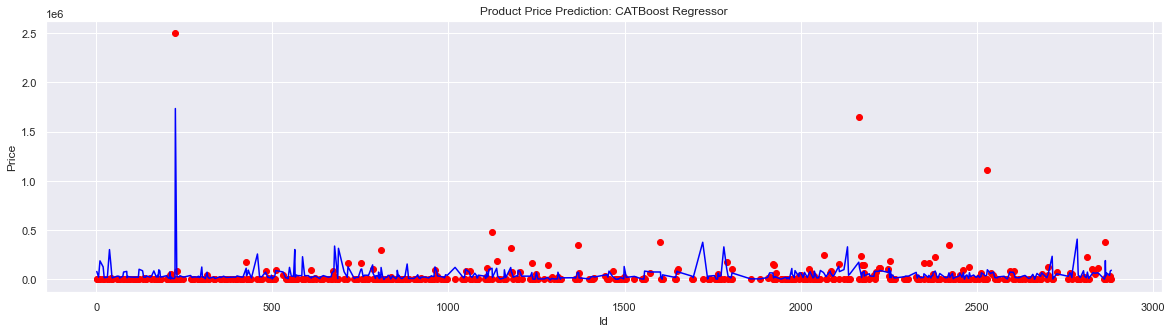

In [158]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_CAT,color='blue')
plt.title('Product Price Prediction: CATBoost Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [159]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_CAT))
print('R2 Score:',r2_score(Y_valid,Y_pred_CAT))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_CAT))
print('Final Score:',(r2_score(Y_valid,Y_pred_CAT)*100)/(mean_squared_error(Y_valid,Y_pred_CAT)+mean_absolute_error(Y_valid,Y_pred_CAT)))

Mean Absolute Error: 48696.472942350345
R2 Score: 0.44380079463588373
Mean Squared Error: 12889125023.530657
Final Score: 3.443205936057163e-09


Since, final score of **CAT Boost Regressor** is the highest, so concluding this model for price prediction of test dataset.

# Predicting Product price

In [160]:
test=test_data.copy()

ordinal_encoder=OrdinalEncoder()
test[cat_col]=ordinal_encoder.fit_transform(test_data[cat_col])
test[num_col]=test_data[num_col]

In [161]:
test_scale=pd.DataFrame(scale(test))
test_scale.columns=test.columns
test_scale.index=range(1,len(test_scale)+1)

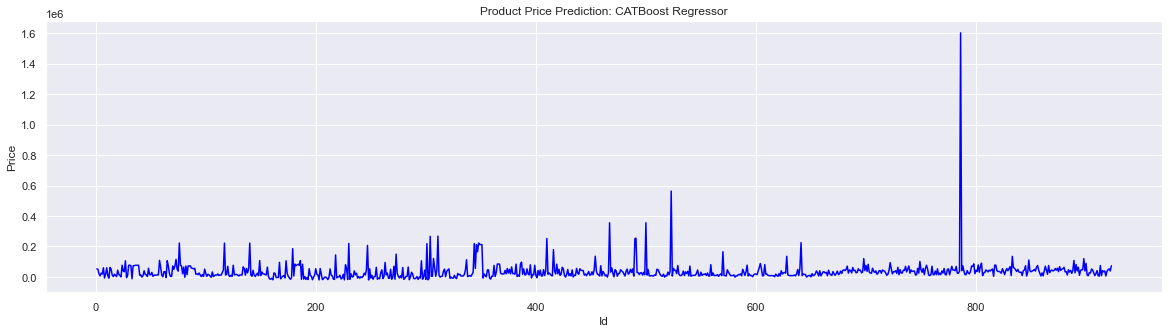

In [162]:
Y_pred_CAT_test=model_CAT.predict(test_scale)
plt.figure(figsize=(20,5))
sns.lineplot(test_scale.index,Y_pred_CAT_test,color='blue')
plt.title('Product Price Prediction: CATBoost Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [163]:
test_data['price']=Y_pred_CAT_test
test_data.head()

,Product_name,Product_id,Product_Category,Professional_Publication,Region_address,Local_address,price
1,Comte free fire,40008816,Jeux vidéo et consoles,private,Grand Casablanca,Casablanca,53165.116736
2,Iphone 6 plus,40008815,Téléphones,private,Grand Casablanca,Casablanca,50487.333996
3,Renault,40008814,Voitures,private,Chaouia-Ouardigha,Settat,20699.635376
4,becane,40008811,Motos,private,Fès-Boulemane,Fès,7035.509820
5,Appartement,40008807,Appartements,private,Grand Casablanca,Casablanca,25126.921136
